# **Bienvenid@!** 
*En el siguiente codigo se encuentra la propuesta de Nancy Espinosa y Stefania Perez, estudiantes de la Universidad Distrital, para el desarrollo de Data Analitics enfocado a un plan de gestion de la produccion.* 



```
@ NancyEspinosa 
@ StefaniaPerez
Python 3.9 Google Colab
Mayo de 2021

```




---



In [ ]:
# <COMENTARIO> ===> Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# <COMENTARIO> ===> Instalación librería sklearn
# ==============================================================================

# <COMENTARIO> ===> Graficos
# ==============================================================================
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import style
import seaborn as sns
# <COMENTARIO> ===> vARIOS
!pip install fitter
from fitter import Fitter
import warnings
warnings.filterwarnings('ignore')

# ========== permite subir archivos desde google ===============================
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librerias y Subida de datos

---



In [ ]:
#=================== ingresar la ruta de archivo CSV ==========================
# Stefania, linda -----> si estas trabajando tu, toca cambiar la  ruta del archivo por que a mi me pide una contraseña, entonces lo cambie
data= pd.read_csv('/content/drive/MyDrive/TESIS/Datos/HistoricoVN.csv',  sep=";", low_memory=False)
# ==============================================================================
 # <COMENTARIO> ===> transforma la data en un data frame
df_data = pd.DataFrame(data)


# Exploracion de datos *(Fase de comprension de datos)*

---


En esta seccion se muestra un analisis descriptivo inicial de los datos del caso de estudio, jusnto con los primeros pasos de limpieza de datos. Para el analisis se realizaron algunas agrupaciones con el fin de identificar correlacion entre datos.  

In [ ]:

#=================Informacion de los datos de ventas =========================
print("   Acontinucaiocn se muestran los estadisticos de las variables cuantitativas")
estadisticos_data=df_data.describe()
print(estadisticos_data)


   Acontinucaiocn se muestran los estadisticos de las variables cuantitativas
                 AN8         FILIAL  ...             SL          FILIA
count  771215.000000   55203.000000  ...  716012.000000  716012.000000
mean    94324.431102  297472.895640  ...       1.004036    3756.960485
std     73394.098532  270943.569913  ...       0.063403   18915.169824
min      1074.000000    5223.000000  ...       1.000000       0.000000
25%     89890.000000   94628.000000  ...       1.000000       1.000000
50%     97461.000000   97863.000000  ...       1.000000       1.000000
75%     97702.000000  632977.000000  ...       1.000000       6.000000
max    756715.000000  766660.000000  ...       2.000000   99999.000000

[8 rows x 15 columns]


## Exploracion datos FABRICADOS

---


El primer paso corresponde a la limpieza de los datos es por esto que se 
contruiran agrupaciones (clusterings de los datos para poder realizar un remplazo de valores Null y poesteriormente una normalizacion mas adecuada

### Filtro por fabricados



In [ ]:

# <COMENTARIO> ===> Elccion inicial de Carcteristicas (features) a estudiar
df_data = df_data.loc[:, ['CANAL','REGIONAL', 'ZONA', 'NIT CLIENTE', 
                          'DESCUENTO CABEZA DE LA ORDEN',	'NOM CLIENTE',	
                          'NOMBRE CLIENTE O FILIAL',	'MARCA',	'DESCRIPCIÓN MARCA',
                          'SUBMARCA',	'DESCRIPCIÓN SUBMARCA',	'ORIGEN',	
                          'DESCRIPCIÓN ORIGEN', 'LÍNEA',	'DESCRIPCIÓN LÍNEA',
                          'UNIVERSO',	'DESCRIPCIÓN UNIVERSO',	'CATEGORÍA',
                          'DESCRIPCIÓN CATEGORÍA',	'OCASIÓN DE USO',	
                          'DESCRIPCIÓN OCASIÓN DE USO',	'TIPO DE PRODUCTO',
                          'DESCRIPCIÓN T. PRODUCTO',	'AÑO', 'MES',	'DÍA',
                          'FECHA',	'CODIGO NIVEL 1', 'CODIGO NIVEL 2', 
                          'DESCRIPCIÓN REF', 'VENTAS PARES', 'VENTAS PESOS',
                          'VENTAS DOLAR',	'SUBMARCA VN',	'GR',	'SBG',	'SL',
                          'ZN',	'FILIA',	'TI',	'SUBMARCA AUR',	'MARCA AUR',
                          'GRUPO'
                          ]
                      ]

# <COMENTARIO> ===> Seleccion solo de productos fabricados por la empresa y no son pedidos (diferentes a exportaciones)
df_fabricados= df_data[df_data['DESCRIPCIÓN ORIGEN'].str.startswith('FABRICA') & \
                       (df_data['CANAL']!="EXPORTACIONES") & \
                       (df_data['DESCRIPCIÓN LÍNEA']=="CALZADO")]
  
# <COMENTARIO> ===> Cambio de tipo de dato Fecha
df_fabricados['FECHA'] = pd.to_datetime(df_fabricados['FECHA'], format='%d/%m/%Y')
df_fabricados['mes']=pd.DatetimeIndex(df_fabricados['FECHA']).month.astype('object')
#df_fabricados['mes']=pd.DatetimeIndex(df_fabricados['FECHA']).month
df_fabricados['año']=pd.DatetimeIndex(df_fabricados['FECHA']).year.astype('object')
#df_fabricados['año']=pd.DatetimeIndex(df_fabricados['FECHA']).year
df_fabricados['semana']=pd.DatetimeIndex(df_fabricados['FECHA']).week.astype('object')
df_fabricados['dia'] = pd.DatetimeIndex(df_fabricados['FECHA']).day.astype('object')
df_fabricados['dia_semana'] = pd.DatetimeIndex(df_fabricados['FECHA']).dayofweek.astype('object')


# Agregacion por fecha

### Agrupacion por fechas puesto que existen ventas negativas, correspondientes adevoluciones

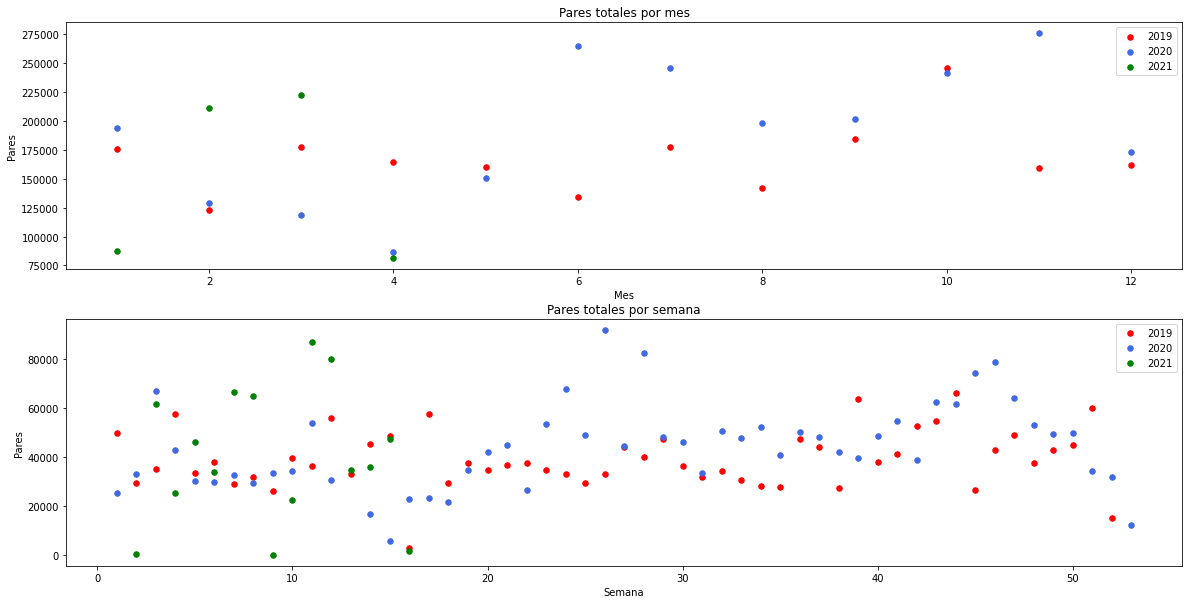

In [ ]:
#<COMENTARIO> ---Agrupacion MENSUAL, para quitar las dobles partidas

df_mensual_fab= df_fabricados.groupby([pd.Grouper(key='FECHA', freq='M'), 'año', 'mes', 'SUBMARCA AUR', 
                                       'DESCRIPCIÓN ORIGEN', 'DESCRIPCIÓN REF']
                                      )['VENTAS PARES', 'VENTAS PESOS'].sum()
df_mensual_fab= df_mensual_fab.reset_index()
df_mensual_fab= pd.DataFrame(df_mensual_fab)
df_mensual_fab=df_mensual_fab.rename(columns={'SUBMARCA AUR': 'submarca_AUR',
                                              'FECHA' : 'fecha_mes', 
                                              'DESCRIPCIÓN ORIGEN': 'descripcion_origen',
                                              'DESCRIPCIÓN REF': 'descricpcion_ref',
                                              'VENTAS PARES': 'ventas_pares', 
                                              'VENTAS PESOS': 'ventas_pesos'})

df_mensual_fab= df_mensual_fab[(df_mensual_fab['ventas_pesos']>=0) & (df_mensual_fab['ventas_pares']>0)]

#<COMENTARIO> ---Agrupacion SEMANAL, para quitar las dobles partidas

df_semanal_fab= df_fabricados.groupby([pd.Grouper(key='FECHA', freq='W'), 'año', 'semana', 'mes',
                                       'SUBMARCA AUR', 'DESCRIPCIÓN ORIGEN', 'DESCRIPCIÓN REF']
                                      )['VENTAS PARES', 'VENTAS PESOS'].sum()
df_semanal_fab= df_semanal_fab.reset_index()
df_semanal_fab= pd.DataFrame(df_semanal_fab)
df_semanal_fab=df_semanal_fab.rename(columns={'SUBMARCA AUR': 'submarca_AUR',
                                              'FECHA' : 'fecha_semana',
                                              'DESCRIPCIÓN ORIGEN': 'descripcion_origen',
                                              'DESCRIPCIÓN REF': 'descricpcion_ref',
                                              'VENTAS PARES': 'ventas_pares', 
                                              'VENTAS PESOS': 'ventas_pesos'})

df_semanal_fab= df_semanal_fab[(df_semanal_fab['ventas_pesos']>=0) & (df_semanal_fab['ventas_pares']>0)]


#<COMENTARIO> ---Agrupacion DIARIA, para quitar las dobles partidas

df_diario_fab= df_fabricados.groupby(['año', 'mes', 'semana', 'FECHA', 'dia', 
                                      'dia_semana', 'SUBMARCA AUR', 
                                      'DESCRIPCIÓN ORIGEN', 'DESCRIPCIÓN REF']
                                    )['VENTAS PARES', 'VENTAS PESOS'].sum()
df_diario_fab= df_diario_fab.reset_index()
df_diario_fab= pd.DataFrame(df_diario_fab)
df_diario_fab=df_diario_fab.rename(columns={'SUBMARCA AUR': 'submarca_AUR',
                                            'DESCRIPCIÓN ORIGEN': 'descripcion_origen',
                                            'DESCRIPCIÓN REF': 'descricpcion_ref',
                                            'VENTAS PARES': 'ventas_pares', 
                                            'VENTAS PESOS': 'ventas_pesos',
                                            'FECHA': 'fecha'})

df_diario_fab= df_diario_fab[(df_diario_fab['ventas_pesos']>=0) & (df_diario_fab['ventas_pares']>0)]


#____________________
agregado_semana_fab= df_semanal_fab.groupby(['año', 'semana'])['ventas_pares'].sum()
agregado_semana_fab= agregado_semana_fab.reset_index()

agregado_mes_fab= df_mensual_fab.groupby(['año', 'mes'])['ventas_pares'].sum()
agregado_mes_fab= agregado_mes_fab.reset_index()

colores={2019:"Red", 2020:"RoyalBlue", 2021:"Green"}

fig, ax = plt.subplots(2, 1, figsize=(20,10))
for años in set(agregado_mes_fab.año):
  ax[0].scatter(
      x= agregado_mes_fab.mes[agregado_mes_fab.año==años],
      y= agregado_mes_fab.ventas_pares[agregado_mes_fab.año==años],
      s= 30,
      c= colores[años],
      label = años)
ax[0].set_xlabel('Mes')
ax[0].set_ylabel('Pares')
ax[0].set_title('Pares totales por mes')
ax[0].legend(loc="upper right")

for años in set(agregado_semana_fab.año):
  ax[1].scatter(
      x= agregado_semana_fab.semana[agregado_semana_fab.año==años],
      y= agregado_semana_fab.ventas_pares[agregado_semana_fab.año==años],
      s= 30,
      c= colores[años],
      label = años)
ax[1].set_xlabel('Semana')
ax[1].set_ylabel('Pares')
ax[1].set_title('Pares totales por semana')
ax[1].legend(loc="upper right")






## Filtro por tipo de fabrica - MENSUAL

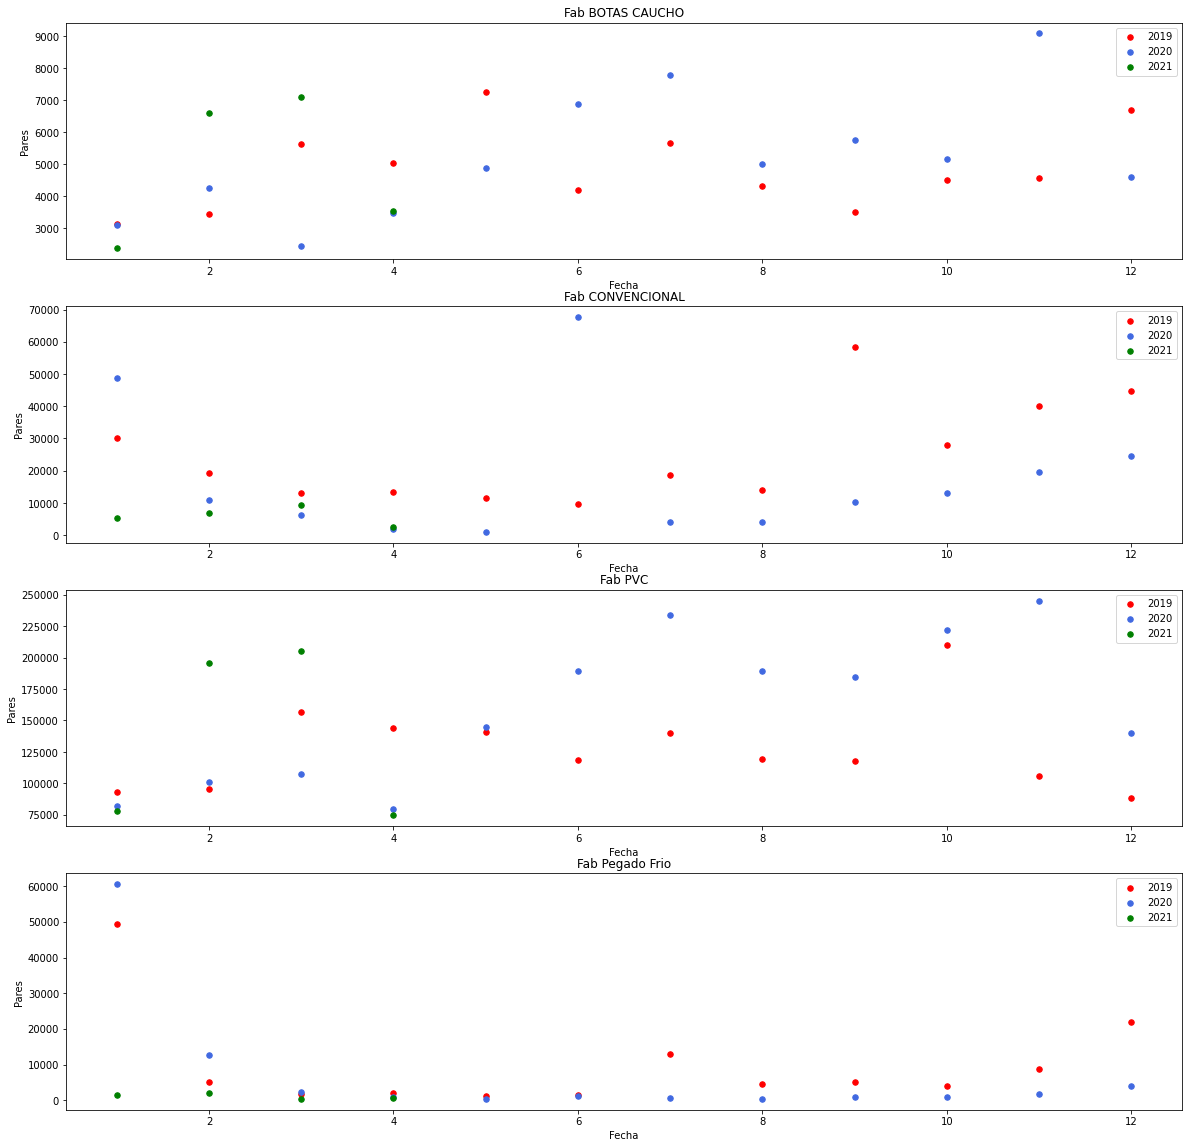

In [ ]:

# ==============================================================================
# Creacion de grupos iniciales por descripcion de origen
fabBotaCaucho=df_mensual_fab[df_mensual_fab['descripcion_origen']=="FABRICA-BOTA CAUCHO"]
fabConvencional=df_mensual_fab[df_mensual_fab['descripcion_origen']=="FABRICA-CONVENCIONAL"]
fabIny_PVC=df_mensual_fab[df_mensual_fab['descripcion_origen']=="FABRICA-INYECCION PVC"]
fabPegadoFrio=df_mensual_fab[df_mensual_fab['descripcion_origen']=="FABRICA-PEGADO EN FRIO"]

#print(df_fabricados.shape) # ok-prueba


# ==============================================================================
# <COMENTARIO> ===>  ahora si limpieza de datos y quitar los null
numNull_BotaCaucho=fabBotaCaucho.isnull().sum()
numNull_Convencional=fabConvencional.isnull().sum()
numNull_Iny_PVC=fabIny_PVC.isnull().sum()
numNull_PegadoFrio=fabPegadoFrio.isnull().sum()
#print("Numeros NUll de las caracteristicas a estudiar en FAB BOTA DE CAUCH0 \n", numNull_BotaCaucho[numNull_BotaCaucho>0])
#print("Numeros NUll de las caracteristicas a estudiar en FAB. CONVENCIONAL \n", numNull_Convencional[numNull_Convencional>0])
#print("Numeros NUll de las caracteristicas a estudiar en FAB. INYECCION PVC \n", numNull_Iny_PVC[numNull_Iny_PVC>0])
#print("Numeros NUll de las caracteristicas a estudiar en FAB PEGADO FRIO \n", numNull_PegadoFrio[numNull_PegadoFrio>0])

#<COMENTARIO> ===> NO SE ENCUENTRAN NULLS EN FEATURES CRITICOS, SE PROCEDE AL SIGUIENTE PASO
#<COMENTARIO>  ==> EN CASO CONTRARIO SE RECOMIENDA REMPLAZAR POR LA MEDIANA (CUANTITATIVOS)
  # O LA MODA (CATEGORICOS)


numNaN_BotaCaucho=fabBotaCaucho.loc[:,['año', 'mes', 'ventas_pares', 'ventas_pesos']].isna().sum()
numNaN_Convencional=fabConvencional.loc[:,['año', 'mes', 'ventas_pares', 'ventas_pesos']].isna().sum()
numNaN_Iny_PVC=fabIny_PVC.loc[:,['año', 'mes', 'ventas_pares', 'ventas_pesos']].isna().sum()
numNaN_PegadoFrio=fabPegadoFrio.loc[:,['año', 'mes', 'ventas_pares', 'ventas_pesos']].isna().sum()
#print("Numeros NaN de las caracteristicas a estudiar en FAB BOTA DE CAUCH0 \n", numNaN_BotaCaucho[numNaN_BotaCaucho>0])
#print("Numeros NaN de las caracteristicas a estudiar en FAB. CONVENCIONAL \n", numNaN_Convencional[numNaN_Convencional>0])
#print("Numeros NaN de las caracteristicas a estudiar en FAB. INYECCION PVC \n", numNaN_Iny_PVC[numNaN_Iny_PVC>0])
#print("Numeros NaN de las caracteristicas a estudiar en FAB PEGADO FRIO \n", numNaN_PegadoFrio[numNaN_PegadoFrio>0])

#<COMENTARIO> ===> Los valores alli corresponden a los valores en blnco, entonces se pasa al siguiente

# ==============================================================================
# <COMENTARIO> ===> Visualizacion de datos
dfFabCaucho= fabBotaCaucho.groupby(['año', 'mes'])['ventas_pares'].sum()
dfFabCaucho= dfFabCaucho.reset_index()
#print(dfFabCaucho.head)
dfFabConv= fabConvencional.groupby(['año', 'mes'])['ventas_pares'].sum()
dfFabConv= dfFabConv.reset_index()
#print(dfFabConv.head)
dfFabPVC= fabIny_PVC.groupby(['año', 'mes'])['ventas_pares'].sum()
dfFabPVC= dfFabPVC.reset_index()
#print(dfFabPVC.head)
dfFabFrio= fabPegadoFrio.groupby(['año', 'mes'])['ventas_pares'].sum()
dfFabFrio= dfFabFrio.reset_index()
#print(dfFabFrio.head)

fig, ax = plt.subplots(4, 1, figsize=(20,20))
for años in set(fabBotaCaucho.año):
  ax[0].scatter(
      x= dfFabCaucho.mes[dfFabCaucho.año==años],
      y= dfFabCaucho.ventas_pares[dfFabCaucho.año==años],
      s= 30,
      c= colores[años],
      label = años)
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Pares')
ax[0].set_title('Fab BOTAS CAUCHO')
ax[0].legend(loc="upper right")

for años in set(dfFabConv.año):
  ax[1].scatter(
      x=dfFabConv.mes[dfFabConv.año==años],
      y=dfFabConv.ventas_pares[dfFabConv.año==años],
      s= 30,
      c= colores[años],
      label = años)
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Pares')
ax[1].set_title('Fab CONVENCIONAL')
ax[1].legend(loc="upper right")

for años in set(dfFabPVC.año):
  ax[2].scatter(
      x=dfFabPVC.mes[dfFabPVC.año==años],
      y=dfFabPVC.ventas_pares[dfFabPVC.año==años],
      s= 30,
      c= colores[años],
      label = años)
ax[2].set_xlabel('Fecha')
ax[2].set_ylabel('Pares')
ax[2].set_title('Fab PVC')
ax[2].legend(loc="upper right")


for años in set(dfFabFrio.año):
  ax[3].scatter(
      x=dfFabFrio.mes[dfFabFrio.año==años],
      y=dfFabFrio.ventas_pares[dfFabFrio.año==años],
      s= 30,
      c= colores[años],
      label = años)
ax[3].set_xlabel('Fecha')
ax[3].set_ylabel('Pares')
ax[3].set_title('Fab Pegado Frio')
ax[3].legend(loc="upper right")


plt.legend()

### *Agrupacion por Referencia - FABRICA BOTAS DE CAUCHO*

---




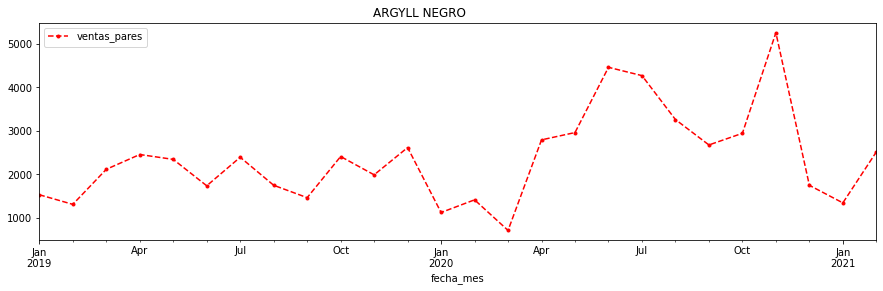

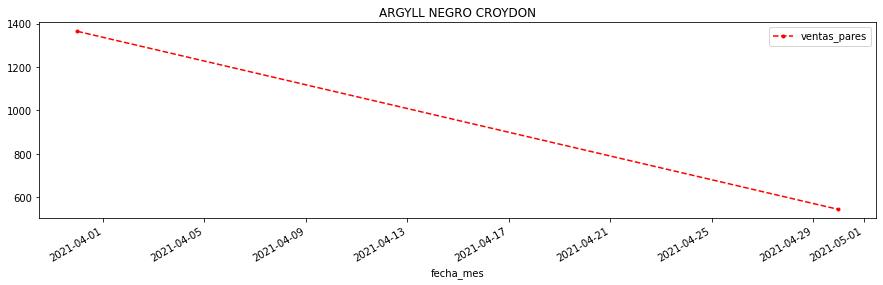

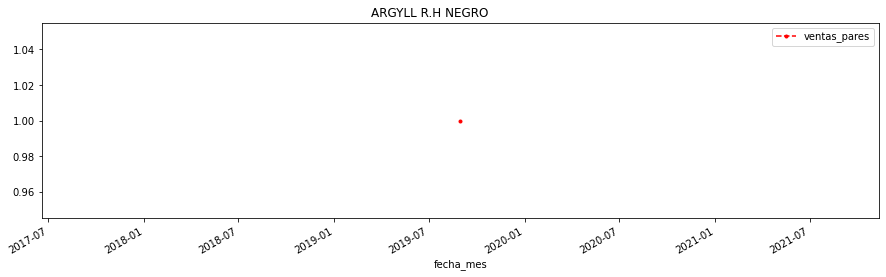

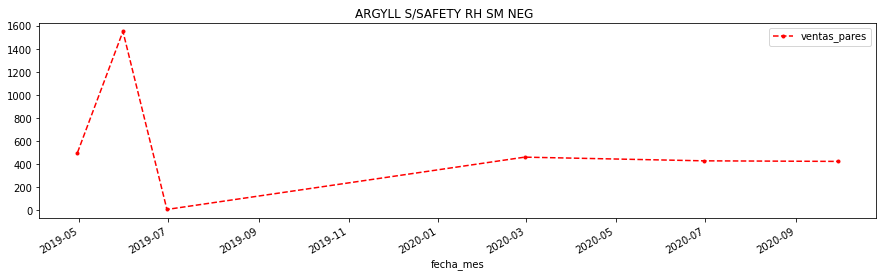

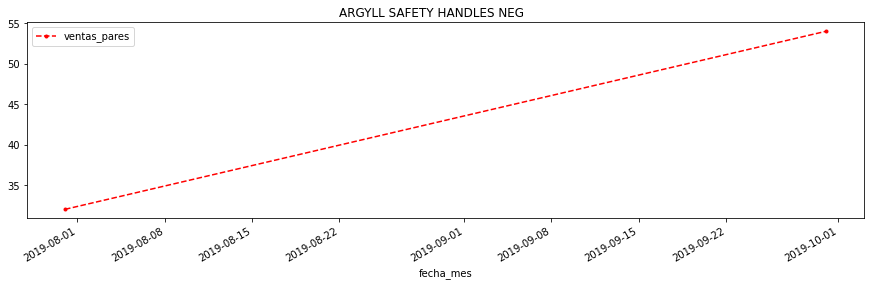

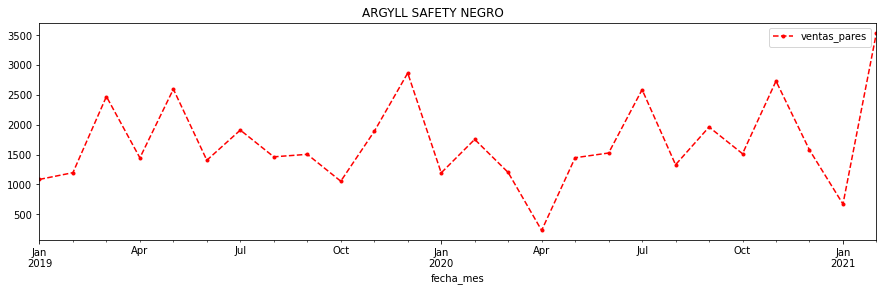

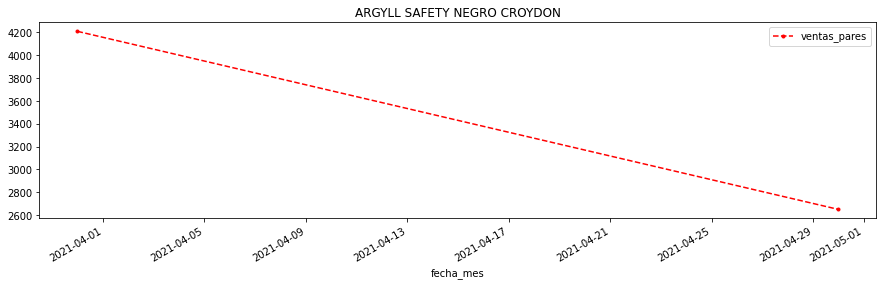

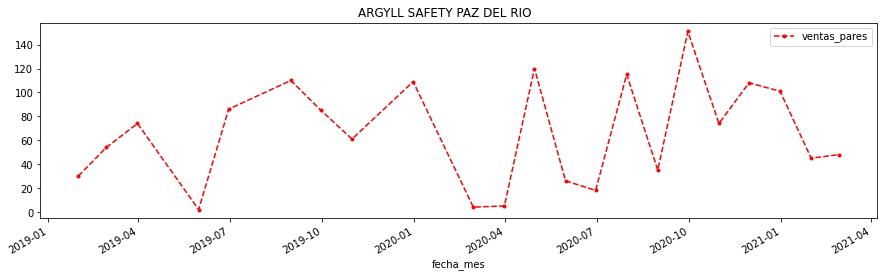

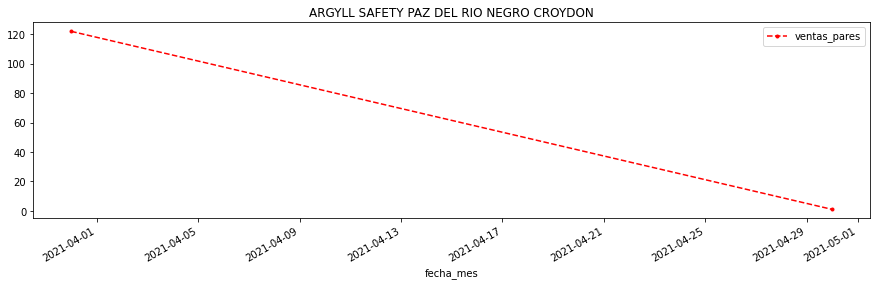

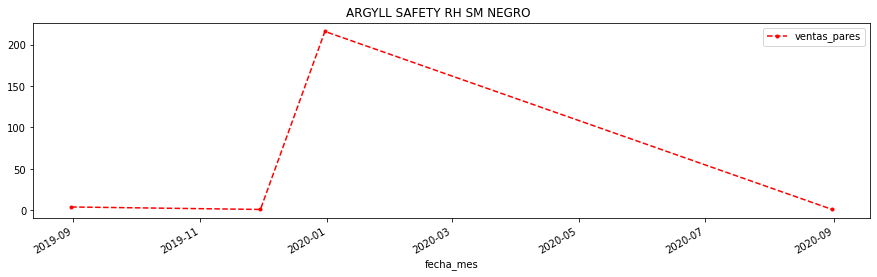

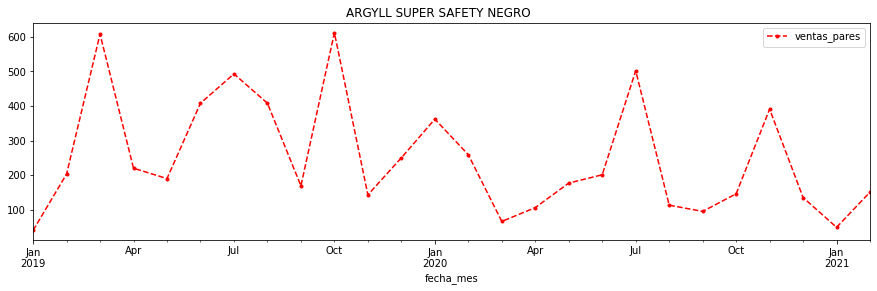

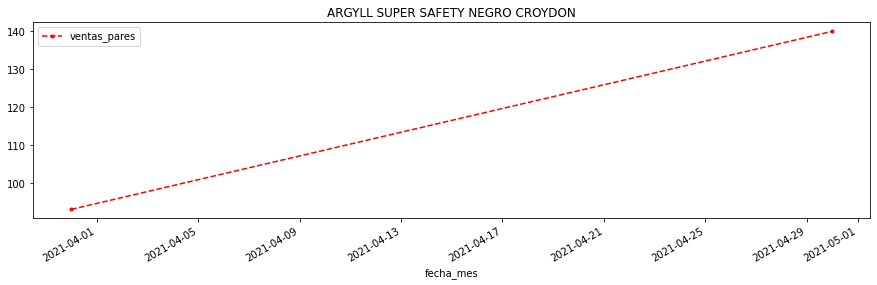

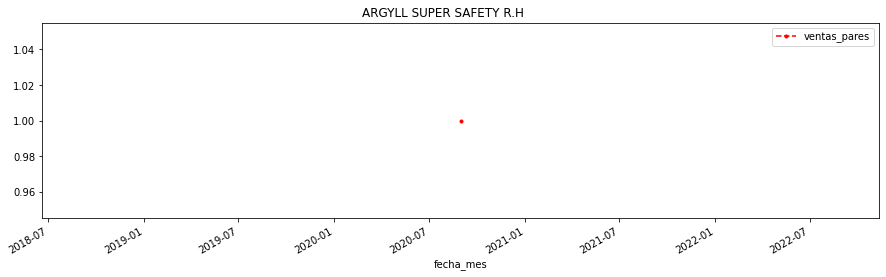

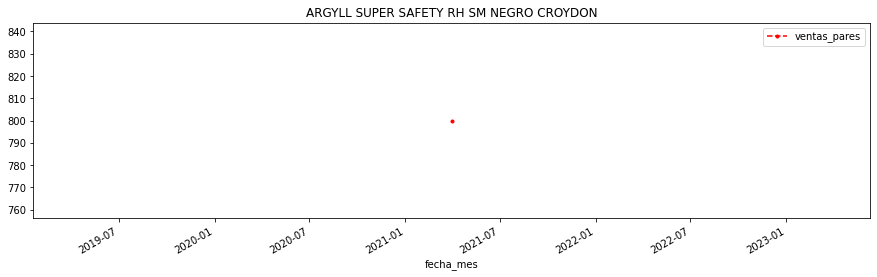

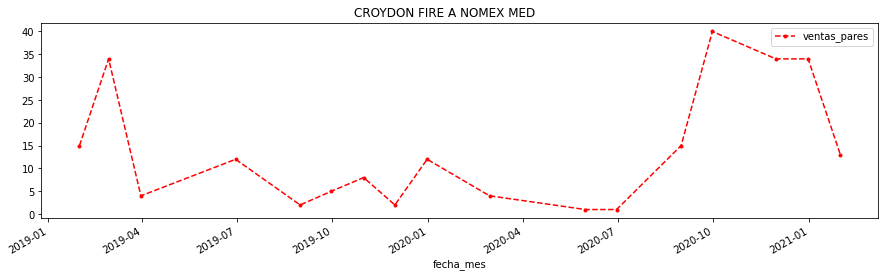

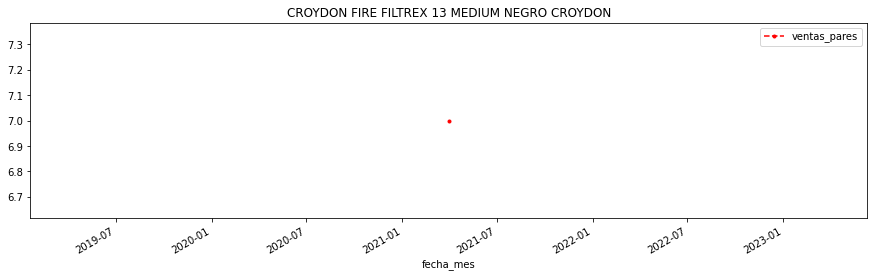

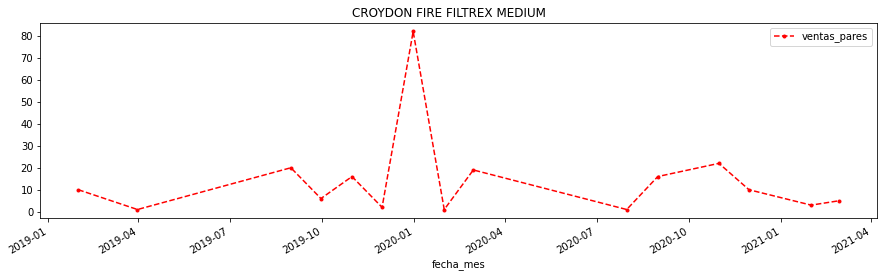

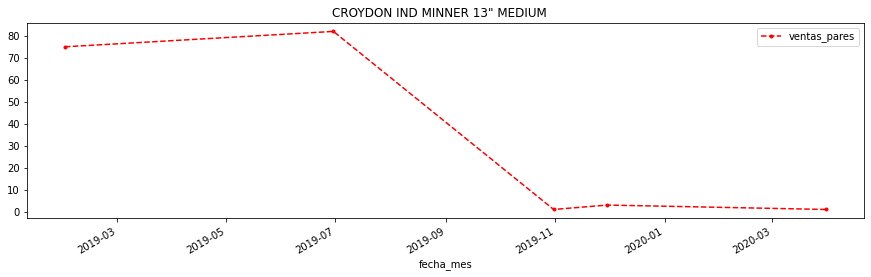

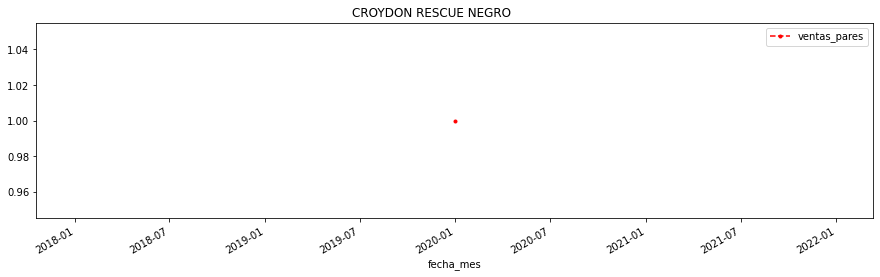

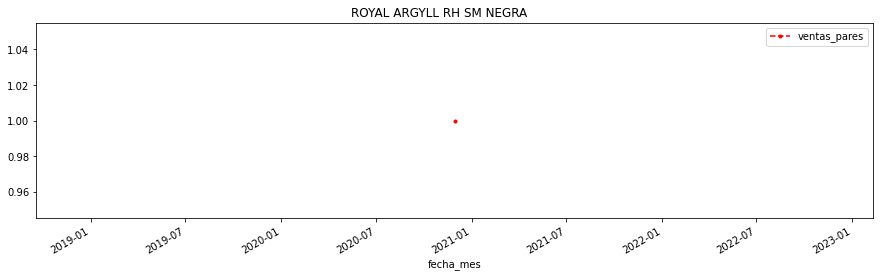

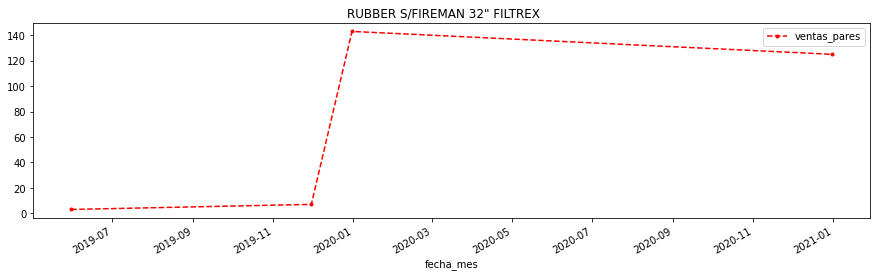

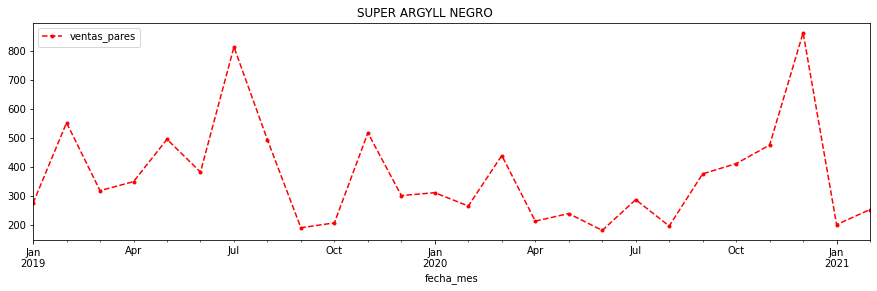

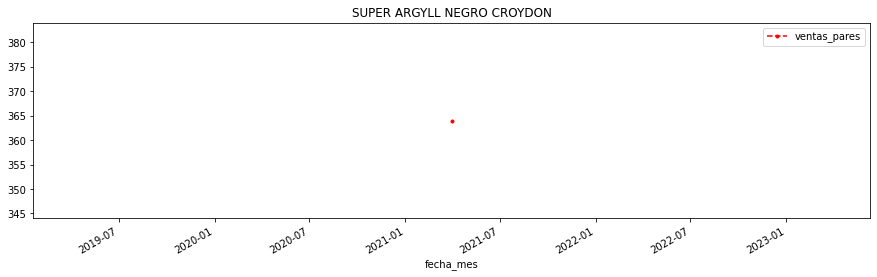

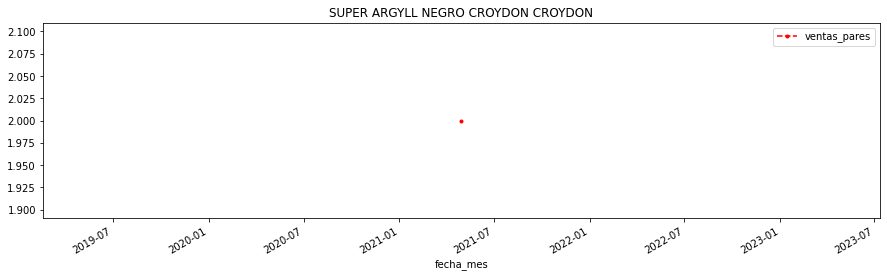

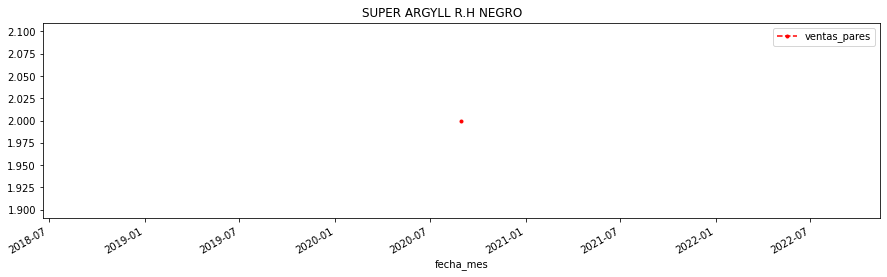

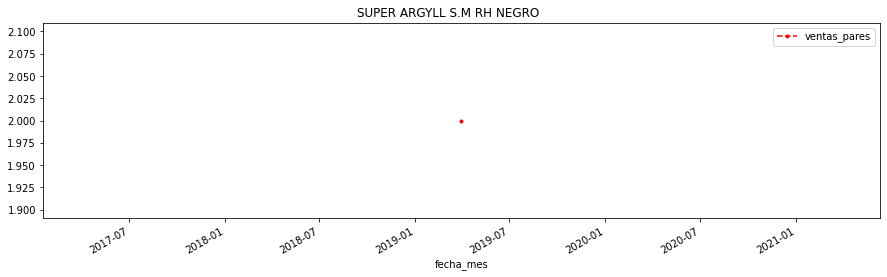

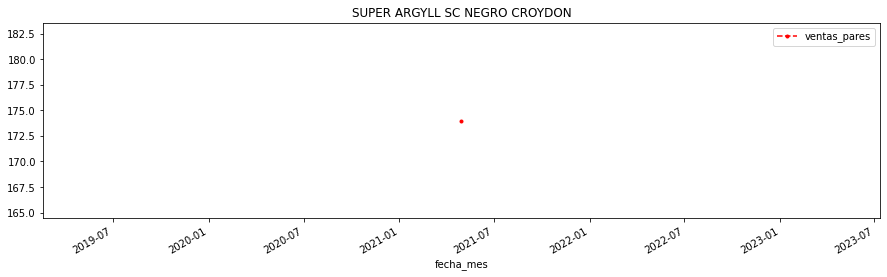

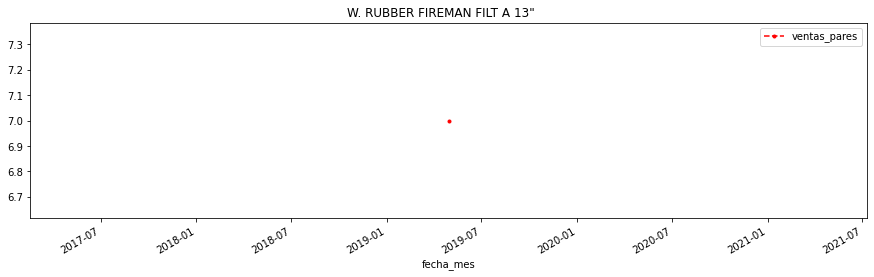

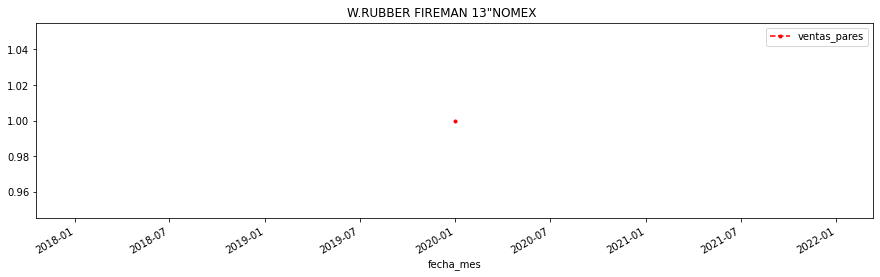

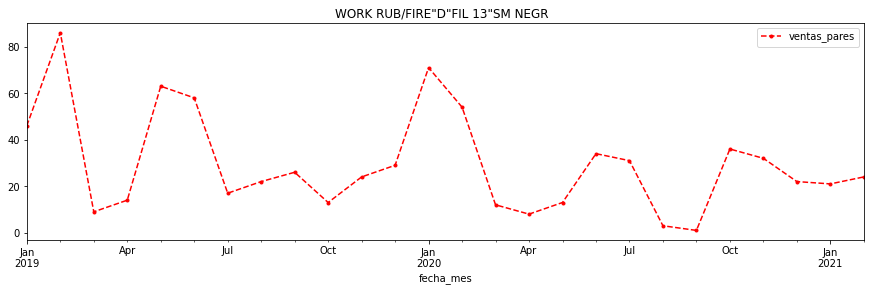

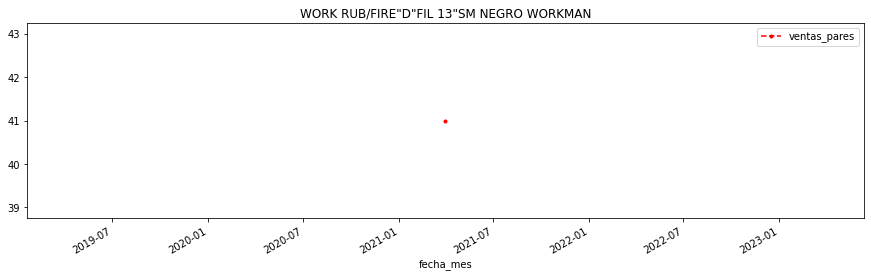

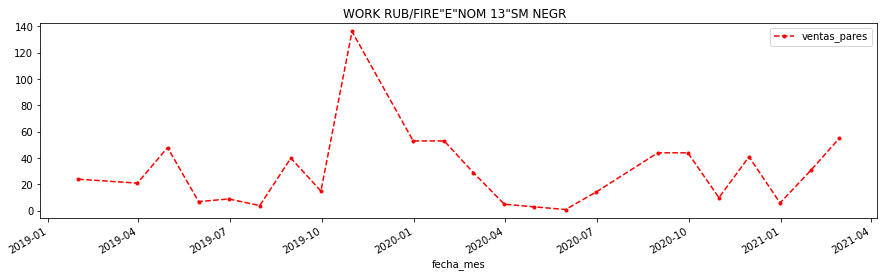

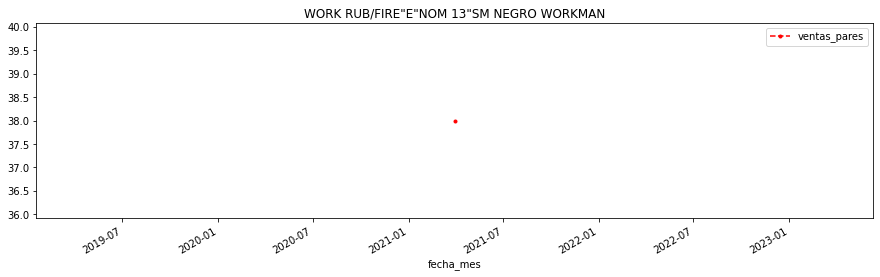

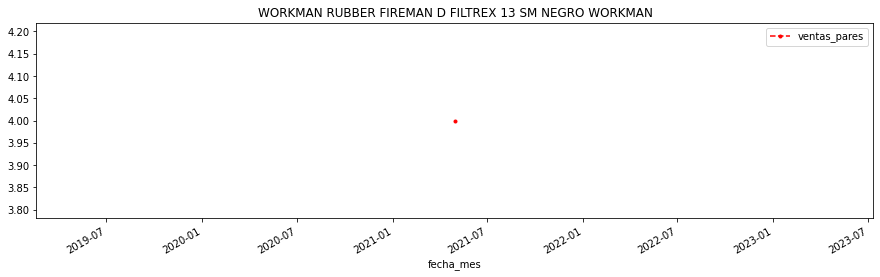

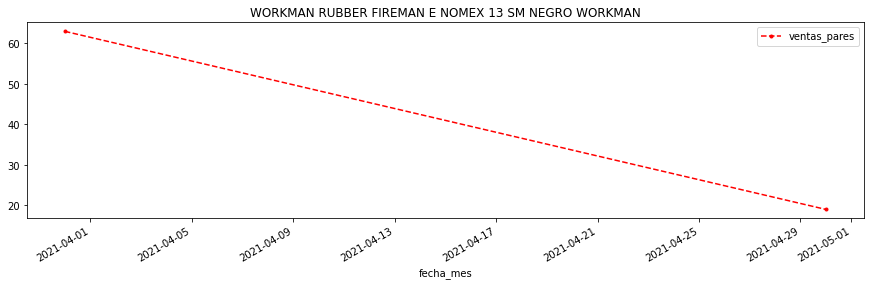

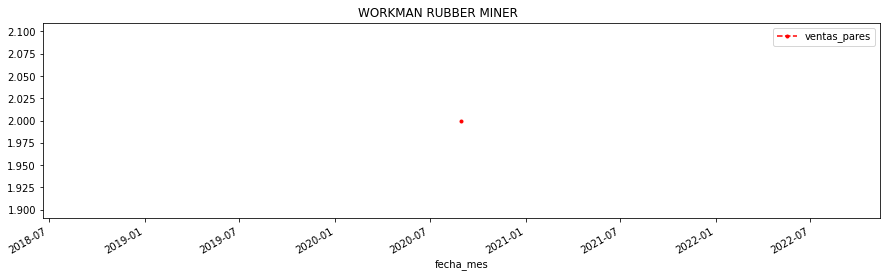

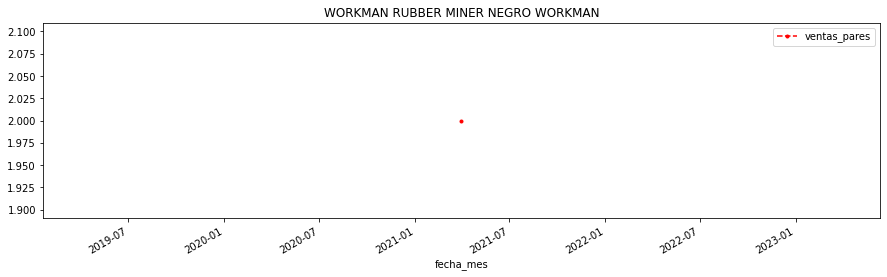

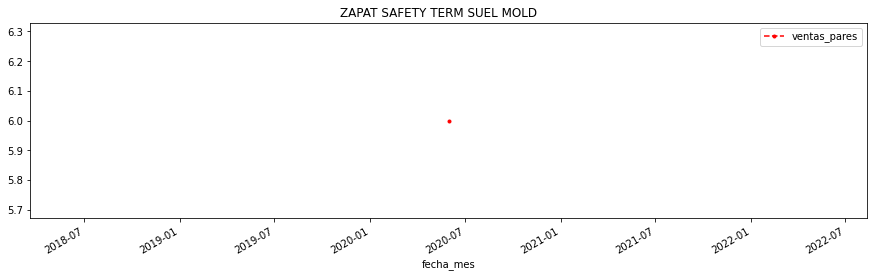

In [ ]:
fabConvencional_BC = fabBotaCaucho
# <COMENTARIO> ===> Se crea un DATA FRAME con los datos para su manipulacion
df_FabBC_Ref = pd.DataFrame(fabConvencional_BC)
# <COMENTARIO> ===> Se realiza una primer agrupacion por Referencia
df_FabBC_Ref= df_FabBC_Ref.groupby(['descricpcion_ref'])
df_FabBC_Ref

# <COMENTARIO> ===> Visualizacion de los datos para observar correlacion 
for group_key, group_value in df_FabBC_Ref:
  #print(k)

  # <COMENTARIO> ===> Agregacion por fecha
  df_0BC = group_value.groupby(['fecha_mes'])['ventas_pares'].sum()
  df_0BC = df_0BC.reset_index()
  df_0BC.plot(x='fecha_mes', y='ventas_pares', linestyle='--', marker='.', color= 'r' ,title=group_key, figsize=(15,4));

### *Agrupacion por Referencia - FABRICA CONVENCIONAL*

---




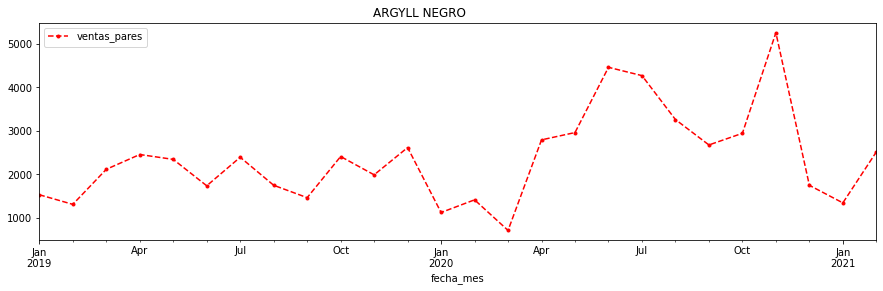

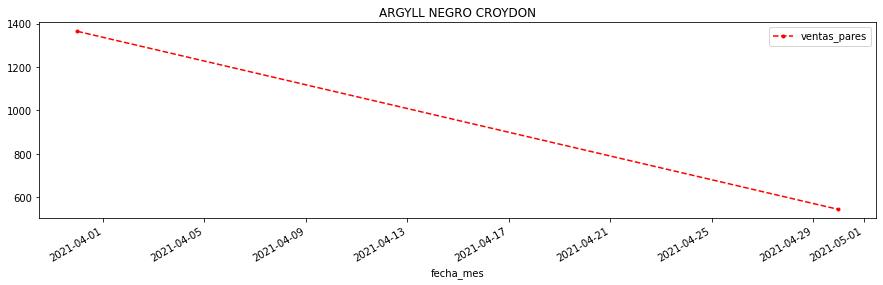

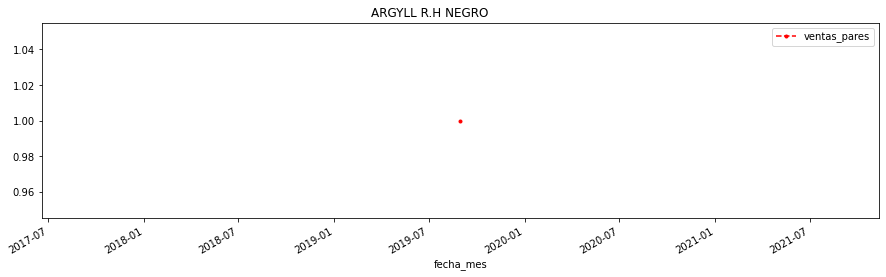

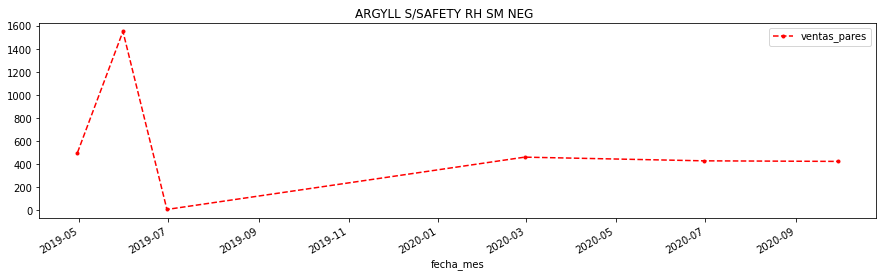

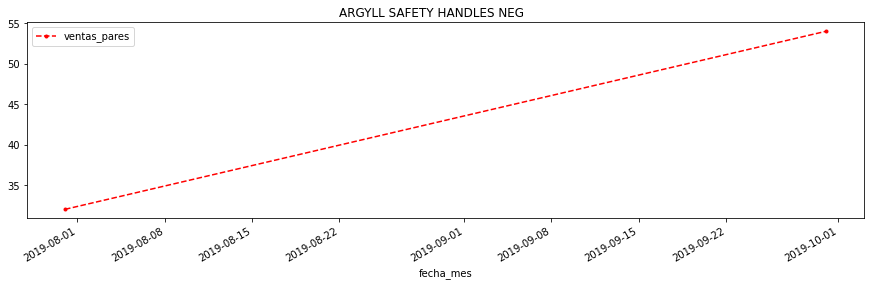

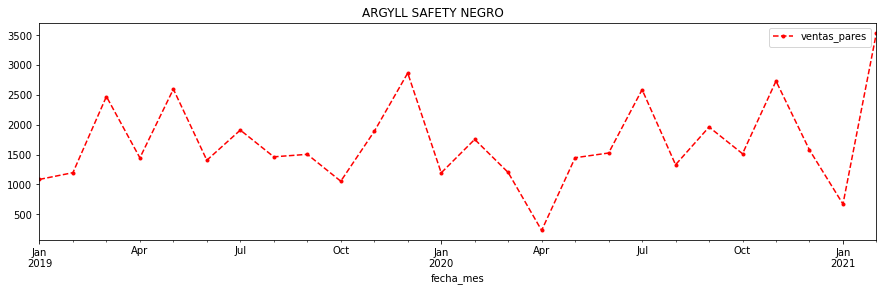

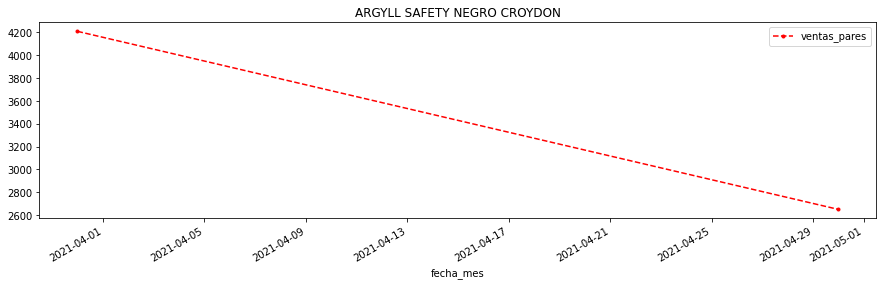

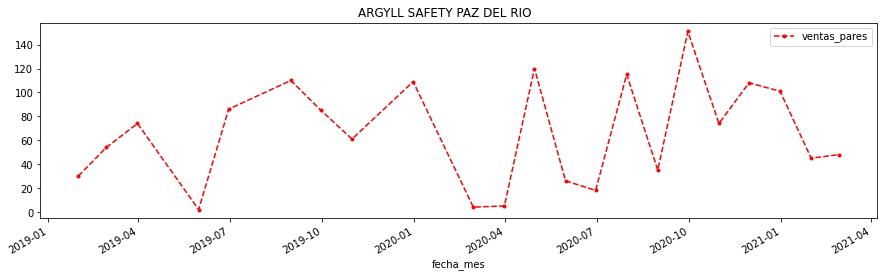

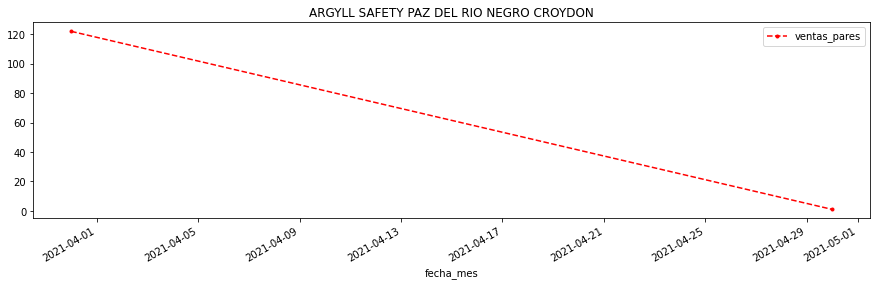

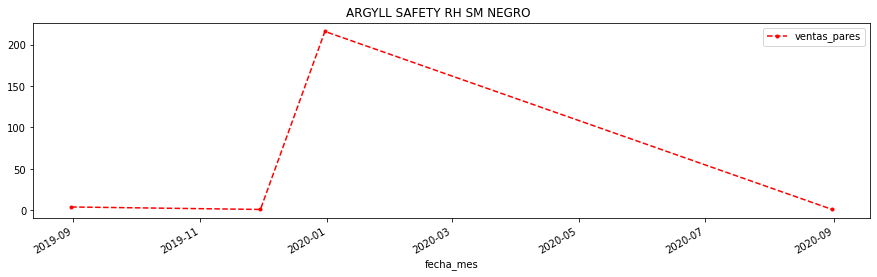

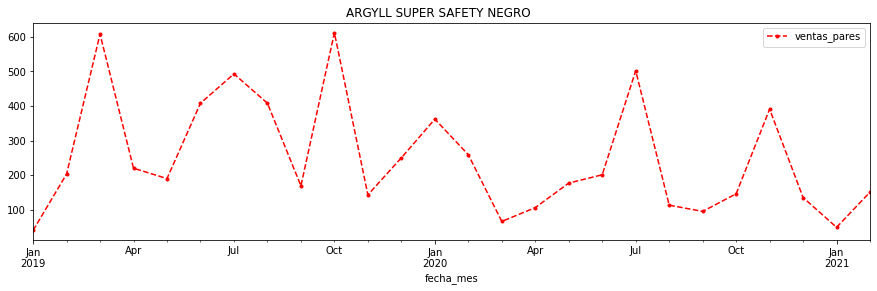

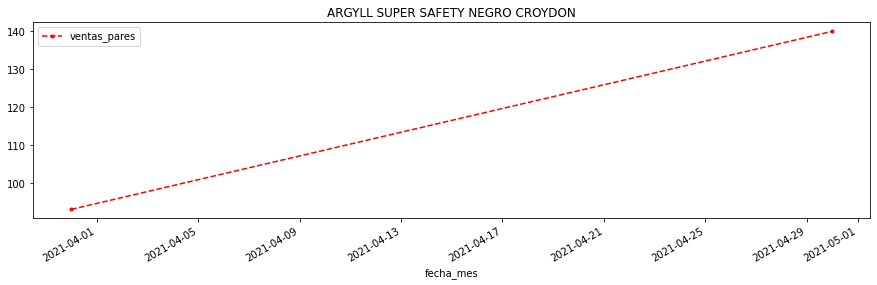

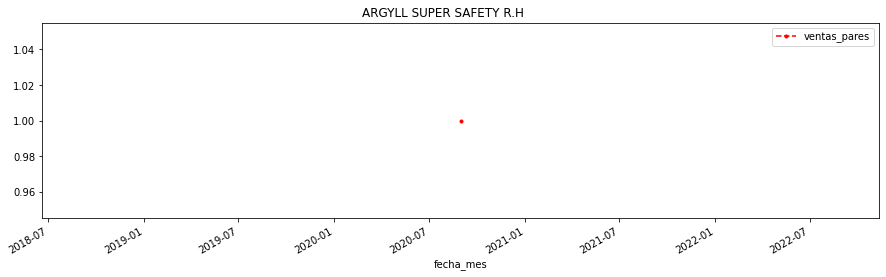

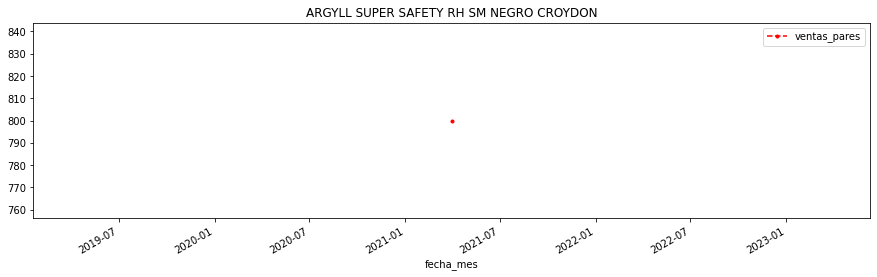

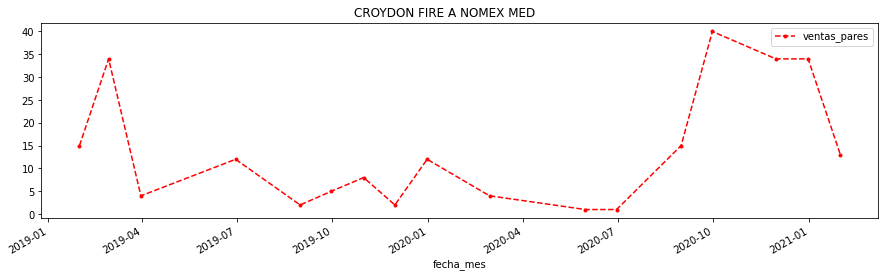

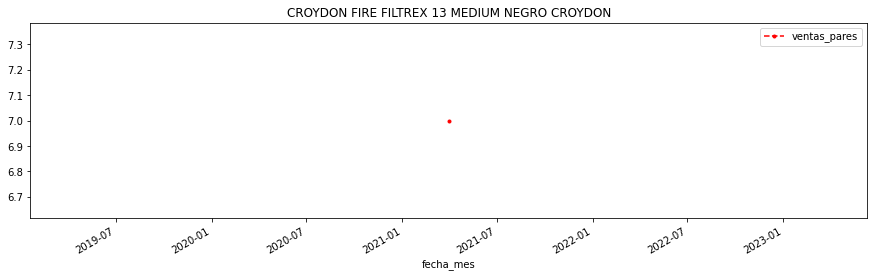

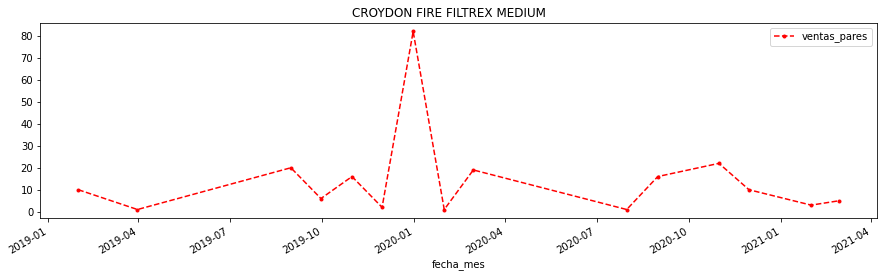

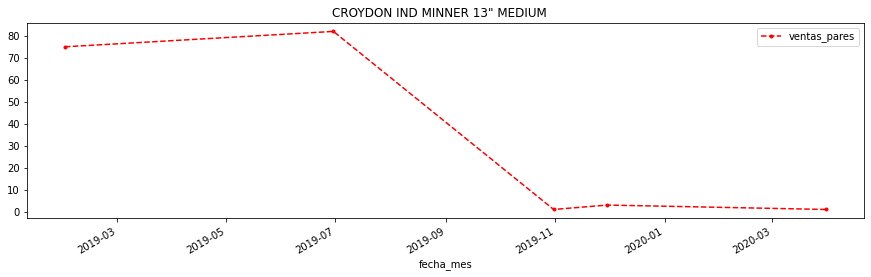

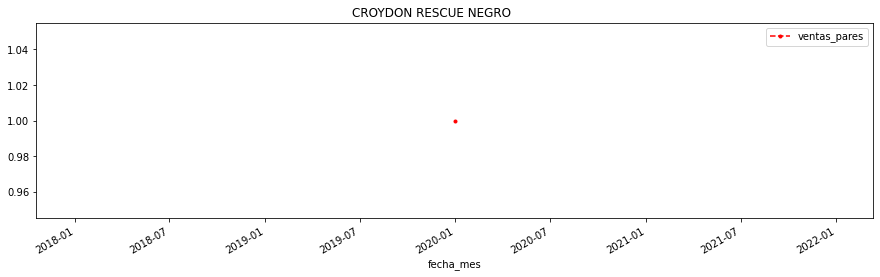

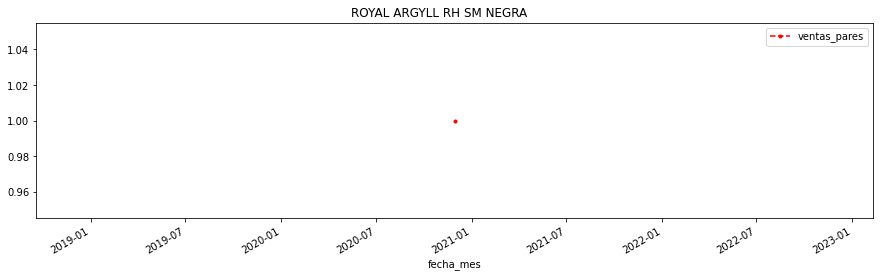

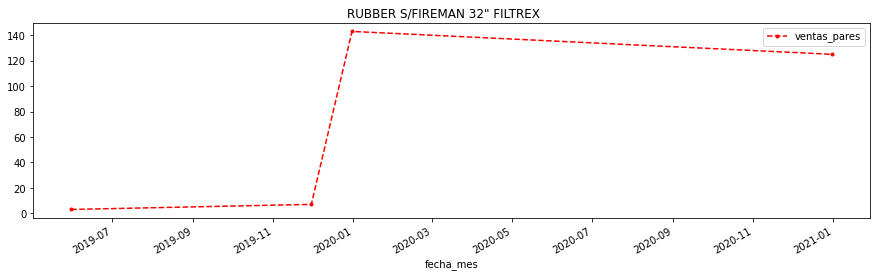

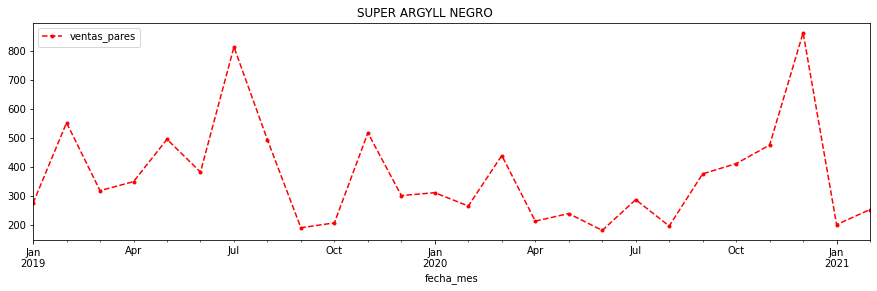

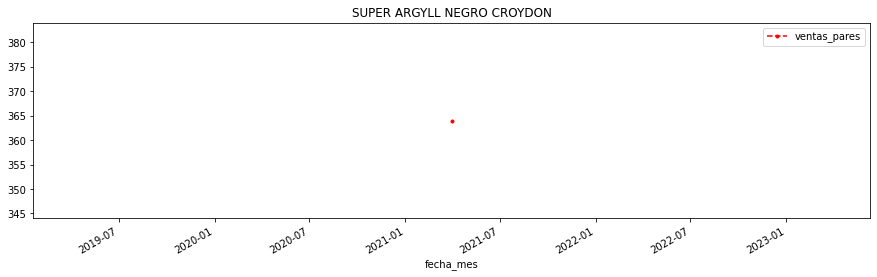

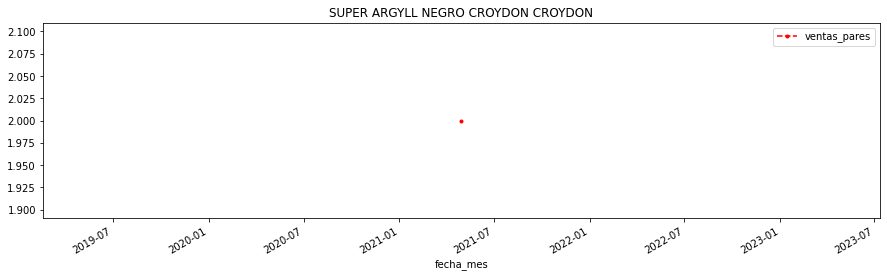

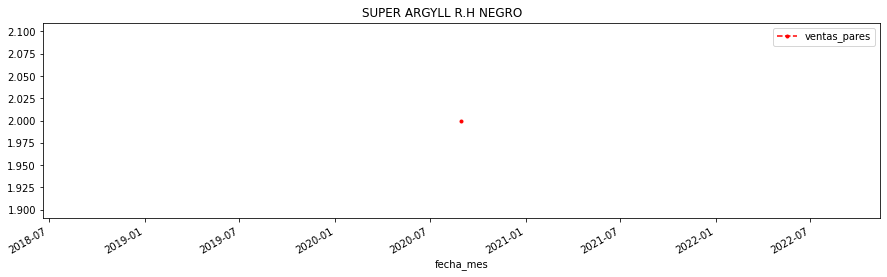

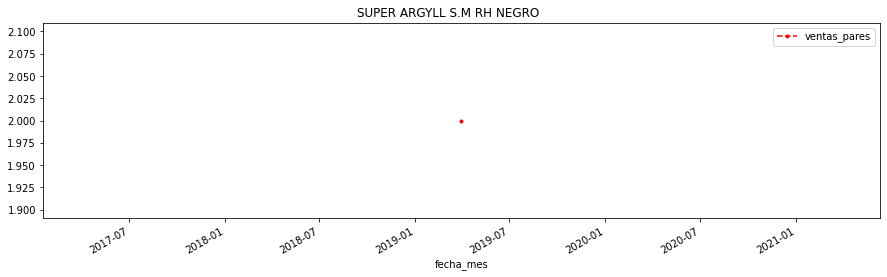

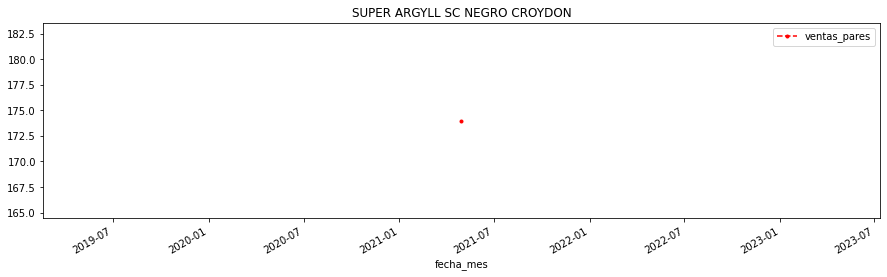

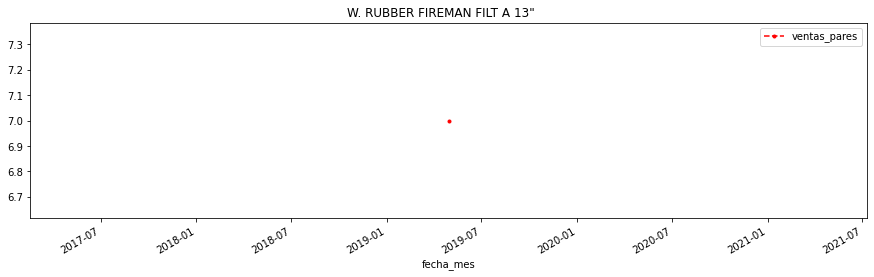

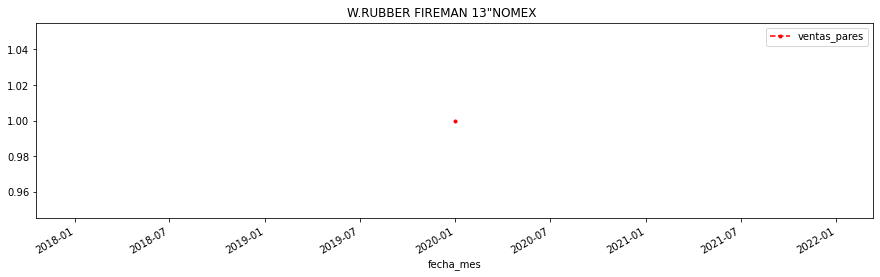

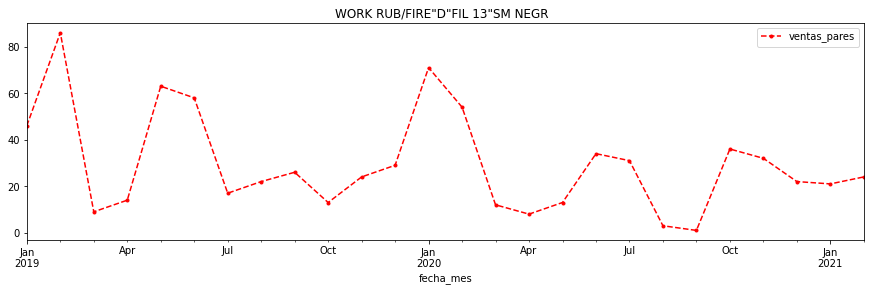

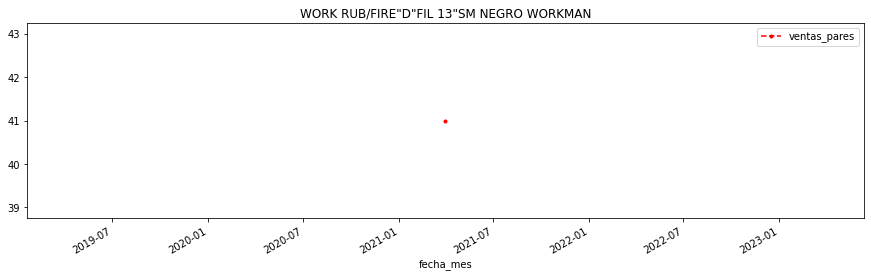

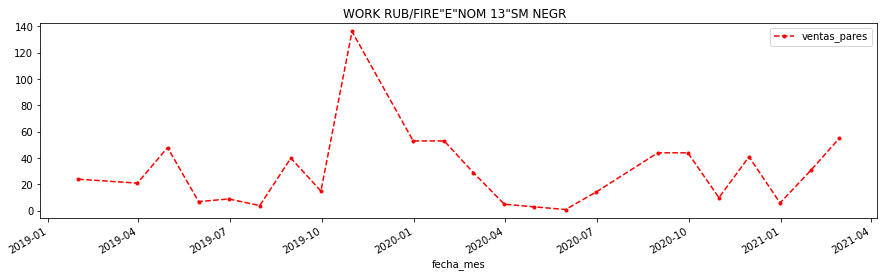

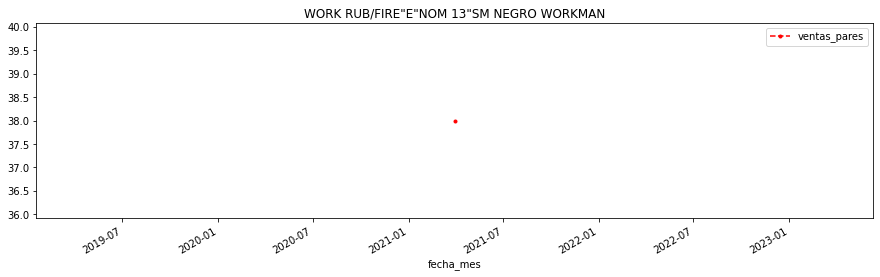

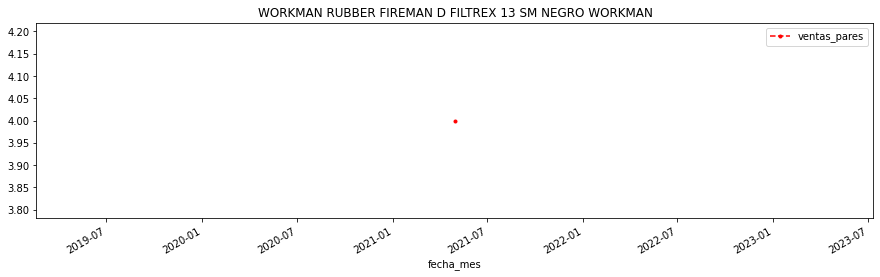

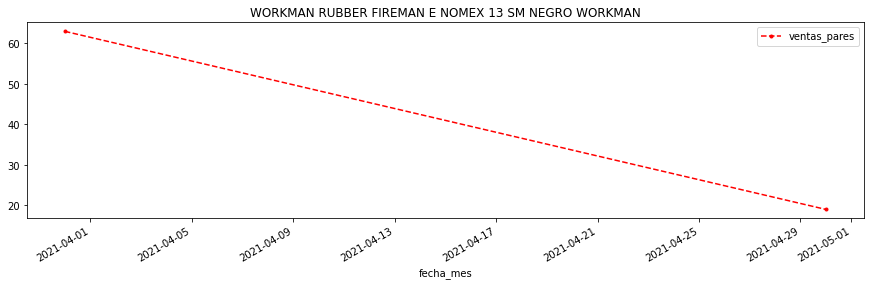

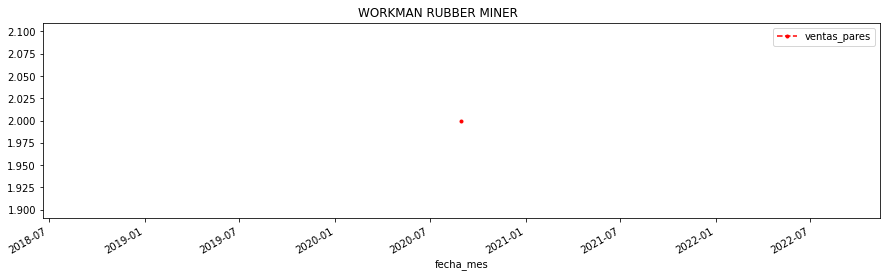

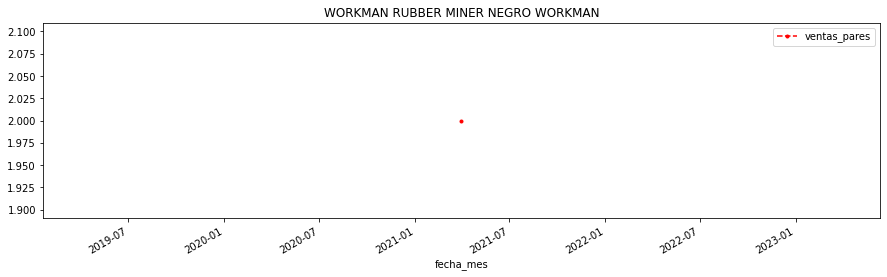

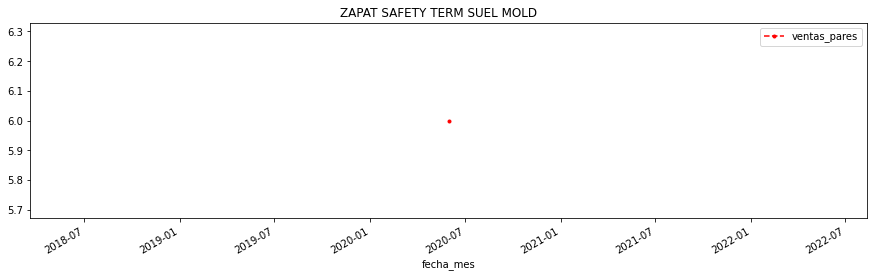

In [ ]:
fabConvencional_Ref = fabConvencional
# <COMENTARIO> ===> Se crea un DATA FRAME con los datos para su manipulacion
df_FabBC_Ref = pd.DataFrame(fabConvencional_BC)
# <COMENTARIO> ===> Se realiza una primer agrupacion por Referencia
df_FabBC_Ref= df_FabBC_Ref.groupby(['descricpcion_ref'])
df_FabBC_Ref

# <COMENTARIO> ===> Visualizacion de los datos para observar correlacion 
for group_key, group_value in df_FabBC_Ref:
  #print(k)

  # <COMENTARIO> ===> Agregacion por fecha
  df_0BC = group_value.groupby(['fecha_mes'])['ventas_pares'].sum()
  df_0BC = df_0BC.reset_index()
  df_0BC.plot(x='fecha_mes', y='ventas_pares', linestyle='--', marker='.', color= 'r' ,title=group_key, figsize=(15,4));


### Agrupacion por Referencia - FABRICA PVC

---




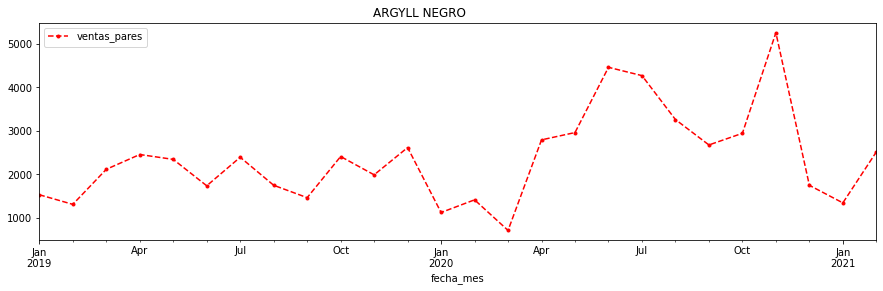

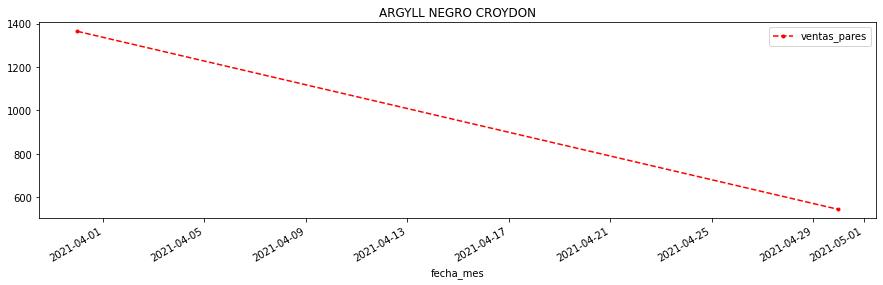

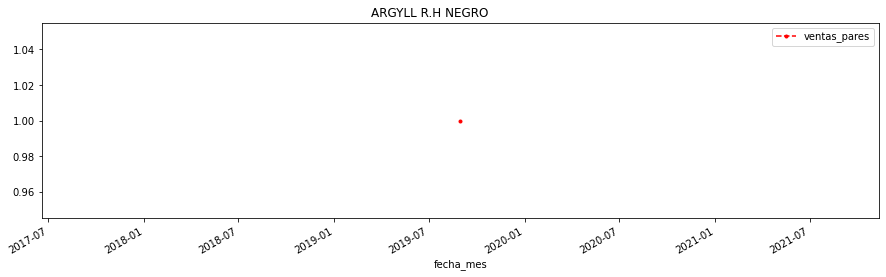

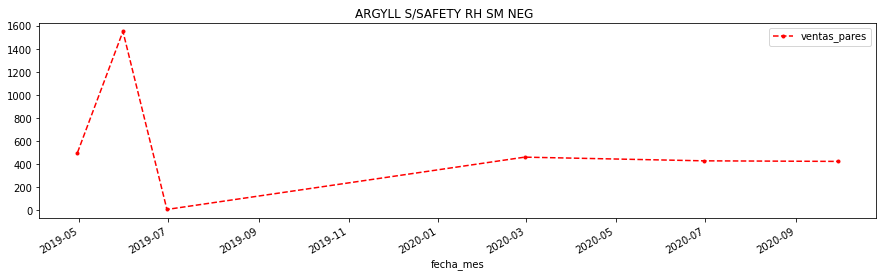

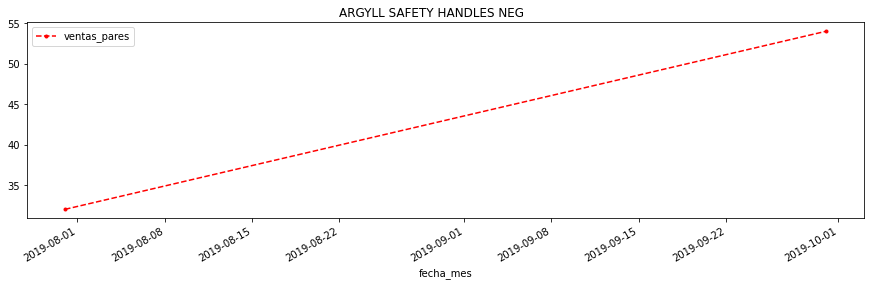

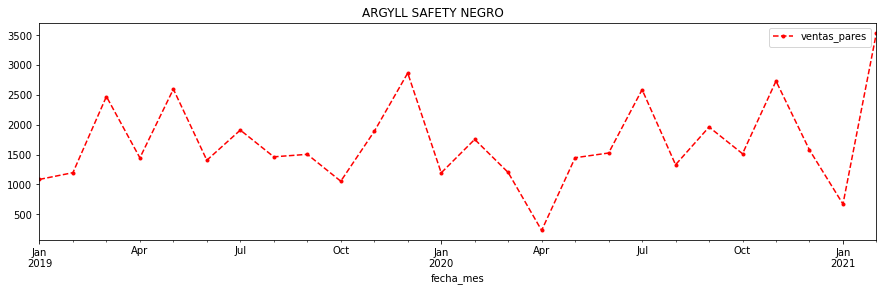

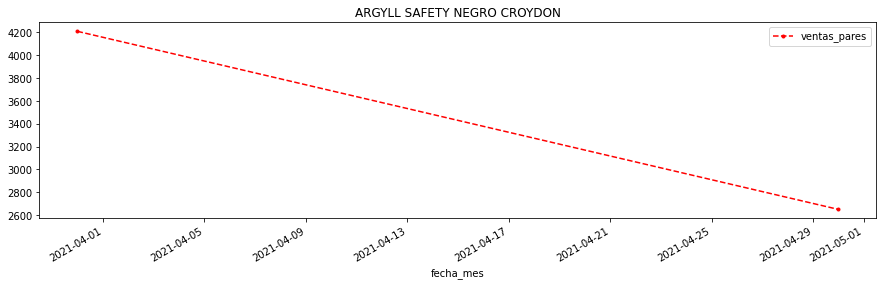

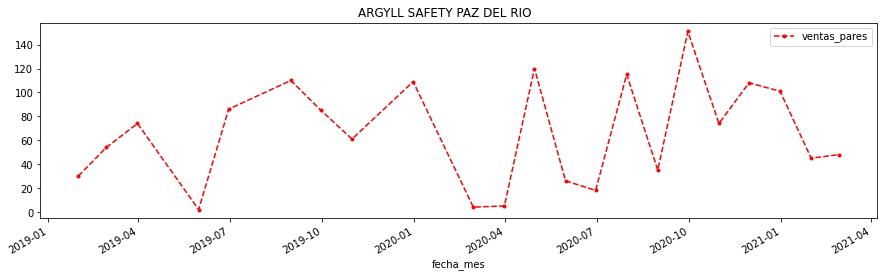

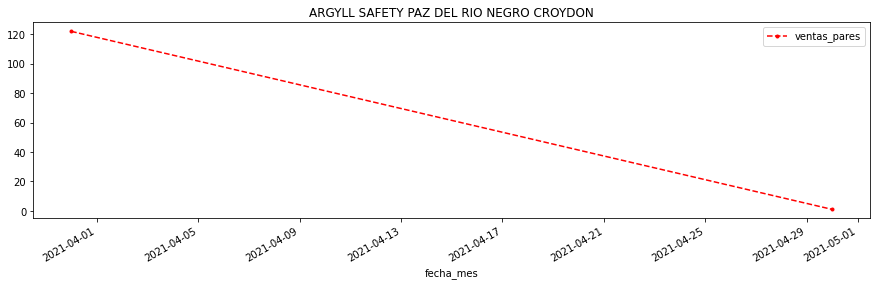

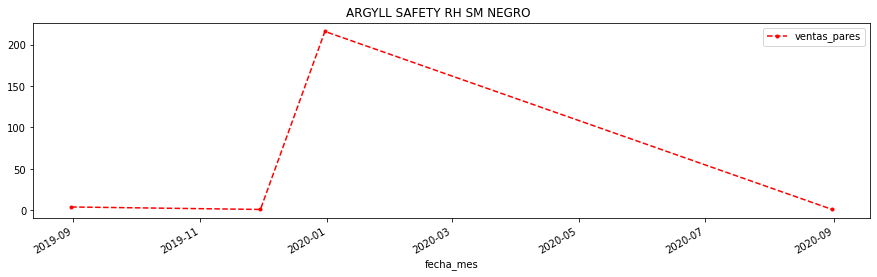

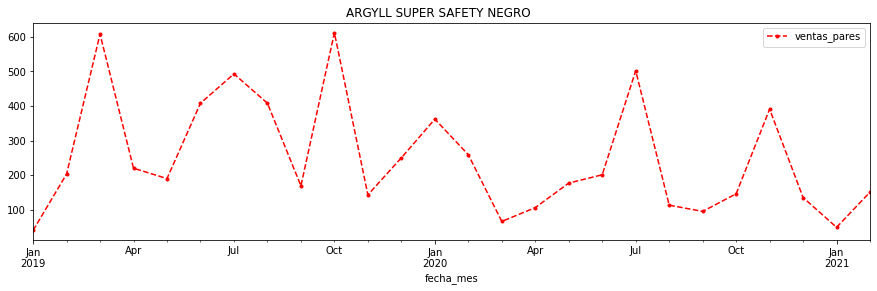

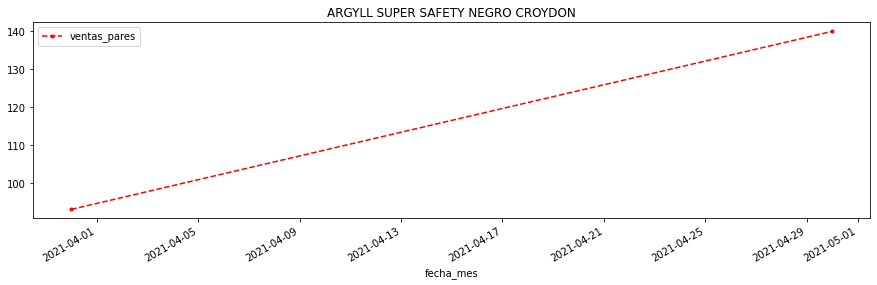

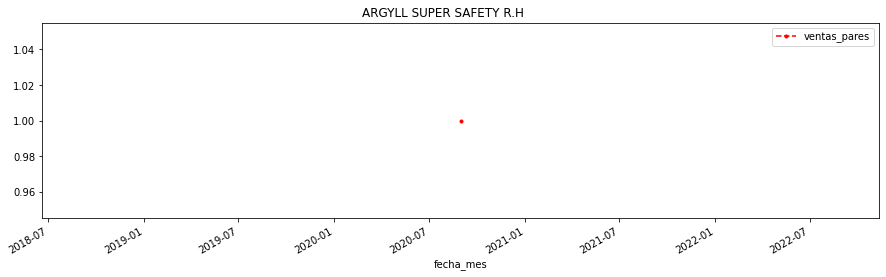

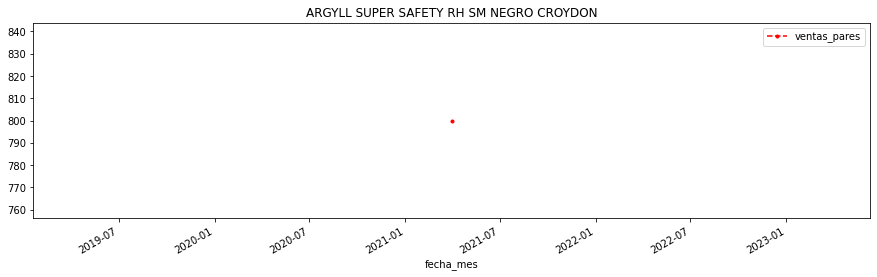

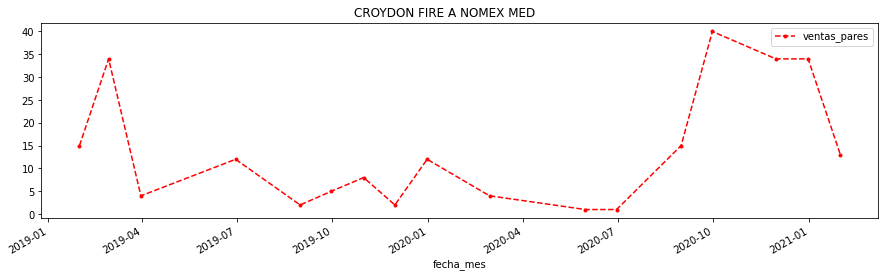

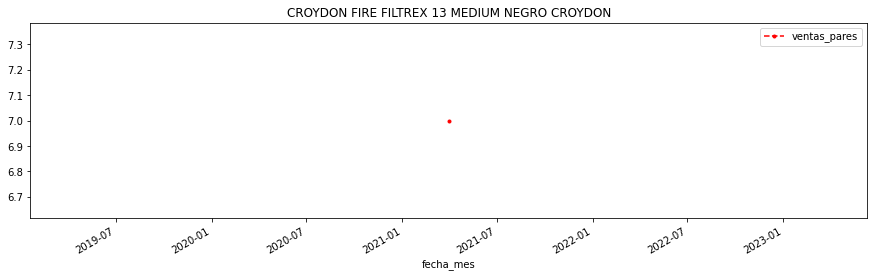

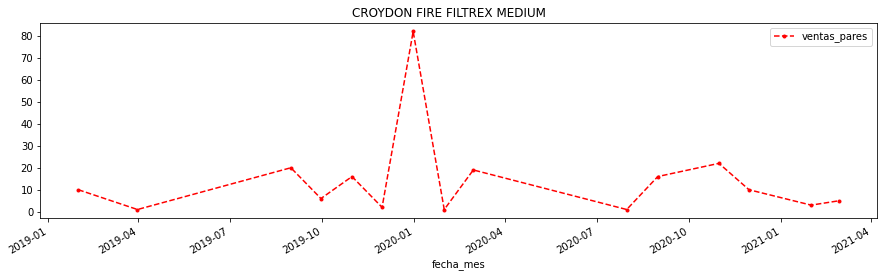

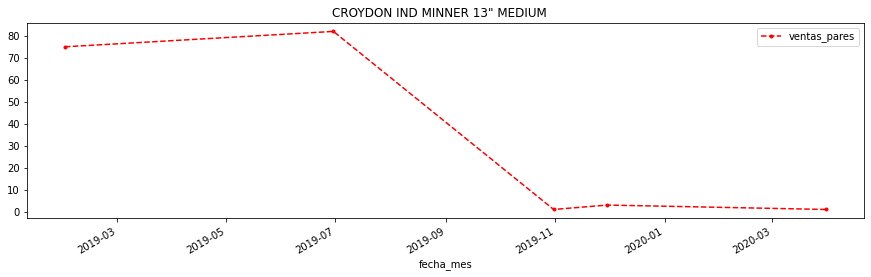

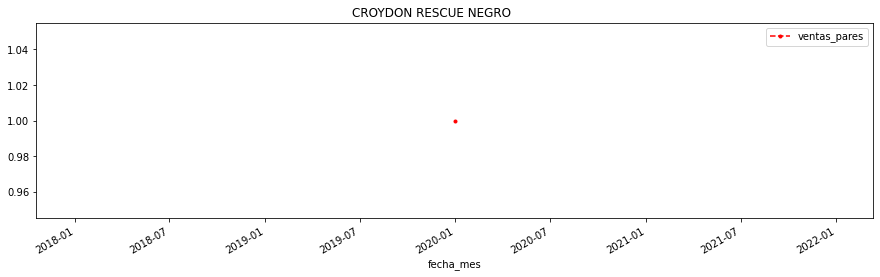

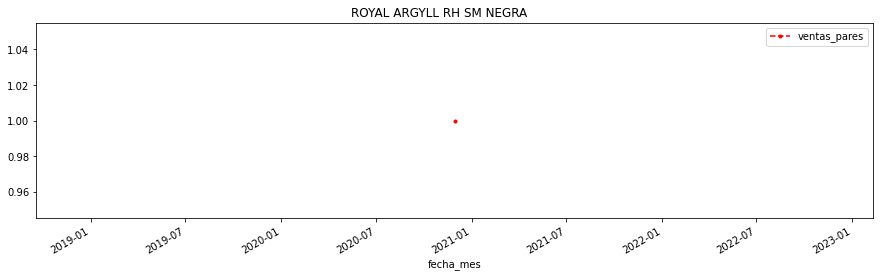

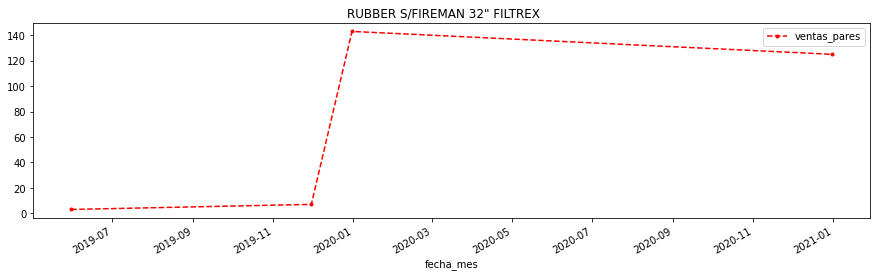

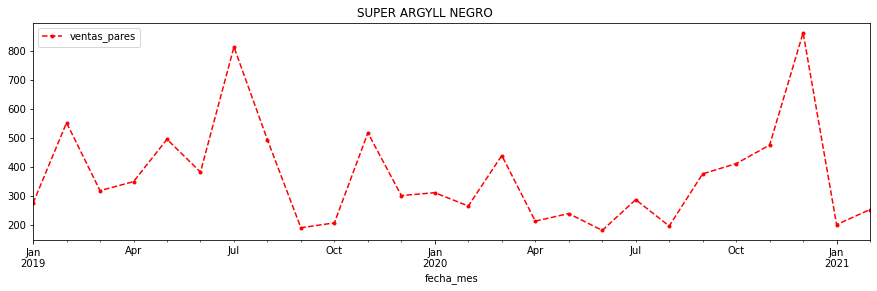

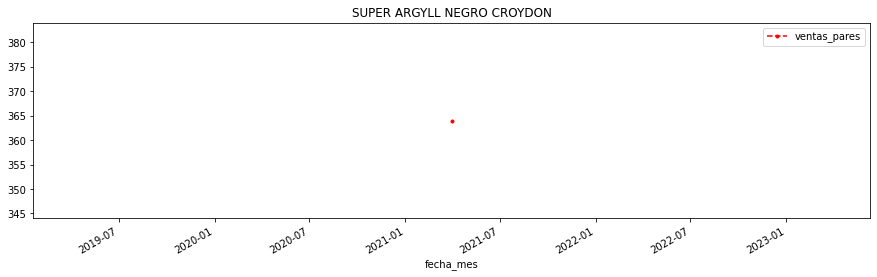

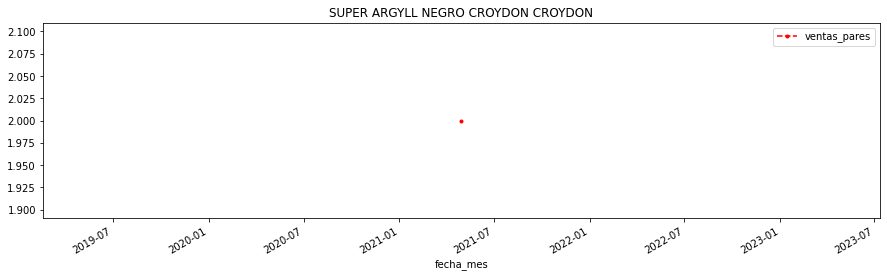

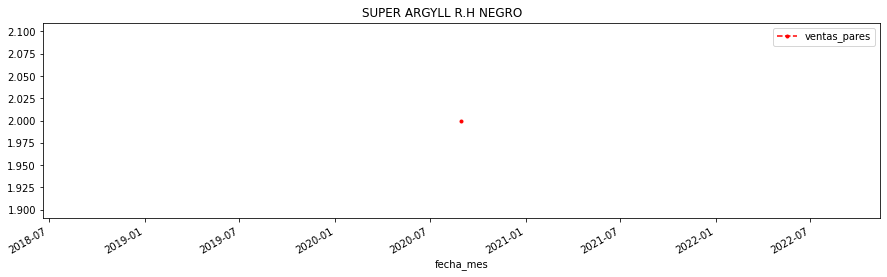

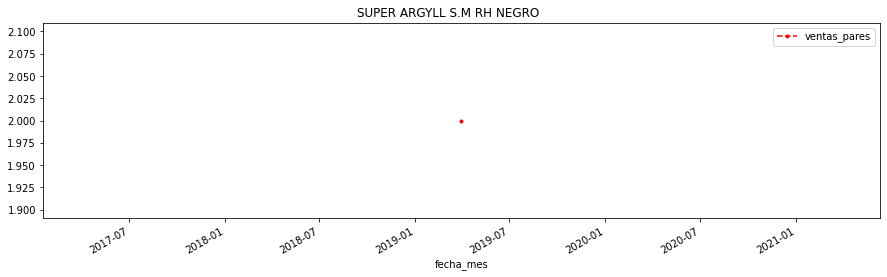

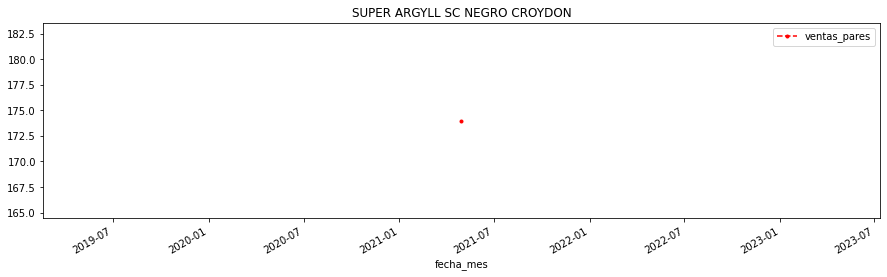

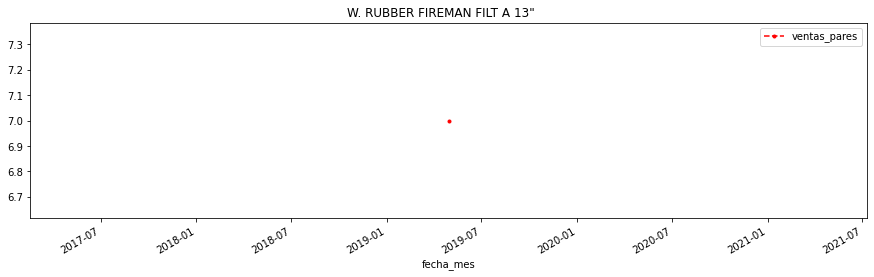

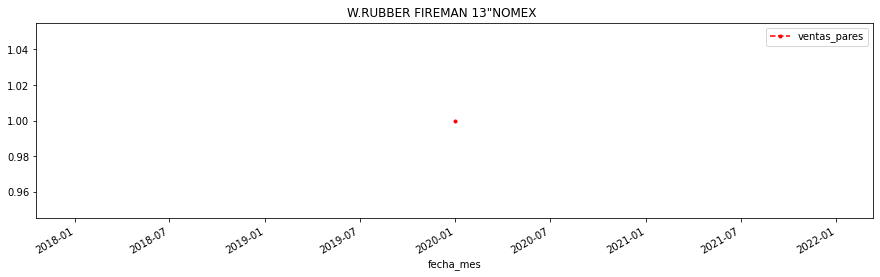

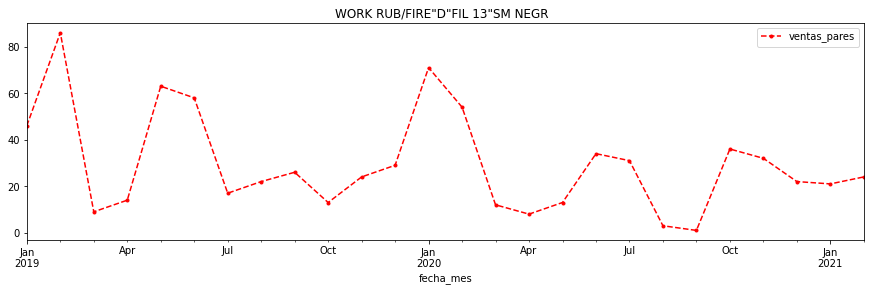

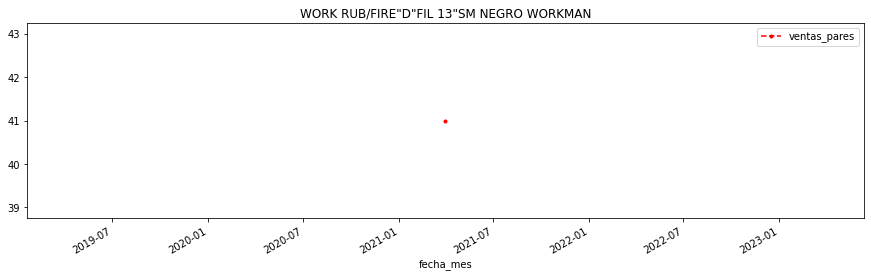

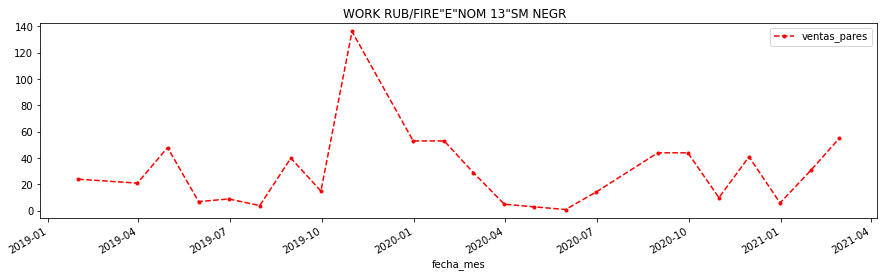

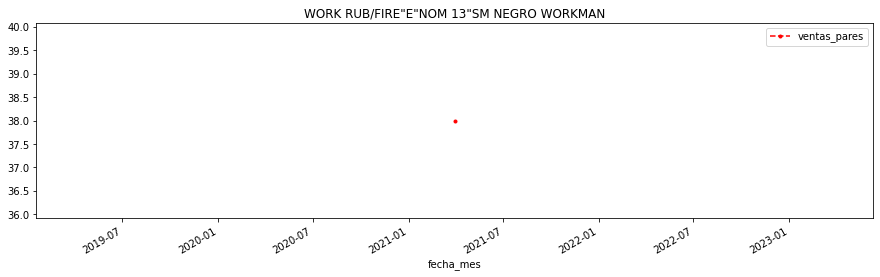

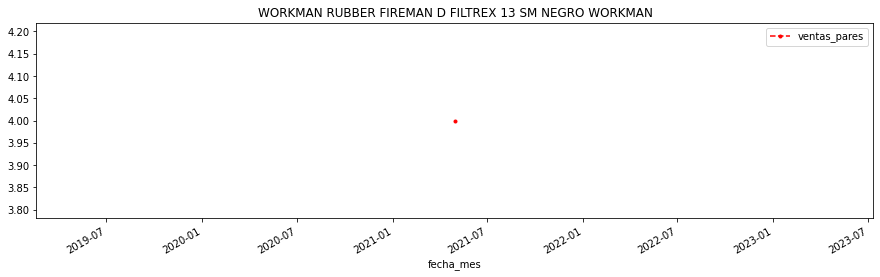

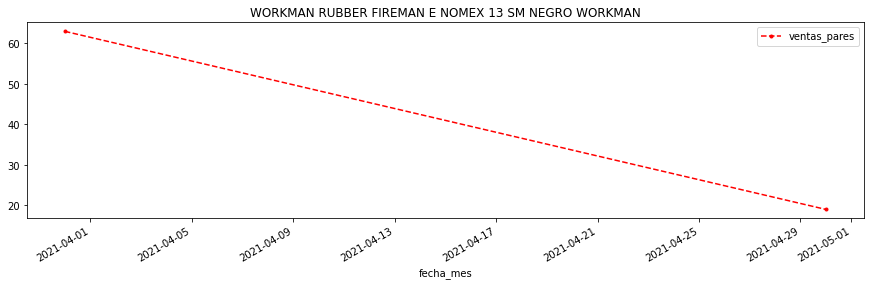

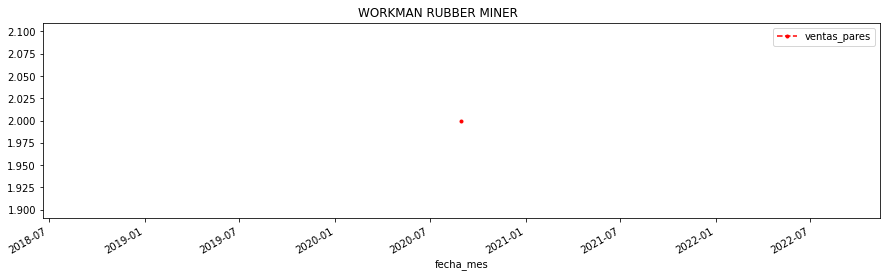

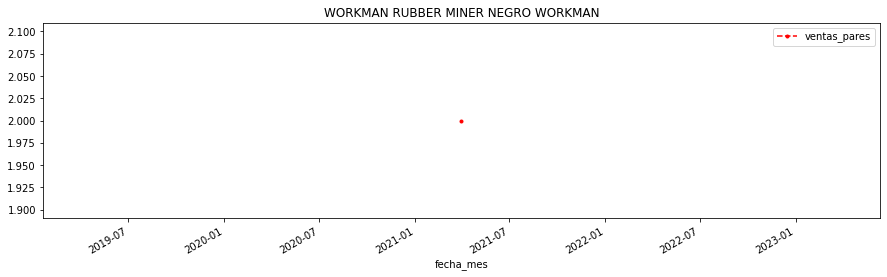

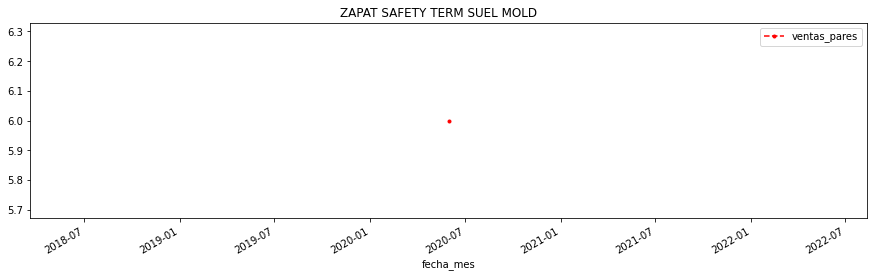

In [ ]:
fabConvencional_PVC = fabIny_PVC
# <COMENTARIO> ===> Se crea un DATA FRAME con los datos para su manipulacion
df_FabBC_Ref = pd.DataFrame(fabConvencional_BC)
# <COMENTARIO> ===> Se realiza una primer agrupacion por Referencia
df_FabBC_Ref= df_FabBC_Ref.groupby(['descricpcion_ref'])
df_FabBC_Ref

# <COMENTARIO> ===> Visualizacion de los datos para observar correlacion 
for group_key, group_value in df_FabBC_Ref:
  #print(k)

  # <COMENTARIO> ===> Agregacion por fecha
  df_0BC = group_value.groupby(['fecha_mes'])['ventas_pares'].sum()
  df_0BC = df_0BC.reset_index()
  df_0BC.plot(x='fecha_mes', y='ventas_pares', linestyle='--', marker='.', color= 'r' ,title=group_key, figsize=(15,4));

### Agrupacion por Referencia - FABRICA PEGADO EN FRIO

---




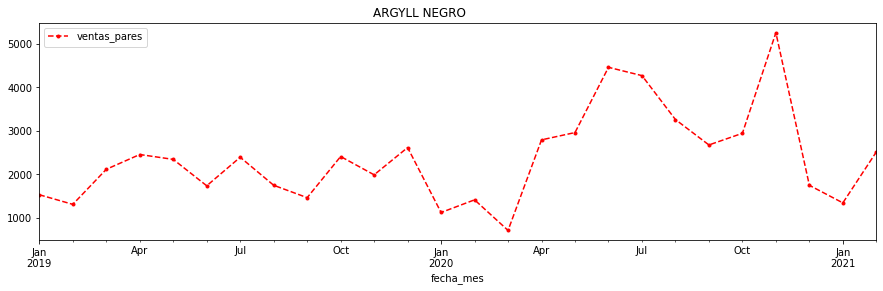

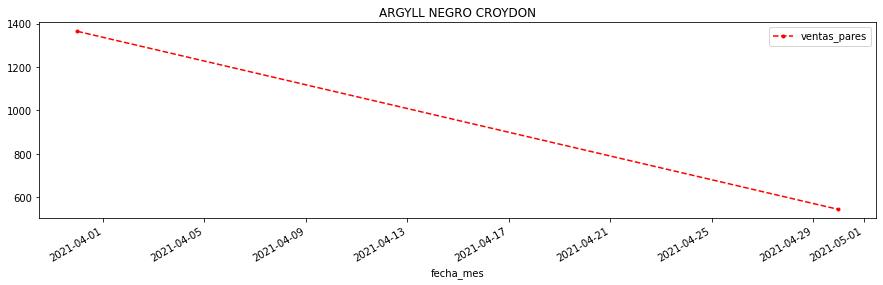

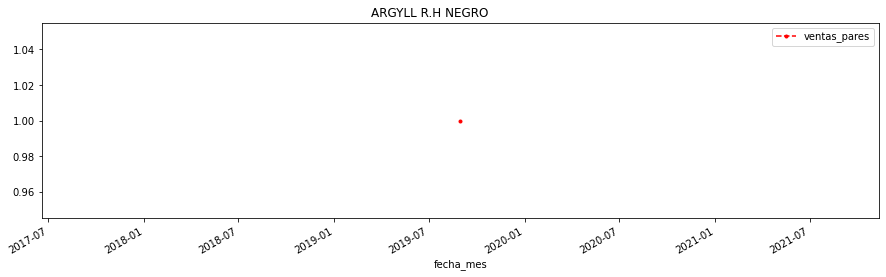

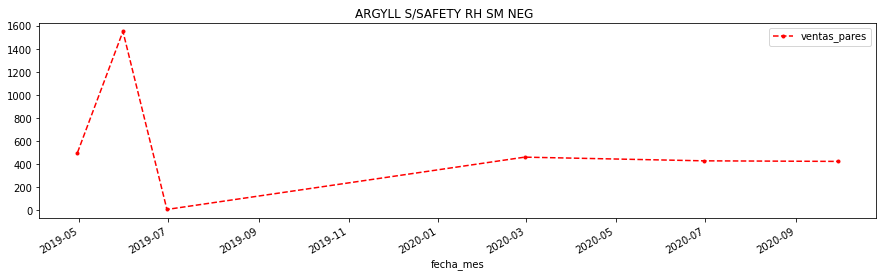

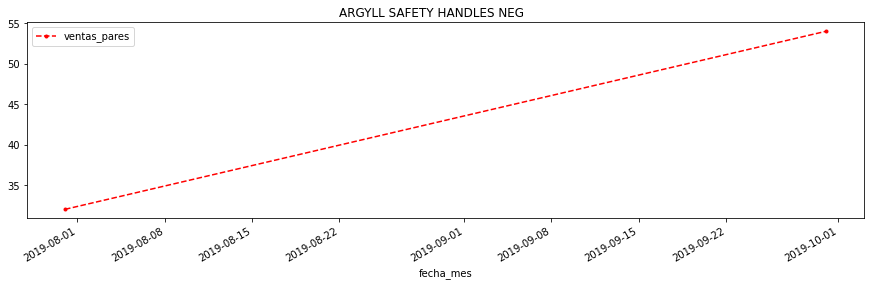

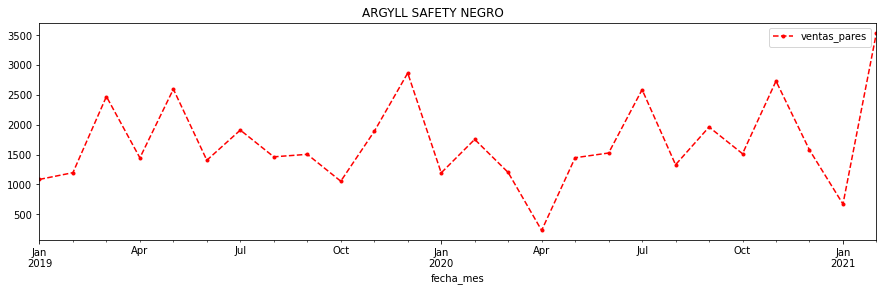

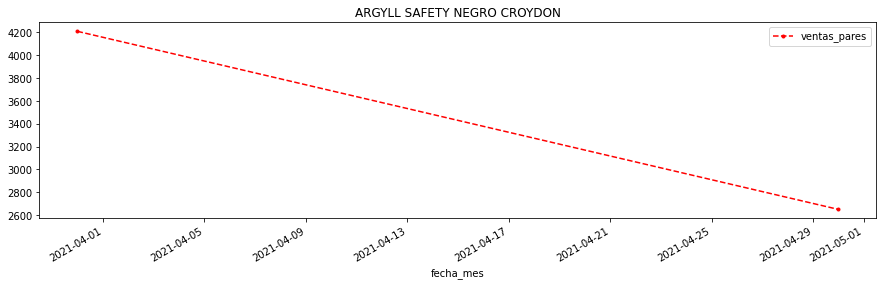

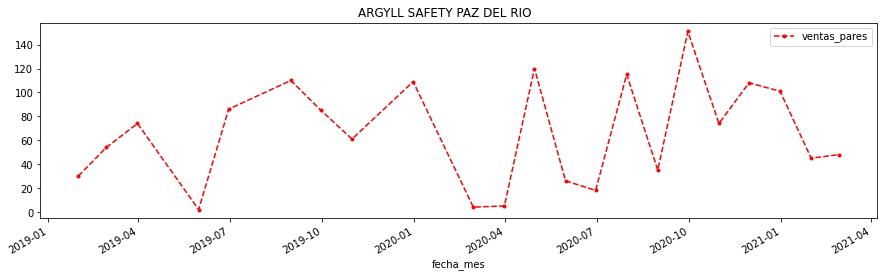

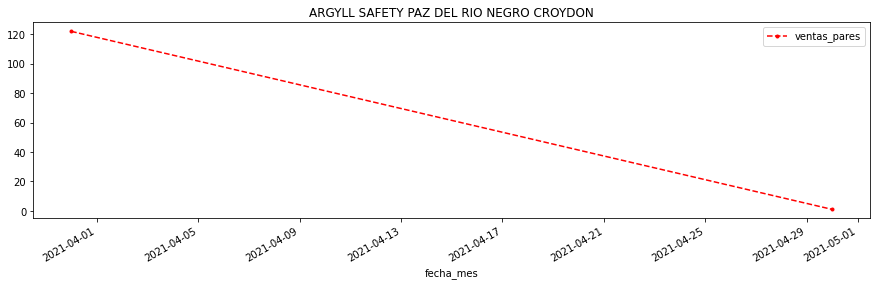

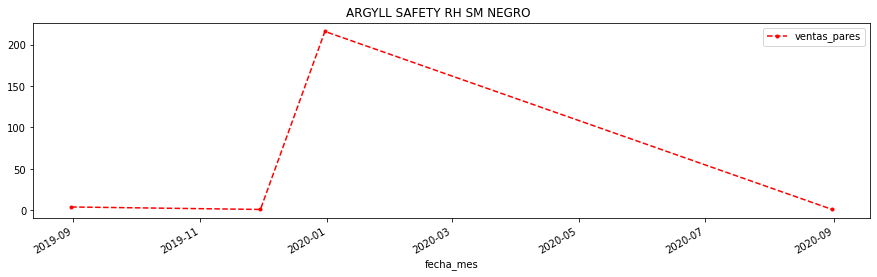

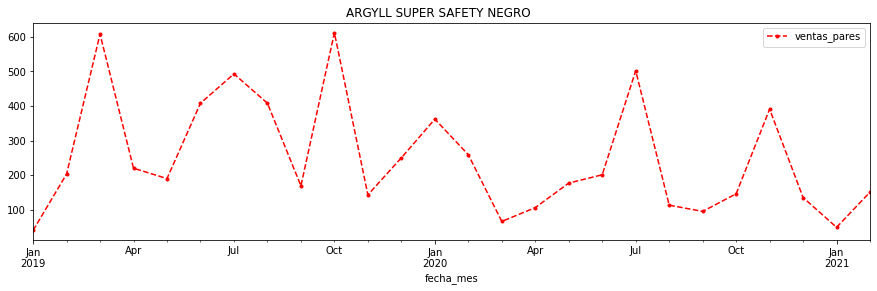

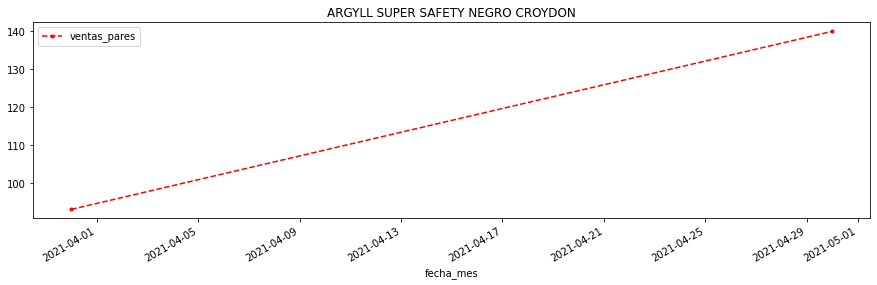

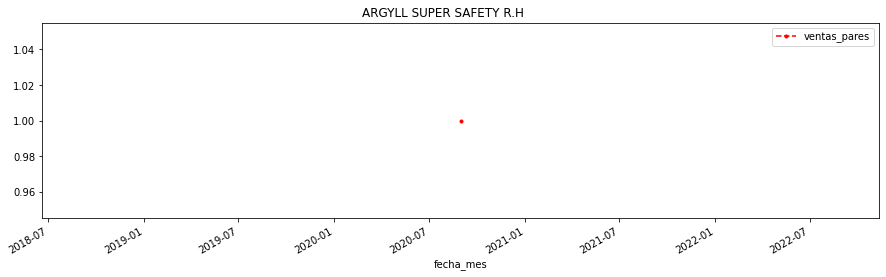

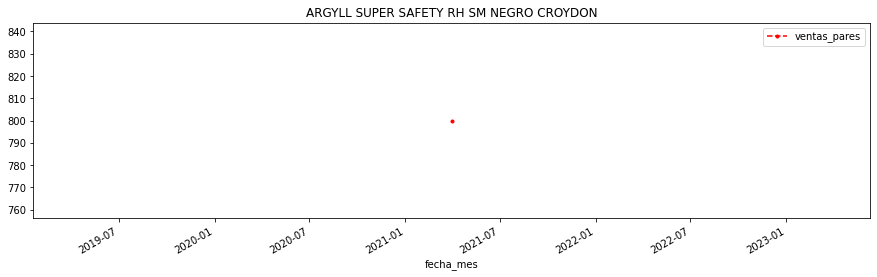

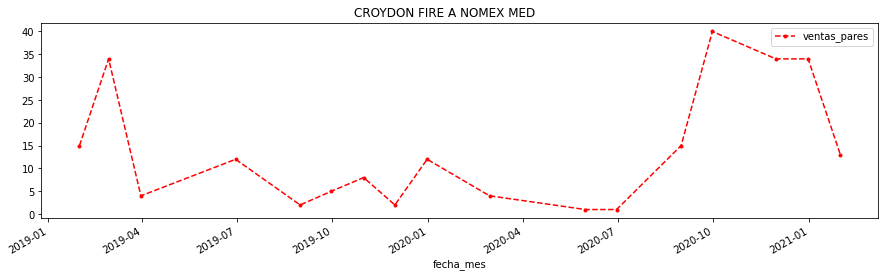

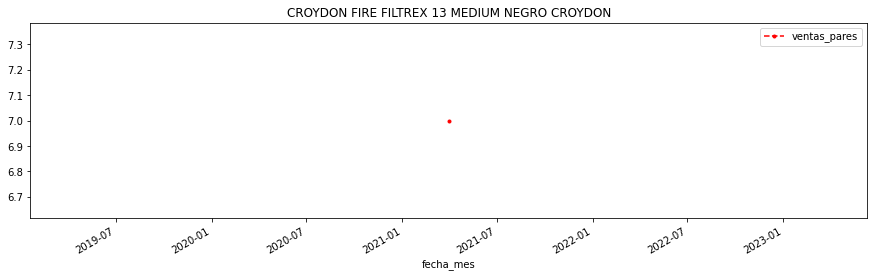

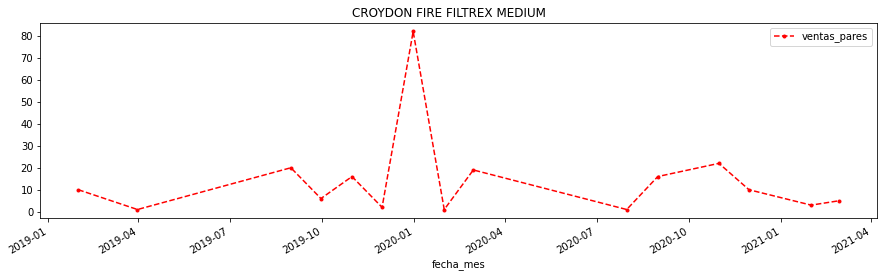

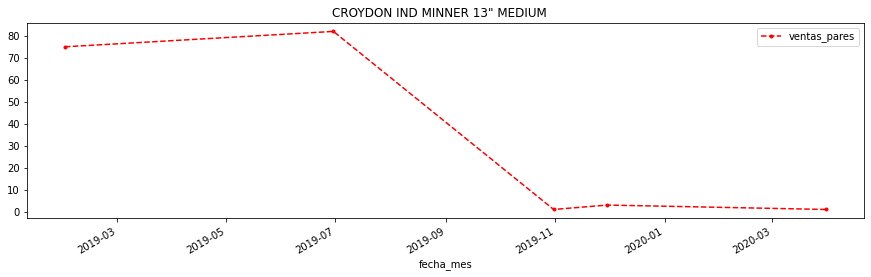

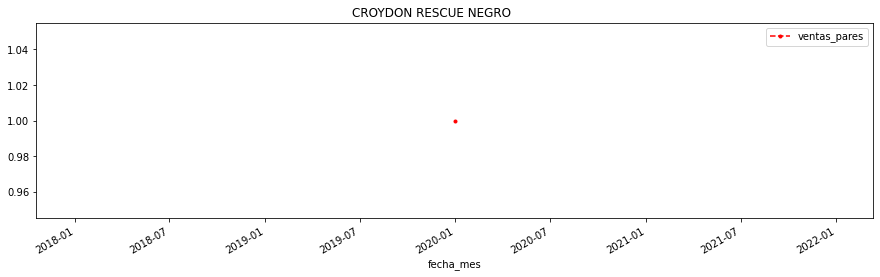

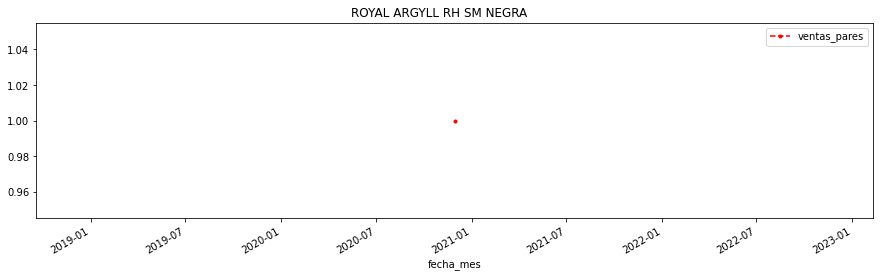

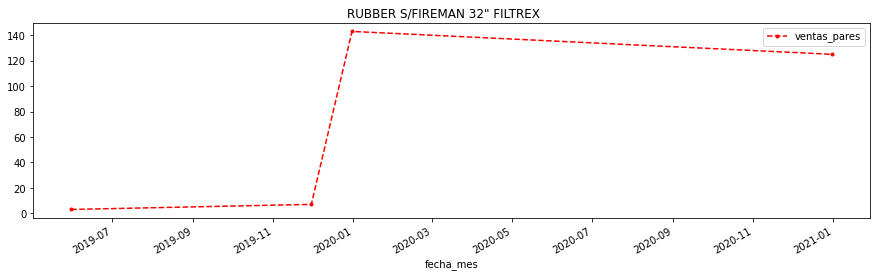

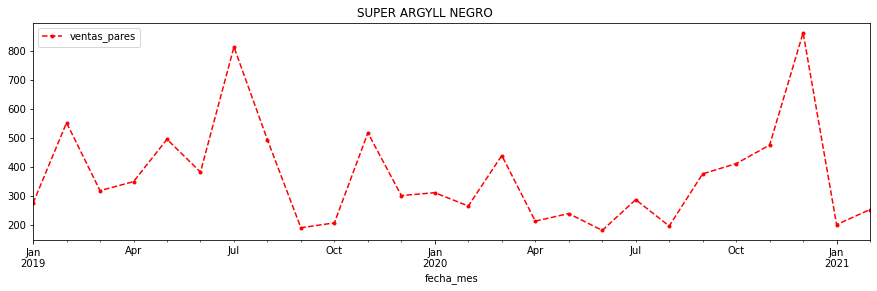

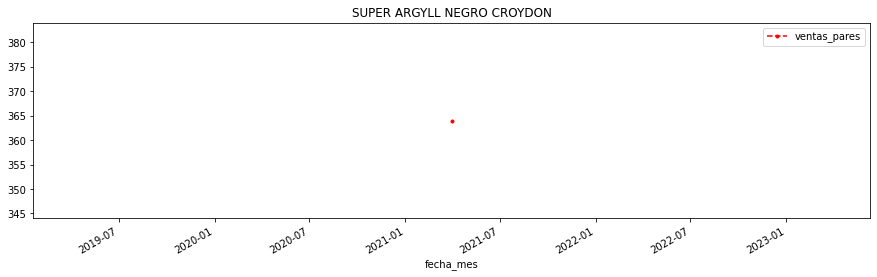

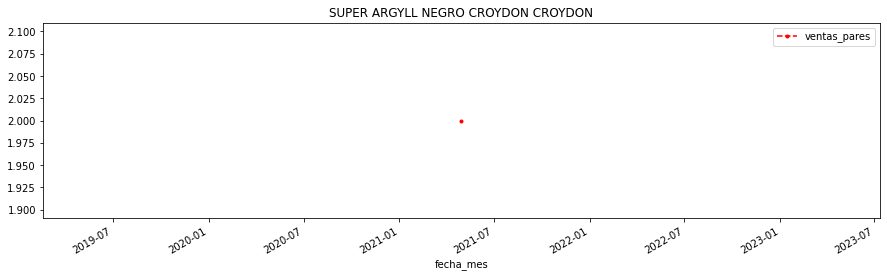

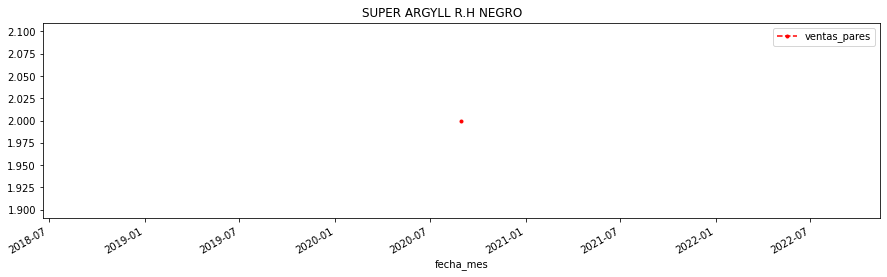

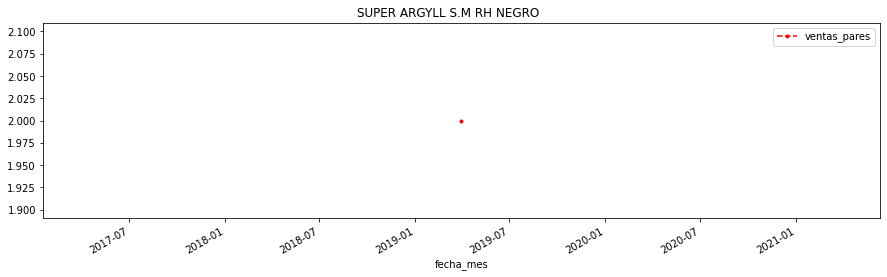

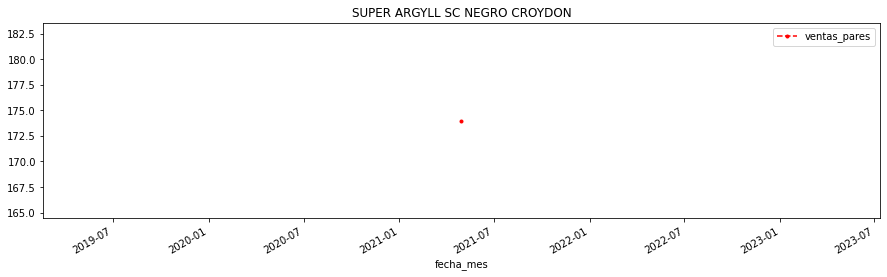

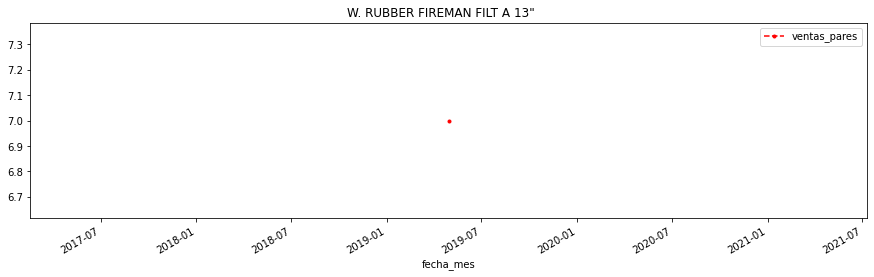

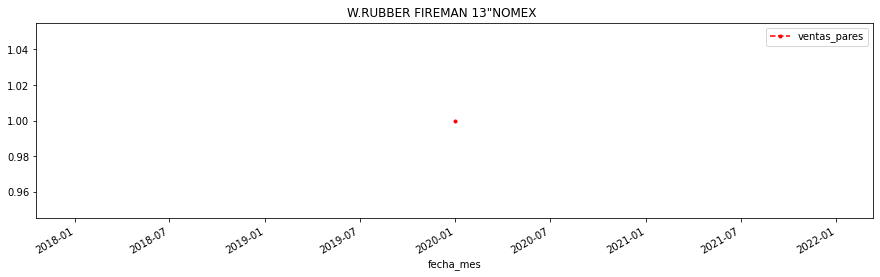

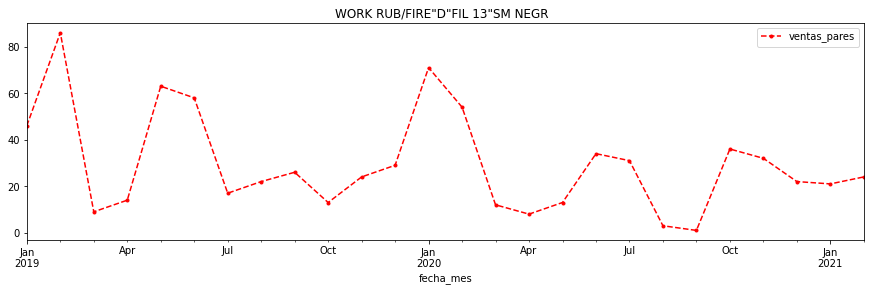

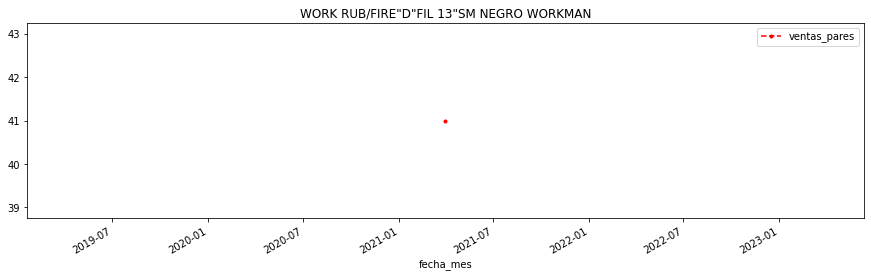

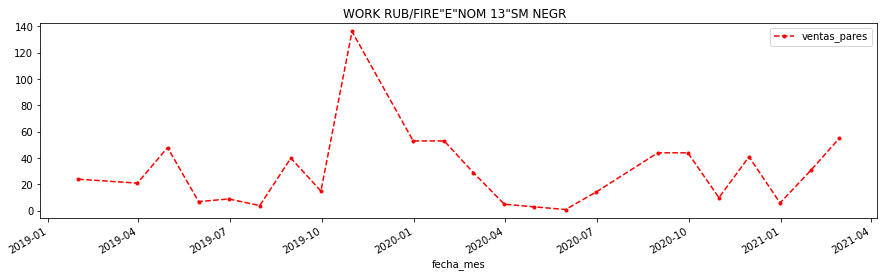

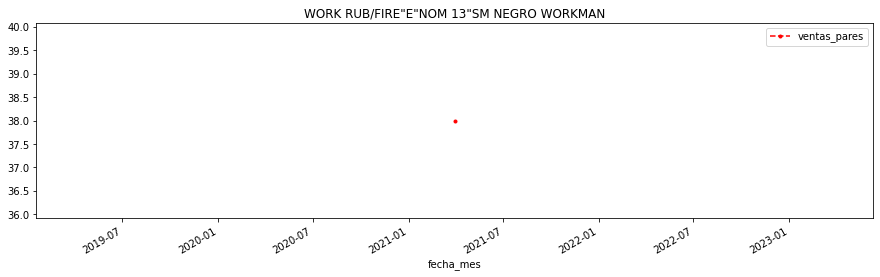

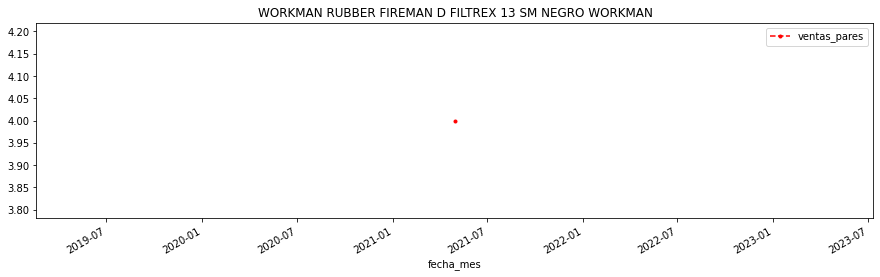

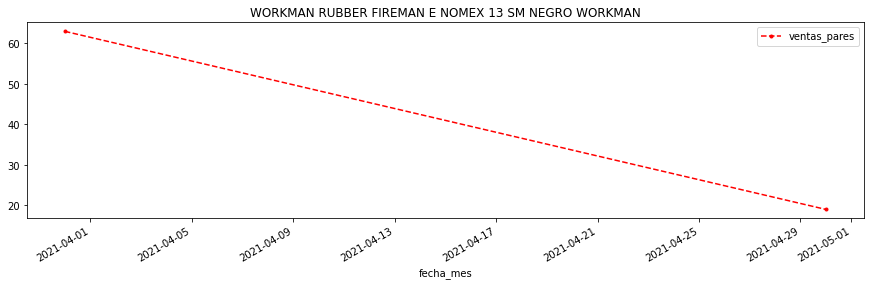

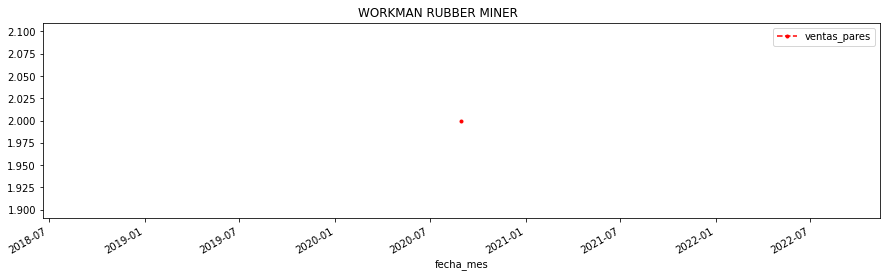

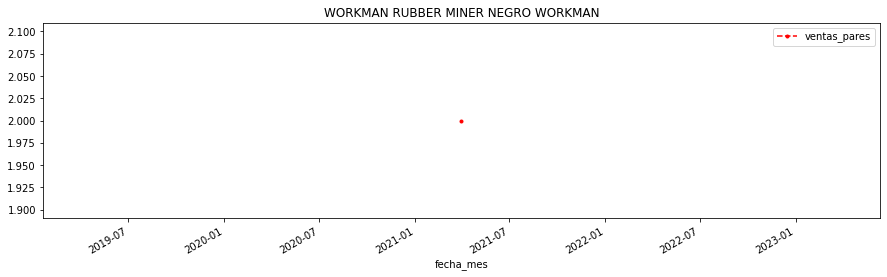

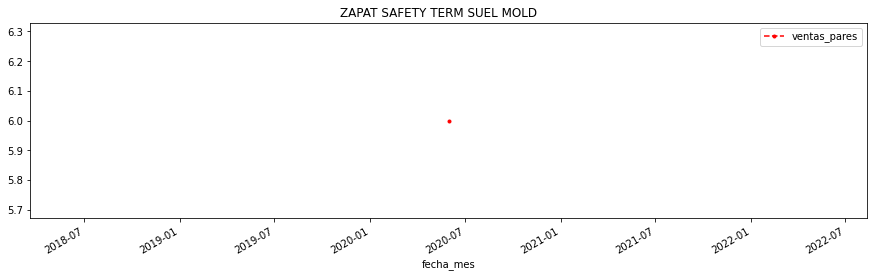

In [ ]:
fabConvencional_Frio = fabPegadoFrio
# <COMENTARIO> ===> Se crea un DATA FRAME con los datos para su manipulacion
df_FabBC_Ref = pd.DataFrame(fabConvencional_BC)
# <COMENTARIO> ===> Se realiza una primer agrupacion por Referencia
df_FabBC_Ref= df_FabBC_Ref.groupby(['descricpcion_ref'])
df_FabBC_Ref

# <COMENTARIO> ===> Visualizacion de los datos para observar correlacion 
for group_key, group_value in df_FabBC_Ref:
  #print(k)

  # <COMENTARIO> ===> Agregacion por fecha
  df_0BC = group_value.groupby(['fecha_mes'])['ventas_pares'].sum()
  df_0BC = df_0BC.reset_index()
  df_0BC.plot(x='fecha_mes', y='ventas_pares', linestyle='--', marker='.', color= 'r' ,title=group_key, figsize=(15,4));

# Preparacion de datos (Fase de preparacion de datos)

---


En esta seccion se pretende realizar un menejo de datos NULL en los parametros que no permiten este tipo de datos. Para esto se realizara una transformacion de los datos categoricos para un mejor manejo y un areduccion de las carateristicas principales


In [ ]:
filtred_semanal_fab = df_semanal_fab
filtred_mensual_fab = df_mensual_fab
filtred_diario_fab = df_diario_fab
print(" informacion de la base de datos con agrupacion mensual")
filtred_mensual_fab.info()
print(" informacion de la base de datos con agrupacion semanal")
filtred_semanal_fab.info()
print(" informacion de la base de datos con agrupacion diario")
filtred_diario_fab.info()


 informacion de la base de datos con agrupacion mensual
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5952 entries, 0 to 6581
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha_mes           5952 non-null   datetime64[ns]
 1   año                 5952 non-null   int64         
 2   mes                 5952 non-null   int64         
 3   submarca_AUR        5952 non-null   object        
 4   descripcion_origen  5952 non-null   object        
 5   descricpcion_ref    5952 non-null   object        
 6   ventas_pares        5952 non-null   int64         
 7   ventas_pesos        5952 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 418.5+ KB
 informacion de la base de datos con agrupacion semanal
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15212 entries, 0 to 16538
Data columns (total 9 columns):
 #   Column              Non-Nu

## Eliminar columnas con un solo valor
 Estas columnas no serán útiles para el modelo ya que no agregan ninguna información a cada solicitud de préstamo. Además, eliminar estas columnas reducirá la cantidad de columnas que necesitaremos explorar más en la siguiente etapa.

In [ ]:
# Eliminacion de Columans con valores unicos
filtred_semanal_fab = filtred_semanal_fab.loc[:,filtred_semanal_fab.apply(pd.Series.nunique) != 1]
filtred_mensual_fab = filtred_mensual_fab.loc[:,filtred_mensual_fab.apply(pd.Series.nunique) != 1]
filtred_diario_fab = filtred_diario_fab.loc[:,filtred_diario_fab.apply(pd.Series.nunique) != 1]


## Manejo de valores perdidos
Eliminemos las columnas por completo donde más del 1%  de las filas de esa columna contienen un valor nulo. Además, eliminaremos las filas restantes que contienen valores nulos. Esto significa que perderemos algunos datos, pero a cambio mantendremos algunas funciones adicionales para usar en la predicción (ya que no tendremos que eliminar esas columnas).

In [ ]:
#<Comentario> Seleccion de Caracteristicas (Features)  

print("Acontinucaiocn se muestran los estadisticos de las variables cuantitativas")
estadisticos_fab_mensual=filtred_mensual_fab.describe()
print(estadisticos_fab_mensual)
estadisticos_fab_semanal=filtred_semanal_fab.describe()
print(estadisticos_fab_semanal)
estadisticos_fab_diario=filtred_diario_fab.describe()
print(estadisticos_fab_diario)


null_counts_mensual = filtred_mensual_fab.isnull().sum()
print("Numero de Null values en cada columna (MENSUAL):\n{}".format(null_counts_mensual))

null_counts_semanal = filtred_semanal_fab.isnull().sum()
print("Numero de Null values en cada columna (SEMANAL):\n{}".format(null_counts_semanal))

null_counts_diario = filtred_diario_fab.isnull().sum()
print("Numero de Null values en cada columna (DIARIO):\n{}".format(null_counts_diario))


Acontinucaiocn se muestran los estadisticos de las variables cuantitativas
               año          mes  ventas_pares  ventas_pesos
count  5952.000000  5952.000000   5952.000000  5.952000e+03
mean   2019.631888     6.431620    821.599126  1.897116e+07
std       0.684032     3.613121   4270.054390  9.775303e+07
min    2019.000000     1.000000      1.000000  2.120000e+02
25%    2019.000000     3.000000      7.000000  2.073750e+05
50%    2020.000000     6.000000     38.000000  1.101747e+06
75%    2020.000000    10.000000    282.250000  6.874894e+06
max    2021.000000    12.000000  84552.000000  3.709681e+09
                año        semana           mes  ventas_pares  ventas_pesos
count  15212.000000  15212.000000  15212.000000  15212.000000  1.521200e+04
mean    2019.601893     26.608073      6.461083    323.411583  7.484002e+06
std        0.660257     15.701139      3.590101   1432.396896  4.030476e+07
min     2019.000000      1.000000      1.000000      1.000000  2.120000e+02
25%  

## Investigacion profunda columnas Cuantitativas

### Variables numéricas

In [ ]:
#<COMENTARIO>--- Variables numéricas
# ==============================================================================

print("semanal: \n{}".format(filtred_semanal_fab.select_dtypes(include=['float64', 'int']).describe()))
print("mensual: \n{}".format(filtred_mensual_fab.select_dtypes(include=['float64', 'int']).describe()))
print("diario: \n{}".format(filtred_diario_fab.select_dtypes(include=['float64', 'int']).describe()))

semanal: 
                año        semana           mes  ventas_pares  ventas_pesos
count  15212.000000  15212.000000  15212.000000  15212.000000  1.521200e+04
mean    2019.601893     26.608073      6.461083    323.411583  7.484002e+06
std        0.660257     15.701139      3.590101   1432.396896  4.030476e+07
min     2019.000000      1.000000      1.000000      1.000000  2.120000e+02
25%     2019.000000     12.000000      3.000000      6.000000  1.762200e+05
50%     2020.000000     27.000000      7.000000     27.000000  7.241395e+05
75%     2020.000000     41.000000     10.000000    143.250000  3.573680e+06
max     2021.000000     53.000000     12.000000  47597.000000  2.801670e+09
mensual: 
               año          mes  ventas_pares  ventas_pesos
count  5952.000000  5952.000000   5952.000000  5.952000e+03
mean   2019.631888     6.431620    821.599126  1.897116e+07
std       0.684032     3.613121   4270.054390  9.775303e+07
min    2019.000000     1.000000      1.000000  2.120000e

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



Correlacion mensual:
      variable_1    variable_2         r     abs_r
11  ventas_pares  ventas_pesos  0.857481  0.857481
14  ventas_pesos  ventas_pares  0.857481  0.857481
1            año           mes -0.233367  0.233367
4            mes           año -0.233367  0.233367
2            año  ventas_pares  0.022775  0.022775


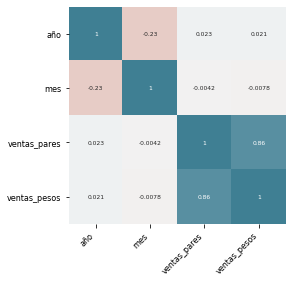

In [ ]:

print("Correlacion mensual:") 
corr_matrix = filtred_mensual_fab.select_dtypes(include=['float64', 'int']).corr(method='pearson')
print(tidy_corr_matrix(corr_matrix).head())

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

#<COMENTARIO>---Eliminacionde las columnas con alta correlacion con respecta a pares
filtred_mensual_fab=filtred_mensual_fab.drop('ventas_pesos', axis=1)

Correlacion semanal:
      variable_1    variable_2         r     abs_r
11           mes        semana  0.996451  0.996451
7         semana           mes  0.996451  0.996451
23  ventas_pesos  ventas_pares  0.817982  0.817982
19  ventas_pares  ventas_pesos  0.817982  0.817982
10           mes           año -0.191582  0.191582


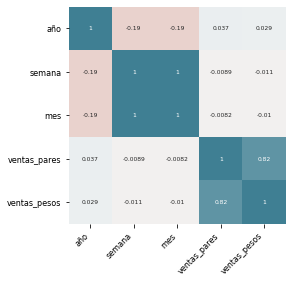

In [ ]:
print("Correlacion semanal:") 
corr_matrix = filtred_semanal_fab.select_dtypes(include=['float64', 'int']).corr(method='pearson')
print(tidy_corr_matrix(corr_matrix).head())

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

#<COMENTARIO>---Eliminacionde las columnas con alta correlacion con respecta a pares
filtred_semanal_fab=filtred_semanal_fab.drop('ventas_pesos', axis=1)

Correlacion diaria:
      variable_1    variable_2         r     abs_r
15        semana           mes  0.996891  0.996891
9            mes        semana  0.996891  0.996891
47  ventas_pesos  ventas_pares  0.827924  0.827924
41  ventas_pares  ventas_pesos  0.827924  0.827924
7            mes           año -0.204497  0.204497


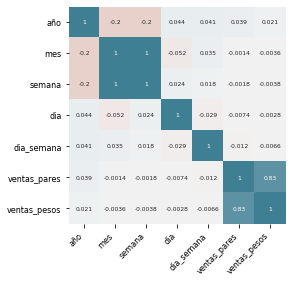

In [ ]:
print("Correlacion diaria:") 
corr_matrix = filtred_diario_fab.select_dtypes(include=['float64', 'int']).corr(method='pearson')
print(tidy_corr_matrix(corr_matrix).head())


# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)
#<COMENTARIO>---Eliminacionde las columnas con alta correlacion con respecta a pares
filtred_diario_fab=filtred_diario_fab.drop(['ventas_pesos', 'semana', 'mes', 'dia_semana'], axis=1)

### Variable respuesta
En este caso es posible ver que la variable respuesta es el numero de pares vendidos

#### Agrupacion MENSUAL

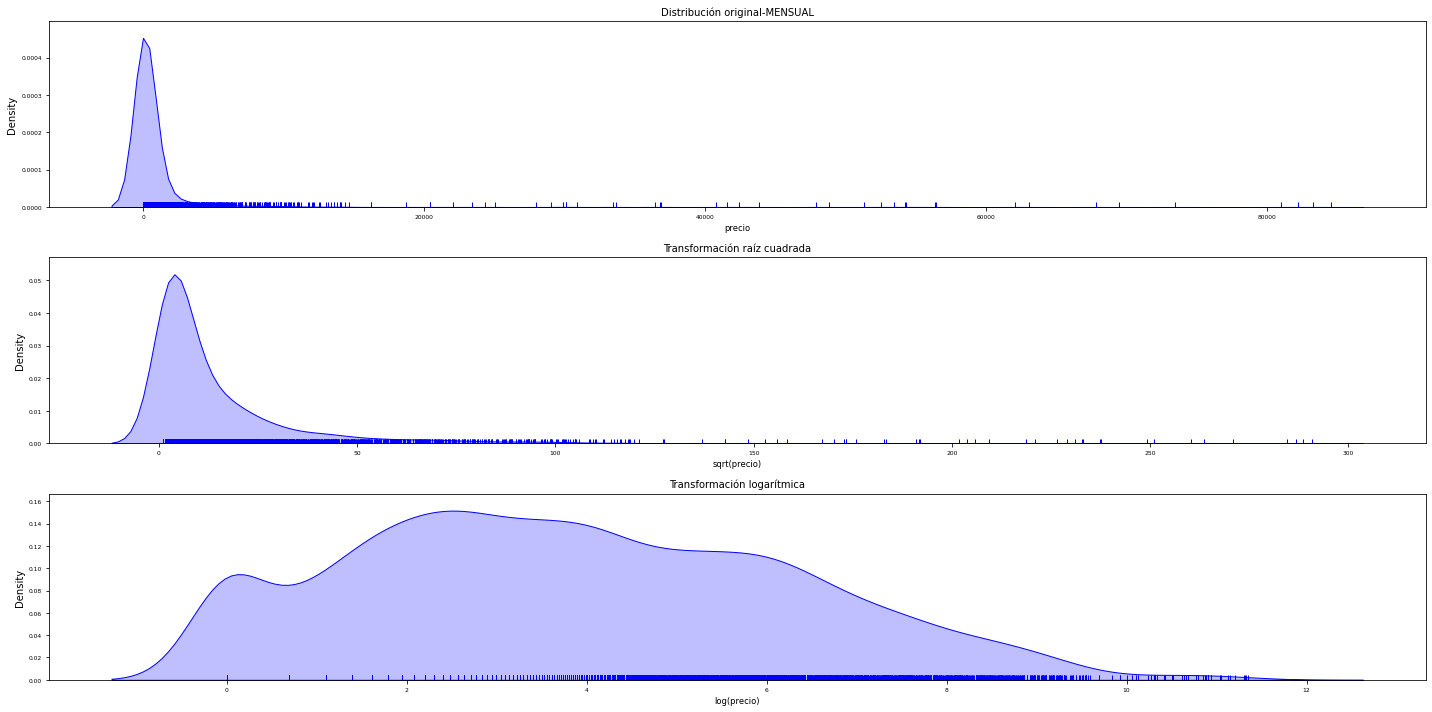

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))
sns.distplot(
    filtred_mensual_fab['ventas_pares'],
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original-MENSUAL", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(filtred_mensual_fab['ventas_pares']),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(filtred_mensual_fab['ventas_pares']),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [ ]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(filtred_mensual_fab['ventas_pares'], distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)
# APARECE EN ORDEN DE LA QUE MAS SE ASEMEJA A LA QUE MENOS

sumsquare_error           aic            bic    kl_div
expon        1.352265e-07  1.164958e+04 -145853.024551       inf
beta         4.468799e-07  2.109607e+04 -138720.987809       inf
logistic     4.873652e-07  1.327792e+04 -138222.190188       inf
chi2         7.042314e-07  3.012712e+03 -136022.607006       inf
exponpow     7.325136e-07  2.600377e+03 -135788.247467       inf
powerlaw     7.747464e-07  2.514985e+03 -135454.615633       inf
norm         8.926728e-07  1.455383e+04 -134620.001779       inf
cauchy       9.310792e-07  3.672678e+03 -134369.278153       inf
gamma        1.058220e-06  1.993995e+06 -133598.735086  0.141629

#### Agrupacion SEMANAL

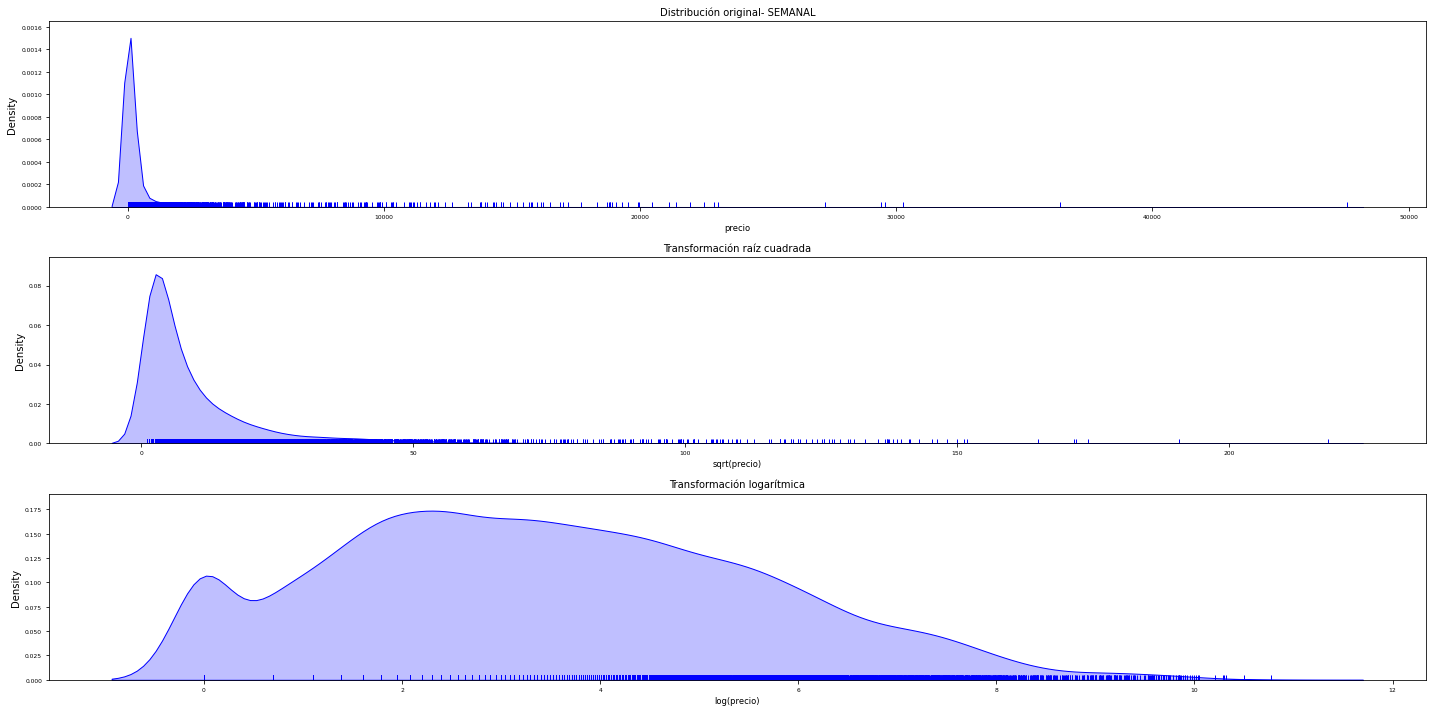

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))
sns.distplot(
    filtred_semanal_fab['ventas_pares'],
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original- SEMANAL", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(filtred_semanal_fab['ventas_pares']),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(filtred_semanal_fab['ventas_pares']),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [ ]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(filtred_semanal_fab['ventas_pares'], distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)
# APARECE EN ORDEN DE LA QUE MAS SE ASEMEJA A LA QUE MENOS

sumsquare_error           aic            bic    kl_div
expon        2.007245e-07  1.592166e+04 -381059.171000       inf
logistic     9.793374e-07  1.889658e+04 -356949.023972       inf
beta         1.017088e-06  2.776455e+04 -356354.403252       inf
chi2         1.933231e-06  3.605576e+03 -346594.142180       inf
exponpow     2.173773e-06  5.290691e+03 -344810.202681       inf
norm         2.600172e-06  3.770362e+04 -342095.165323       inf
powerlaw     2.751056e-06  2.267297e+03 -341227.465437       inf
cauchy       2.955523e-06  3.518177e+03 -340146.536387       inf
gamma        3.465448e-06  1.137552e+06 -337715.671099  0.122882

####Agrupacion DIARIA

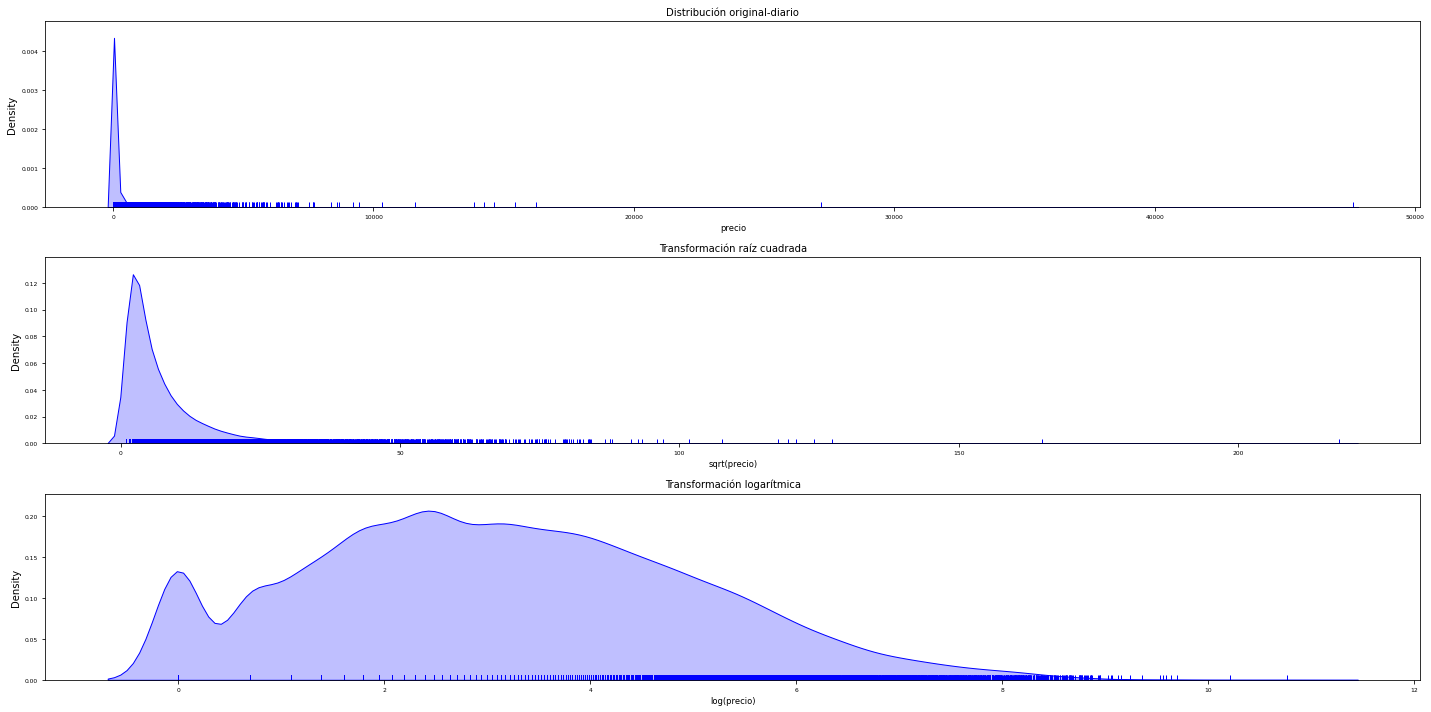

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))
sns.distplot(
    filtred_diario_fab['ventas_pares'],
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original-diario", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(filtred_diario_fab['ventas_pares']),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(filtred_diario_fab['ventas_pares']),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [ ]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(filtred_diario_fab['ventas_pares'], distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)
# APARECE EN ORDEN DE LA QUE MAS SE ASEMEJA A LA QUE MENOS

sumsquare_error           aic            bic    kl_div
expon        4.861197e-07  3.582111e+04 -900365.417714       inf
logistic     5.074311e-07  4.537844e+04 -898821.831397       inf
norm         1.763976e-06  2.415199e+05 -853997.010687       inf
exponpow     1.865420e-06  2.501839e+04 -851974.894039       inf
chi2         1.950969e-06  4.579696e+03 -850361.726544       inf
powerlaw     2.979781e-06  2.416878e+03 -835125.036066       inf
cauchy       3.536324e-06  3.586688e+03 -828975.074399       inf
beta         3.654286e-06  1.146946e+05 -827773.609020       inf
gamma        3.920127e-06  1.132515e+06 -825257.747785  0.059968

## Investigacion profunda de columnas categoricas (no numericas)

---


Nuestro objetivo aquí es terminar con un conjunto de datos que esté listo para el aprendizaje automático, lo que significa que no contiene valores perdidos y que todos los valores en las columnas son numéricos (tipo de datos flotante o int).

In [ ]:
filtred_semanal_fab['año'] = filtred_semanal_fab['año'].astype('object')
filtred_semanal_fab['mes'] = filtred_semanal_fab['mes'].astype('object')
filtred_semanal_fab['semana'] = filtred_semanal_fab['semana'].astype('object')


filtred_mensual_fab['año'] = filtred_mensual_fab['año'].astype('object')
filtred_mensual_fab['mes'] = filtred_mensual_fab['mes'].astype('object')

filtred_diario_fab['año'] = filtred_diario_fab['año'].astype('object')
filtred_diario_fab['dia'] = filtred_diario_fab['dia'].astype('object')




### Agrupacion MENSUAL

In [ ]:
print("Tipo de datos y frecuencias MENSUAL\n{}".format(filtred_mensual_fab.dtypes.value_counts()))

#<COMENATRIO>--- Las variables tipo objeto son textos y deben representarse con un numero
object_columns_mensual = filtred_mensual_fab.select_dtypes(include=['object'])
print("Columnas tipo Objeto MENSUAL: \n", object_columns_mensual.iloc[0])

# Variables cualitativas (tipo object)
# ==============================================================================
filtred_mensual_fab.select_dtypes(include=['object']).describe()

Tipo de datos y frecuencias MENSUAL
object            5
datetime64[ns]    1
int64             1
dtype: int64
Columnas tipo Objeto MENSUAL: 
 año                                               2019
mes                                                  1
submarca_AUR                               BOTA ARGYLL
descripcion_origen                 FABRICA-BOTA CAUCHO
descricpcion_ref      ARGYLL NEGRO                    
Name: 0, dtype: object


año   mes  ...     descripcion_origen                  descricpcion_ref
count   5952  5952  ...                   5952                              5952
unique     3    12  ...                      4                              1018
top     2019    11  ...  FABRICA-INYECCION PVC  BOTA MACHITA NEGRO              
freq    2891   643  ...                   2592                                26

[4 rows x 5 columns]

Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada o bootstrapping, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. En estos casos, suele ser conveniente:

- Eliminar las observaciones del grupo minoritario si es una variable multiclase.
- Eliminar la variable si solo tiene dos niveles.
- Agrupar los niveles minoritarios en un único grupo.
- Asegurar que, en la creación de las particiones, todos los grupos estén representados en cada una de ellas.

In [ ]:
subAUR_rempl = {'DISCOVERY PEG. EN FR': 'DISCOVERY & DIS PEG FRIO',
                'DISCOVERY': 'DISCOVERY & DIS PEG FRIO',
                'DEPORTIVO': 'OTROS',
                'BOTAS FEMINELA': 'BOTAS DE PVC & FEMINELA',
                'BOTAS DE PVC': 'BOTAS DE PVC & FEMINELA',
                'ROYAL LONA': 'ROYAL LONA & CAUCHO SYX',
                'BOTAS DE CAUCHO SYX': 'ROYAL LONA & CAUCHO SYX',
                'BOTAS MACHITA': 'BOTAS MACHITA & ESTAMPADA',
                'BOTA MACHA ESTAMPADA': 'BOTAS MACHITA & ESTAMPADA',
                'LICITACIONES': 'OTROS',   
                'INSTITUCIONAL': 'OTROS',
                'LICITAC-VENTAS': 'OTROS', 
                'GOMOSO NACIONAL': 'OTROS'} 
filtred_mensual_fab['submarca_AUR'] = filtred_mensual_fab['submarca_AUR'].map(subAUR_rempl).fillna(filtred_mensual_fab['submarca_AUR'])


print('PRIMER ANALISIS DE SUPERPOSICION SUBMARca_AUR')
for name in ['submarca_AUR']:
  print("Valores unicos en la columna: {}\n".format(name))
  print(filtred_mensual_fab[name].value_counts(),'\n')
                          

PRIMER ANALISIS DE SUPERPOSICION SUBMARca_AUR
Valores unicos en la columna: submarca_AUR

DISCOVERY & DIS PEG FRIO     1996
BOTAS WORKMAN ESPECI          589
BOTAS MACHITA & ESTAMPADA     535
BOTAS DISNEY                  485
BOTAS TIFFANY                 381
OTROS                         340
COLEGIALES CROYDON            324
ROYAL LONA & CAUCHO SYX       311
BOTAS DE PVC & FEMINELA       280
COLEG. CROYDON PVC            195
BOTA ARGYLL                   194
BOTAS FEMINELA ESTAM          184
MACHITA ESTAMPADA             109
TITAN                          29
Name: submarca_AUR, dtype: int64 



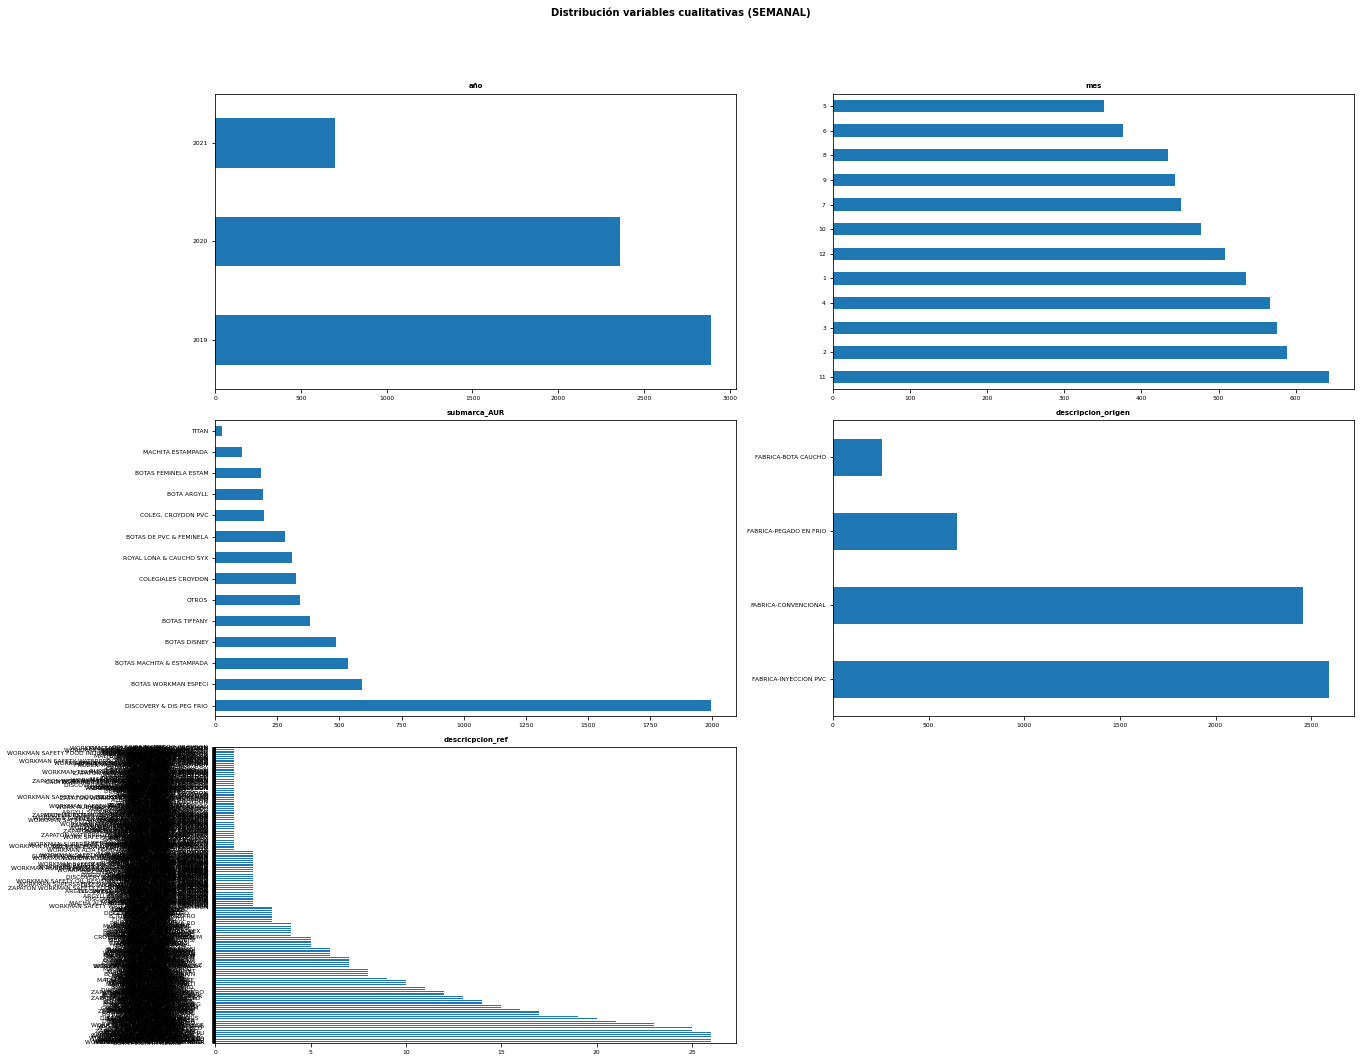

In [ ]:
# Gráfico relación entre el Venta pares y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(19, 15))
axes = axes.flat
columnas_object = filtred_mensual_fab.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    filtred_mensual_fab[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas (SEMANAL)',
             fontsize = 10, fontweight = "bold");

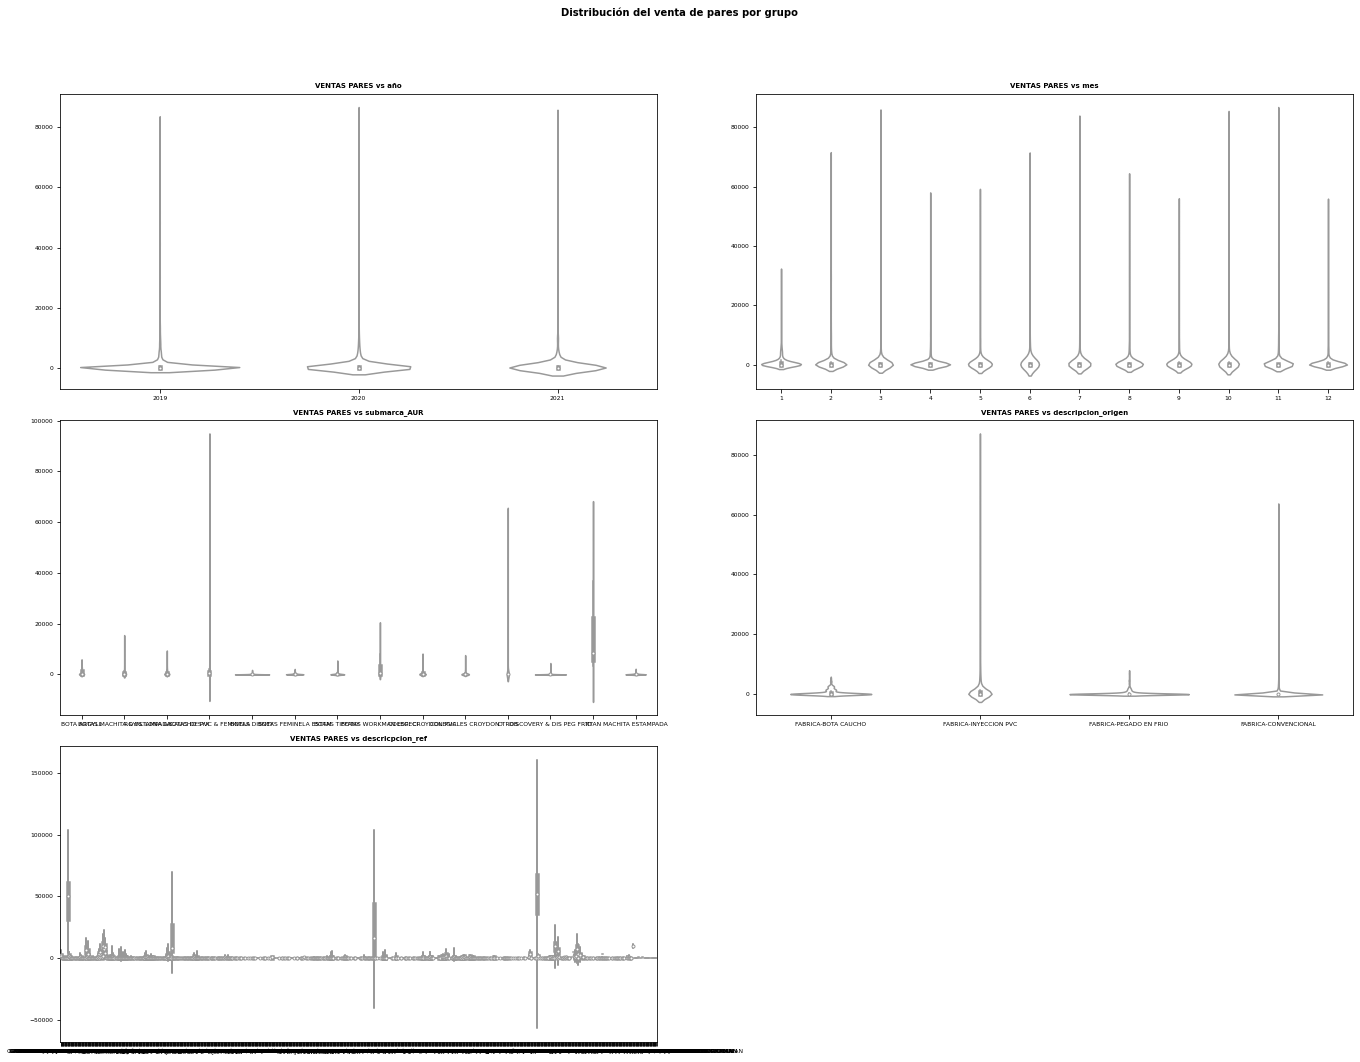

In [ ]:
# Gráfico relación entre el precio y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(19, 15))
axes = axes.flat
columnas_categoricas = filtred_mensual_fab.loc[:,['año', 'mes', 'submarca_AUR', 
                                                  'descripcion_origen', 'descricpcion_ref' 
                                                  ]]
columnas_object = columnas_categoricas.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'ventas_pares',
        data  = filtred_mensual_fab,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"VENTAS PARES vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del venta de pares por grupo', fontsize = 10, fontweight = "bold");

### Agrupacion SEMANAL

In [ ]:
print("Tipo de datos y frecuencias SEMANAL\n{}".format(filtred_semanal_fab.dtypes.value_counts()))

#<COMENATRIO>--- Las variables tipo objeto son textos y deben representarse con un numero
object_columns_semanal = filtred_semanal_fab.select_dtypes(include=['object'])
print("Columnas tipo Objeto SEMANAL: \n", object_columns_semanal.iloc[0])

# Variables cualitativas (tipo object)
# ==============================================================================
filtred_semanal_fab.select_dtypes(include=['object']).describe()

Tipo de datos y frecuencias SEMANAL
object            6
datetime64[ns]    1
int64             1
dtype: int64
Columnas tipo Objeto SEMANAL: 
 año                                               2019
semana                                               1
mes                                                  1
submarca_AUR                               BOTA ARGYLL
descripcion_origen                 FABRICA-BOTA CAUCHO
descricpcion_ref      ARGYLL NEGRO                    
Name: 0, dtype: object


año  semana  ...     descripcion_origen                  descricpcion_ref
count   15212   15212  ...                  15212                             15212
unique      3      53  ...                      4                              1023
top      2019       5  ...  FABRICA-INYECCION PVC  WORKMAN SAFETY WATERPROOF NEGR  
freq     7549     524  ...                   7703                               124

[4 rows x 6 columns]

Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada o bootstrapping, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. En estos casos, suele ser conveniente:

- Eliminar las observaciones del grupo minoritario si es una variable multiclase.
- Eliminar la variable si solo tiene dos niveles.
- Agrupar los niveles minoritarios en un único grupo.
- Asegurar que, en la creación de las particiones, todos los grupos estén representados en cada una de ellas.

In [ ]:
subAUR_rempl = {'DISCOVERY PEG. EN FR': 'DISCOVERY & DIS PEG FRIO',
                'DISCOVERY': 'DISCOVERY & DIS PEG FRIO',
                'DEPORTIVO': 'OTROS',
                'BOTAS FEMINELA': 'BOTAS DE PVC & FEMINELA',
                'BOTAS DE PVC': 'BOTAS DE PVC & FEMINELA',
                'ROYAL LONA': 'ROYAL LONA & CAUCHO SYX',
                'BOTAS DE CAUCHO SYX': 'ROYAL LONA & CAUCHO SYX',
                'BOTAS MACHITA': 'BOTAS MACHITA & ESTAMPADA',
                'BOTA MACHA ESTAMPADA': 'BOTAS MACHITA & ESTAMPADA',
                'LICITACIONES': 'OTROS',   
                'INSTITUCIONAL': 'OTROS',
                'LICITAC-VENTAS': 'OTROS', 
                'GOMOSO NACIONAL': 'OTROS'} 
filtred_semanal_fab['submarca_AUR'] = filtred_semanal_fab['submarca_AUR'].map(subAUR_rempl).fillna(filtred_semanal_fab['submarca_AUR'])


print('PRIMER ANALISIS DE SUPERPOSICION SUBMARca_AUR')
for name in ['submarca_AUR']:
  print("Valores unicos en la columna: {}\n".format(name))
  print(filtred_semanal_fab[name].value_counts(),'\n')
                          

PRIMER ANALISIS DE SUPERPOSICION SUBMARca_AUR
Valores unicos en la columna: submarca_AUR

DISCOVERY & DIS PEG FRIO     3901
BOTAS WORKMAN ESPECI         2070
BOTAS MACHITA & ESTAMPADA    1635
ROYAL LONA & CAUCHO SYX      1119
BOTAS DISNEY                 1059
BOTAS DE PVC & FEMINELA      1023
BOTAS TIFFANY                 986
COLEGIALES CROYDON            781
BOTA ARGYLL                   597
OTROS                         567
COLEG. CROYDON PVC            544
BOTAS FEMINELA ESTAM          507
MACHITA ESTAMPADA             295
TITAN                         128
Name: submarca_AUR, dtype: int64 



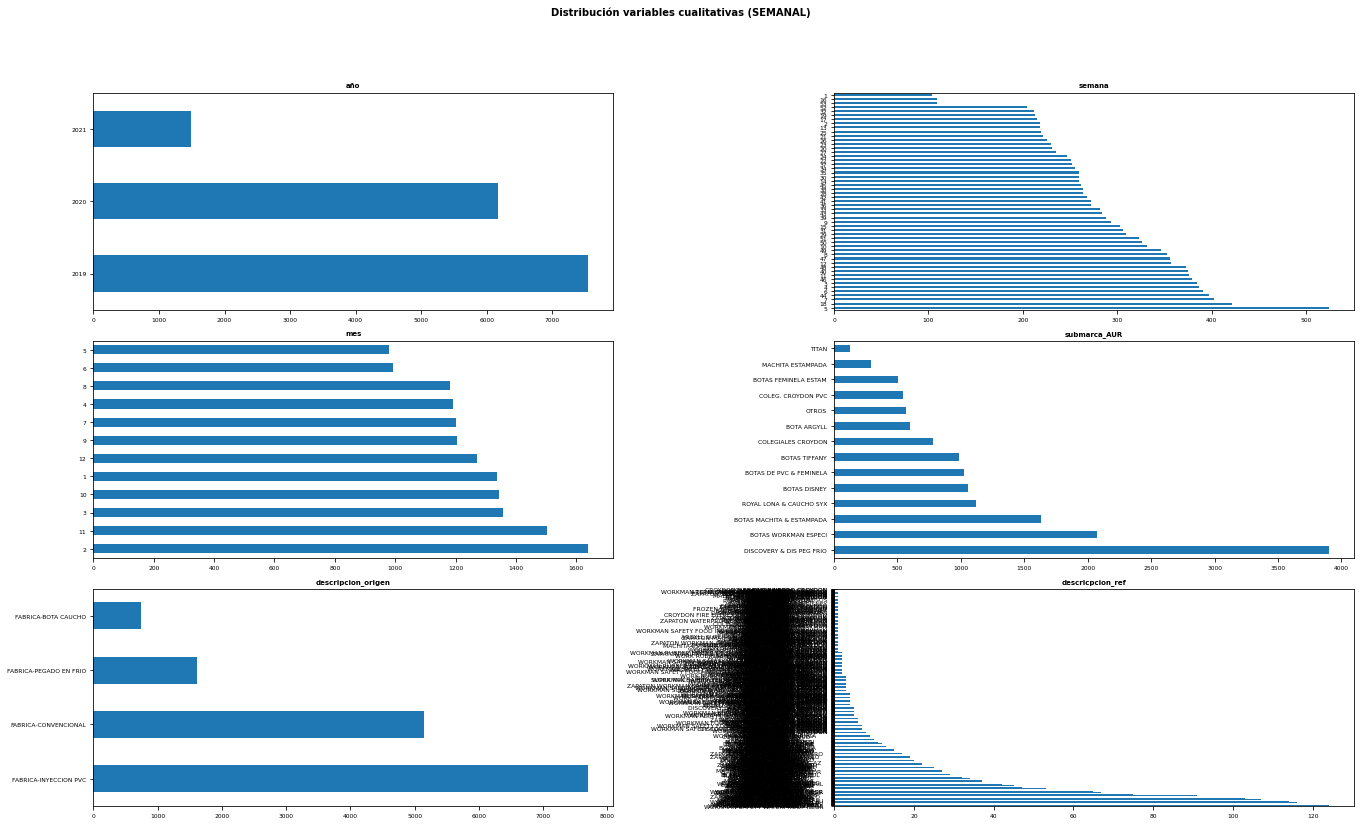

In [ ]:
# Gráfico relación entre el Venta pares y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(19, 15))
axes = axes.flat
columnas_object = filtred_semanal_fab.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    filtred_semanal_fab[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [6,7]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas (SEMANAL)',
             fontsize = 10, fontweight = "bold");

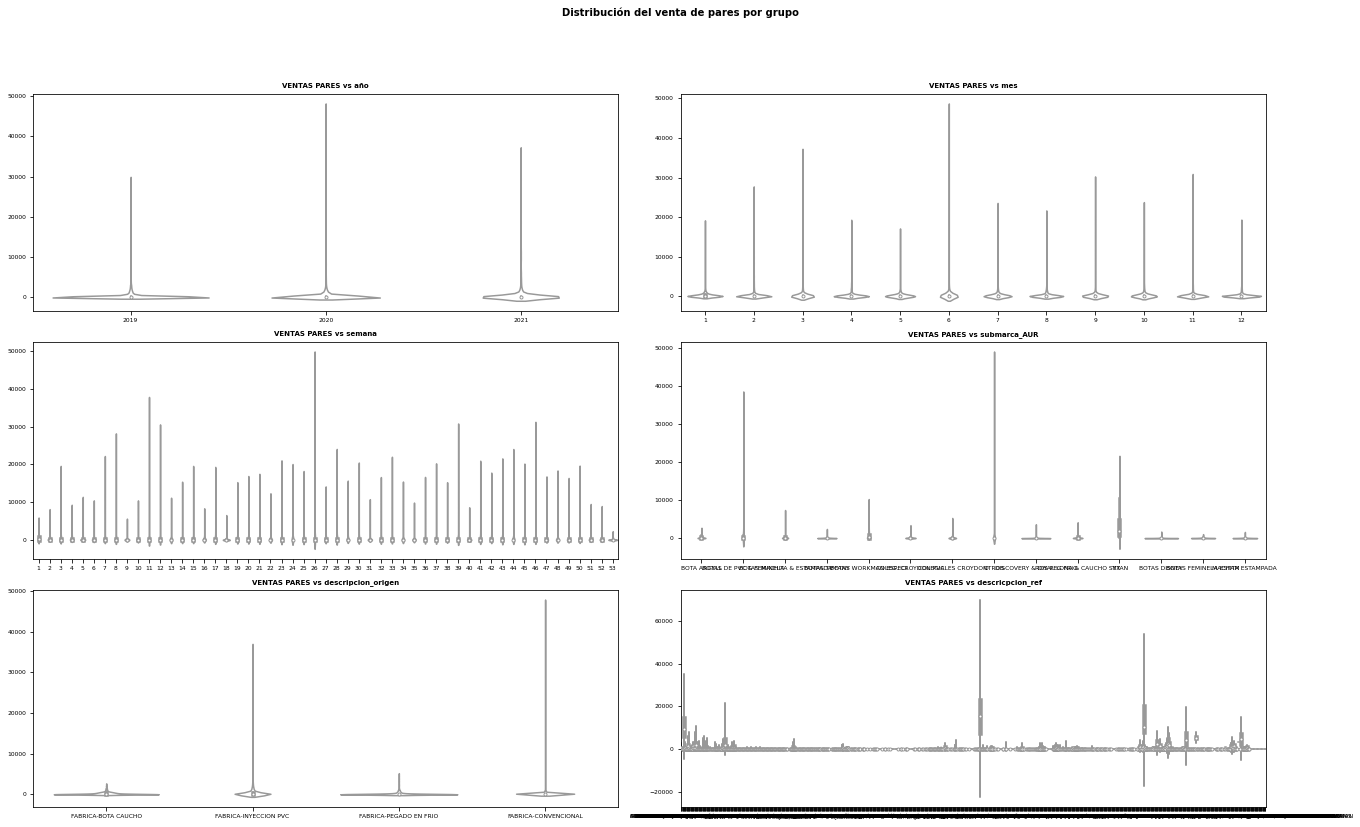

In [ ]:
# Gráfico relación entre el precio y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(19, 15))
axes = axes.flat
columnas_categoricas = filtred_semanal_fab.loc[:,['año', 'mes', 'semana', 
                                                  'submarca_AUR', 'descripcion_origen',  
                                                  'descricpcion_ref' ]]
columnas_object = columnas_categoricas.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'ventas_pares',
        data  = filtred_semanal_fab,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"VENTAS PARES vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [6, 7]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del venta de pares por grupo', fontsize = 10, fontweight = "bold");

### Agrupacion DIARIO

In [ ]:
print("Tipo de datos y frecuencias DIARIO\n{}".format(filtred_diario_fab.dtypes.value_counts()))

#<COMENATRIO>--- Las variables tipo objeto son textos y deben representarse con un numero
object_columns_diario = filtred_diario_fab.select_dtypes(include=['object'])
print("Columnas tipo Objeto DIARIO: \n", object_columns_diario.iloc[0])

# Variables cualitativas (tipo object)
# ==============================================================================
filtred_diario_fab.select_dtypes(include=['object']).describe()

Tipo de datos y frecuencias DIARIO
object            5
datetime64[ns]    1
int64             1
dtype: int64
Columnas tipo Objeto DIARIO: 
 año                                               2019
dia                                                  2
submarca_AUR                               BOTA ARGYLL
descripcion_origen                 FABRICA-BOTA CAUCHO
descricpcion_ref      ARGYLL NEGRO                    
Name: 0, dtype: object


año    dia  ...     descripcion_origen                  descricpcion_ref
count   35976  35976  ...                  35976                             35976
unique      3     31  ...                      4                              1024
top      2019     16  ...  FABRICA-INYECCION PVC  MACHA ALTA  NEGRO               
freq    17559   1444  ...                  20173                               616

[4 rows x 5 columns]

Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada o bootstrapping, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. En estos casos, suele ser conveniente:

- Eliminar las observaciones del grupo minoritario si es una variable multiclase.
- Eliminar la variable si solo tiene dos niveles.
- Agrupar los niveles minoritarios en un único grupo.
- Asegurar que, en la creación de las particiones, todos los grupos estén representados en cada una de ellas.

In [ ]:
subAUR_rempl = {'DISCOVERY PEG. EN FR': 'DISCOVERY & DIS PEG FRIO',
                'DISCOVERY': 'DISCOVERY & DIS PEG FRIO',
                'DEPORTIVO': 'OTROS',
                'BOTAS FEMINELA': 'BOTAS DE PVC & FEMINELA',
                'BOTAS DE PVC': 'BOTAS DE PVC & FEMINELA',
                'ROYAL LONA': 'ROYAL LONA & CAUCHO SYX',
                'BOTAS DE CAUCHO SYX': 'ROYAL LONA & CAUCHO SYX',
                'BOTAS MACHITA': 'BOTAS MACHITA & ESTAMPADA',
                'BOTA MACHA ESTAMPADA': 'BOTAS MACHITA & ESTAMPADA',
                'LICITACIONES': 'OTROS',   
                'INSTITUCIONAL': 'OTROS',
                'LICITAC-VENTAS': 'OTROS', 
                'GOMOSO NACIONAL': 'OTROS'} 
filtred_diario_fab['submarca_AUR'] = filtred_diario_fab['submarca_AUR'].map(subAUR_rempl).fillna(filtred_diario_fab['submarca_AUR'])


print('PRIMER ANALISIS DE SUPERPOSICION SUBMARca_AUR')
for name in ['submarca_AUR']:
  print("Valores unicos en la columna: {}\n".format(name))
  print(filtred_diario_fab[name].value_counts(),'\n')
                          

PRIMER ANALISIS DE SUPERPOSICION SUBMARca_AUR
Valores unicos en la columna: submarca_AUR

BOTAS WORKMAN ESPECI         6952
DISCOVERY & DIS PEG FRIO     6785
BOTAS MACHITA & ESTAMPADA    4281
ROYAL LONA & CAUCHO SYX      3310
BOTAS DE PVC & FEMINELA      2991
BOTAS TIFFANY                2018
BOTA ARGYLL                  1936
BOTAS DISNEY                 1774
COLEGIALES CROYDON           1702
COLEG. CROYDON PVC           1295
BOTAS FEMINELA ESTAM         1037
OTROS                         775
TITAN                         611
MACHITA ESTAMPADA             509
Name: submarca_AUR, dtype: int64 



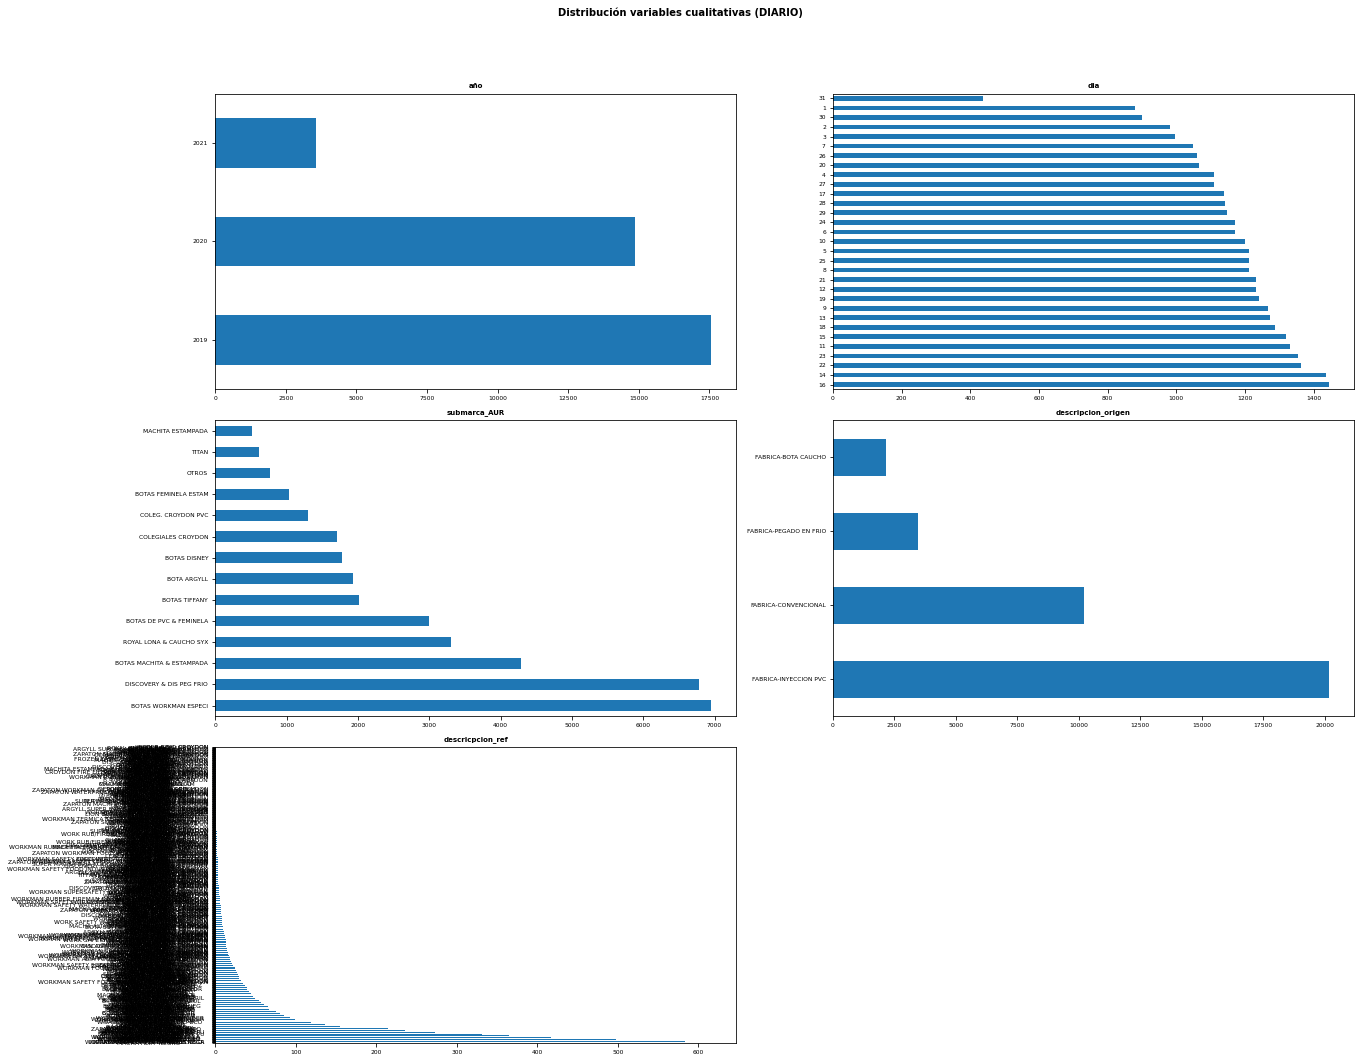

In [ ]:
# Gráfico relación entre el Venta pares y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(19, 15))
axes = axes.flat
columnas_object = filtred_diario_fab.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    filtred_diario_fab[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas (DIARIO)',
             fontsize = 10, fontweight = "bold");

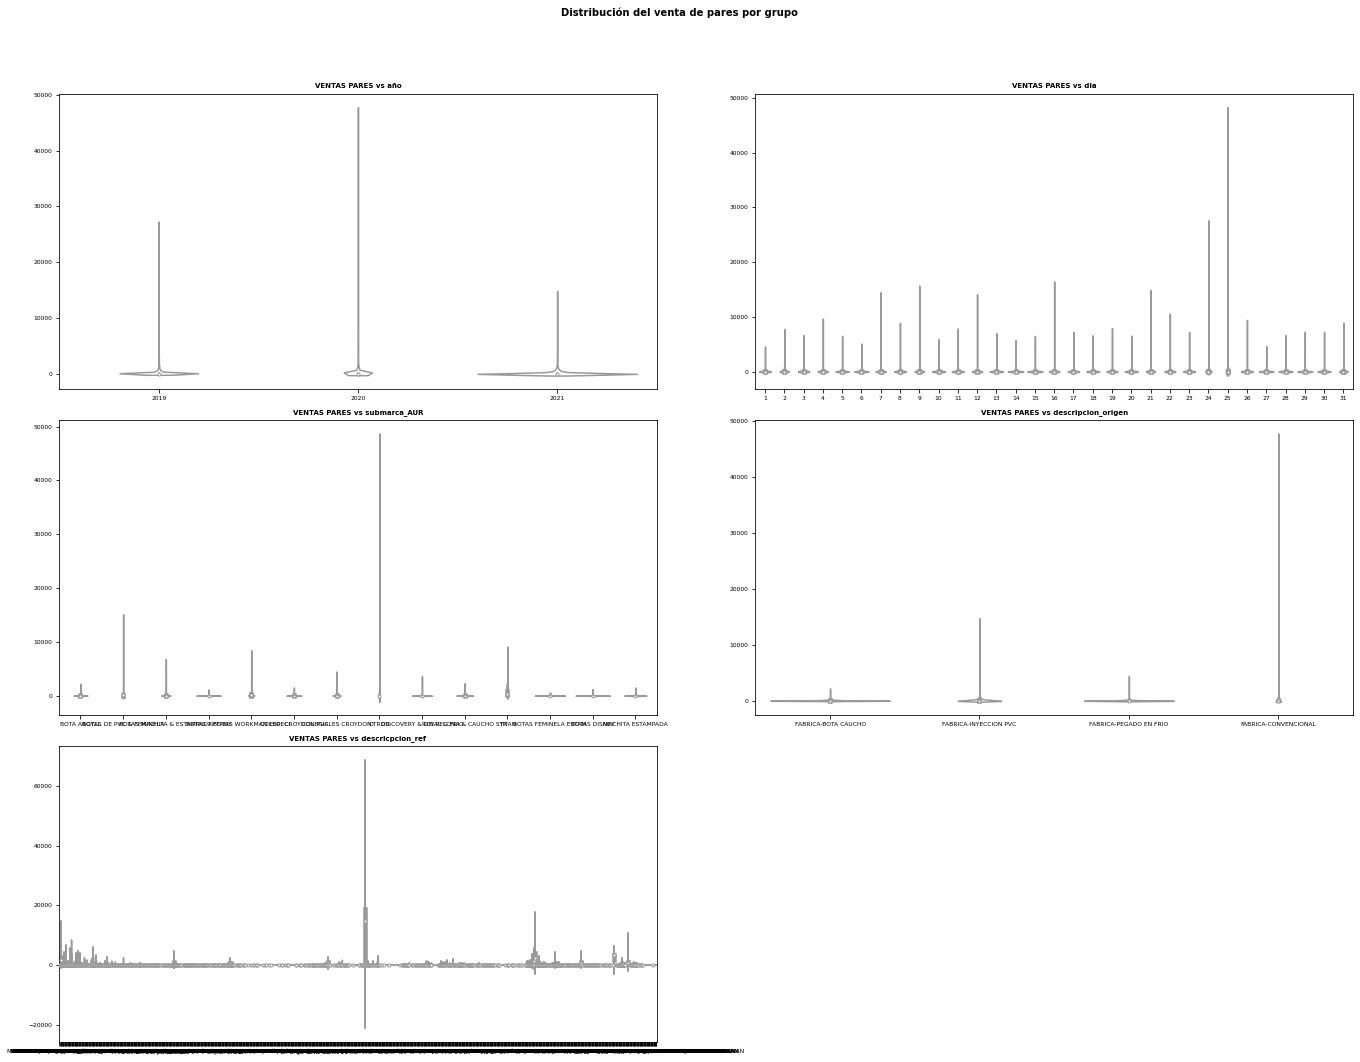

In [ ]:
# Gráfico relación entre el precio y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(19, 15))
axes = axes.flat
columnas_categoricas = filtred_diario_fab.loc[:,['año', 'dia', 
                                                 'submarca_AUR', 'descripcion_origen',  
                                                 'descricpcion_ref' ]]
columnas_object = columnas_categoricas.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'ventas_pares',
        data  = filtred_diario_fab,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"VENTAS PARES vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del venta de pares por grupo', fontsize = 10, fontweight = "bold");

# Fase de modelado y Evalucaion **


### Librerias y subida de datos limpios para evitar correr todo el codigo

In [ ]:
!pip install -U scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from datetime import datetime


from google.colab import drive
drive.mount('/content/drive')
"""
from google.colab import files
filtred_mensual_fab.to_csv('filtred_mensual_fab.csv') 
files.download('filtred_mensual_fab.csv')
filtred_semanal_fab.to_csv('filtred_semanal_fab.csv') 
files.download('filtred_semanal_fab.csv')
filtred_diario_fab.to_csv('filtred_diario_fab.csv') 
files.download('filtred_diario_fab.csv')
"""

filtred_mensual_fab = pd.read_csv('/content/drive/MyDrive/TESIS/Datos/DATOS LIMPIOS/filtred_mensual_fab.csv', index_col=0)
filtred_mensual_fab = pd.DataFrame(filtred_mensual_fab)
filtred_diario_fab = pd.read_csv('/content/drive/MyDrive/TESIS/Datos/DATOS LIMPIOS/filtred_diario_fab.csv', index_col=0)
filtred_diario_fab = pd.DataFrame(filtred_diario_fab)
filtred_semanal_fab = pd.read_csv('/content/drive/MyDrive/TESIS/Datos/DATOS LIMPIOS/filtred_semanal_fab.csv', index_col=0)
filtred_semanal_fab = pd.DataFrame(filtred_semanal_fab)


Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Funciones y metodos para el modelado

In [ ]:
def eliminarFrecuencia (dataFrame, frecuencia, columna):
  """ Funcion que elimina las filas de los registros con una frecuencia menor a la ingresada
  """
  dataFrame=dataFrame[dataFrame.groupby(columna)[columna].transform('count').ge(frecuencia)]
  return dataFrame

def rmsle(y_real, y_prediccion):
  """Logaritmo Raíz Cuadrada del Error Cuadrático Medio"""
  return np.sqrt(mean_squared_log_error(y_real, y_prediccion))

def rmse(y_real, y_prediccion):
  """ Raíz Cuadrada del Error Cuadrático Medio"""
  return mean_squared_error(y_real, y_prediccion, squared=False)

def mae(y_real, y_prediccion): 
  """ MAE"""
  return mean_absolute_error(y_real, y_prediccion)

def mse(y_real, y_prediccion): 
  """ MSE"""
  return mean_squared_error(y_real, y_prediccion)

def mape(y_real, y_prediccion): 
  """ MAPE"""
  return mean_absolute_percentage_error(y_real, y_prediccion)

def cambioTipo (dataFrame, columna, tipo):
  """Cambio tipo de dato por columna"""
  dataFrame[columna]= dataFrame[columna].astype(tipo)
  return dataFrame

def cambiarOneHot (dataFrame, columnas):
  """
  Cambia las variables categorias en representativas para regresion
  """
  for col in columnas:
    dummy = pd.get_dummies(dataFrame[col], prefix = col, drop_first = False)
    dataFrame = pd.concat([dataFrame, dummy], axis = 1)
  return dataFrame


def completarDataCeros (dataFrame, agrupacionCol, fecha_maxima, frecuencia):
  """Funcion que llena los datos faltantes desde el primer registro (de cada 
  'agrupacion')hasta el ultmo con ceros
  dataFrame: conjunto de datos
  agrupacionCol: caracteristica por la cual se quiere agrupar. Entre comillas
  fechaamaxima: fecha mas reciente del conjunto general de datos. formato data
  frecuencia: frecuencia a la cual se quiere completar el dataframe. Entre 
  comillas. "D", "M", "W"...
   """
  diario_groupbyThing = dataFrame.groupby([agrupacionCol, 'fecha'])['ventas_pares'].sum()
  diario_groupbyThing = diario_groupbyThing.reset_index()
  reference_list = diario_groupbyThing[agrupacionCol].unique().tolist()
  dataframeRelleno = pd.DataFrame()

  for i in reference_list:
    dataframe = diario_groupbyThing[diario_groupbyThing[agrupacionCol]==i]
    fecha_minima = datetime.fromisoformat(str(dataframe["fecha"].min()))
    dataframe = dataframe.set_index('fecha')
    dataframe.index = pd.DatetimeIndex(dataframe.index)
    ix = pd.date_range(name="fecha", start=fecha_minima, end=fecha_maxima, freq=frecuencia)
    dataframe = dataframe.reindex(ix, fill_value=0)
    dataframe[agrupacionCol] = dataframe[agrupacionCol].replace({0:i})
    dataframeRelleno = pd.concat([dataframeRelleno,dataframe])

  dataframeRelleno = dataframeRelleno.reset_index()
  return dataframeRelleno


def modelarDiario (df, agrupacionCol, metricaEval):

  """
      dataframe: con agrupacion Diararia sin agrupar
      agrupacionCol: nombre de la columna por la cual se hara la agrupacion <entre comillas>
      metricaEval: Con cual de las metricas definidas anteriormente se evalua 
  """
  things = []
  list_pronosticoRF = []
  list_evaluacionRF = []
  list_pronosticoBF = []
  list_evaluacionBF = []
  list_pronosticoAF = []
  list_evaluacionAF = []
  list_pronosticoLR = []
  list_evaluacionLR = []
  list_pronosticoLogR = []
  list_evaluacionLogR = []


  for item, informacion in df.groupby(agrupacionCol):
    things.append(item)

    datos_salida= informacion.loc[:,['ventas_pares']]
    datos_entrada = pd.DataFrame()

    le_descripcion_dia = LabelEncoder()
    le_descripcion_mes = LabelEncoder()
    le_descripcion_year = LabelEncoder()

    datos_entrada["dia_codigo"] = le_descripcion_dia.fit_transform(informacion["num_dia"])
    datos_entrada["mes_codigo"] = le_descripcion_mes.fit_transform(informacion["num_mes"])
    datos_entrada["año_codigo"] = le_descripcion_year.fit_transform(informacion["num_año"])

    X = datos_entrada
    y = datos_salida
    X_trainF, X_validationF, y_trainF, y_validationF = train_test_split(X, y, train_size=0.75, random_state=42)

    pronosticoRF , evaluacionRF = modelarRandomForest(X_trainF, X_validationF, y_trainF, y_validationF, metricaEval)
    list_pronosticoRF.append(pronosticoRF)
    list_evaluacionRF.append(evaluacionRF)

    pronosticoBF , evaluacionBF = modelarBaggingRegressor(X_trainF, X_validationF, y_trainF, y_validationF, metricaEval)
    list_pronosticoBF.append(pronosticoBF)
    list_evaluacionBF.append(evaluacionBF)

    pronosticoAF , evaluacionAF = modelarAdaBoostRegressor(X_trainF, X_validationF, y_trainF, y_validationF, metricaEval)
    list_pronosticoAF.append(pronosticoAF)
    list_evaluacionAF.append(evaluacionAF)


    columnas_categoricas = ["num_dia", "num_mes", "num_año"]
    diario_OneHot = cambiarOneHot(informacion, columnas_categoricas)
    diario_OneHot = diario_OneHot.drop(columnas_categoricas, axis=1)

    X = diario_OneHot.drop(['ventas_pares', 'fecha', agrupacionCol], axis=1)
    y = diario_OneHot.loc[:,['ventas_pares']]
    X_trainOH, X_validationOH, y_trainOH, y_validationOH = train_test_split(X, y, train_size=0.75, random_state=42)

    pronosticoL , evaluacionL = modelarLinearReg(X_trainOH, X_validationOH, y_trainOH, y_validationOH, metricaEval)
    list_pronosticoLR.append(pronosticoL)
    list_evaluacionLR.append(evaluacionL)

    pronosticoLog , evaluacionLog = modelarLogisticReg(X_trainOH, X_validationOH, y_trainOH, y_validationOH, metricaEval)
    list_pronosticoLogR.append(pronosticoLog)
    list_evaluacionLogR.append(evaluacionLog)

    
  return things, list_pronosticoRF, list_evaluacionRF, list_pronosticoBF, list_evaluacionBF, list_pronosticoAF, list_evaluacionAF, list_pronosticoLR, list_evaluacionLR, list_pronosticoLogR, list_evaluacionLogR



def modelarSemanal(dataFrame, agrupacionCol, metricaEval):
  """
      dataframe: con agrupacion Diararia sin agrupar
      agrupacionCol: nombre de la columna por la cual se hara la agrupacion <entre comillas>
      metricaEval: Con cual de las metricas definidas anteriormente se evalua 
  """
  things = []
  list_pronosticoRF = []
  list_evaluacionRF = []
  list_pronosticoBF = []
  list_evaluacionBF = []
  list_pronosticoAF = []
  list_evaluacionAF = []
  list_pronosticoLR = []
  list_evaluacionLR = []
  list_pronosticoLogR = []
  list_evaluacionLogR = []


  for item, informacion in df.groupby(agrupacionCol):
    things.append(item)

    datos_salida= informacion.loc[:,['ventas_pares']]
    datos_entrada = pd.DataFrame()

    le_descripcion_dia = LabelEncoder()
    le_descripcion_mes = LabelEncoder()
    le_descripcion_year = LabelEncoder()

    datos_entrada["week_codigo"] = le_descripcion_dia.fit_transform(informacion["num_week"])
    datos_entrada["mes_codigo"] = le_descripcion_mes.fit_transform(informacion["num_mes"])
    datos_entrada["año_codigo"] = le_descripcion_year.fit_transform(informacion["num_año"])

    X = datos_entrada
    y = datos_salida
    X_trainF, X_validationF, y_trainF, y_validationF = train_test_split(X, y, train_size=0.75, random_state=42)

    pronosticoRF , evaluacionRF = modelarRandomForest(X_trainF, X_validationF, y_trainF, y_validationF, metricaEval)
    list_pronosticoRF.append(pronosticoRF)
    list_evaluacionRF.append(evaluacionRF)

    pronosticoBF , evaluacionBF = modelarBaggingRegressor(X_trainF, X_validationF, y_trainF, y_validationF, metricaEval)
    list_pronosticoBF.append(pronosticoBF)
    list_evaluacionBF.append(evaluacionBF)

    pronosticoAF , evaluacionAF = modelarAdaBoostRegressor(X_trainF, X_validationF, y_trainF, y_validationF, metricaEval)
    list_pronosticoAF.append(pronosticoAF)
    list_evaluacionAF.append(evaluacionAF)


    columnas_categoricas = ["num_week", "num_mes", "num_año"]
    diario_OneHot = cambiarOneHot(informacion, columnas_categoricas)
    diario_OneHot = diario_OneHot.drop(columnas_categoricas, axis=1)

    X = diario_OneHot.drop(['ventas_pares', 'fecha', agrupacionCol], axis=1)
    y = diario_OneHot.loc[:,['ventas_pares']]
    X_trainOH, X_validationOH, y_trainOH, y_validationOH = train_test_split(X, y, train_size=0.75, random_state=42)

    pronosticoL , evaluacionL = modelarLinearReg(X_trainOH, X_validationOH, y_trainOH, y_validationOH, metricaEval)
    list_pronosticoLR.append(pronosticoL)
    list_evaluacionLR.append(evaluacionL)

    pronosticoLog , evaluacionLog = modelarLogisticReg(X_trainOH, X_validationOH, y_trainOH, y_validationOH, metricaEval)
    list_pronosticoLogR.append(pronosticoLog)
    list_evaluacionLogR.append(evaluacionLog)

    
  return things, list_pronosticoRF, list_evaluacionRF, list_pronosticoBF, list_evaluacionBF, list_pronosticoAF, list_evaluacionAF, list_pronosticoLR, list_evaluacionLR, list_pronosticoLogR, list_evaluacionLogR



def modelarMensual(dataFrame, agrupacionCol, metricaEval):
  """
      dataframe: con agrupacion Diararia sin agrupar
      agrupacionCol: nombre de la columna por la cual se hara la agrupacion <entre comillas>
      metricaEval: Con cual de las metricas definidas anteriormente se evalua 
  """
  things = []
  list_pronosticoRF = []
  list_evaluacionRF = []
  list_pronosticoBF = []
  list_evaluacionBF = []
  list_pronosticoAF = []
  list_evaluacionAF = []
  list_pronosticoLR = []
  list_evaluacionLR = []
  list_pronosticoLogR = []
  list_evaluacionLogR = []


  for item, informacion in df.groupby(agrupacionCol):
    things.append(item)

    datos_salida= informacion.loc[:,['ventas_pares']]
    datos_entrada = pd.DataFrame()

    le_descripcion_dia = LabelEncoder()
    le_descripcion_mes = LabelEncoder()
    le_descripcion_year = LabelEncoder()

    datos_entrada["mes_codigo"] = le_descripcion_mes.fit_transform(informacion["num_mes"])
    datos_entrada["año_codigo"] = le_descripcion_year.fit_transform(informacion["num_año"])

    X = datos_entrada
    y = datos_salida
    X_trainF, X_validationF, y_trainF, y_validationF = train_test_split(X, y, train_size=0.75, random_state=42)

    pronosticoRF , evaluacionRF = modelarRandomForest(X_trainF, X_validationF, y_trainF, y_validationF, metricaEval)
    list_pronosticoRF.append(pronosticoRF)
    list_evaluacionRF.append(evaluacionRF)

    pronosticoBF , evaluacionBF = modelarBaggingRegressor(X_trainF, X_validationF, y_trainF, y_validationF, metricaEval)
    list_pronosticoBF.append(pronosticoBF)
    list_evaluacionBF.append(evaluacionBF)

    pronosticoAF , evaluacionAF = modelarAdaBoostRegressor(X_trainF, X_validationF, y_trainF, y_validationF, metricaEval)
    list_pronosticoAF.append(pronosticoAF)
    list_evaluacionAF.append(evaluacionAF)


    columnas_categoricas = [ "num_mes", "num_año"]
    diario_OneHot = cambiarOneHot(informacion, columnas_categoricas)
    diario_OneHot = diario_OneHot.drop(columnas_categoricas, axis=1)

    X = diario_OneHot.drop(['ventas_pares', 'fecha', agrupacionCol], axis=1)
    y = diario_OneHot.loc[:,['ventas_pares']]
    X_trainOH, X_validationOH, y_trainOH, y_validationOH = train_test_split(X, y, train_size=0.75, random_state=42)

    pronosticoL , evaluacionL = modelarLinearReg(X_trainOH, X_validationOH, y_trainOH, y_validationOH, metricaEval)
    list_pronosticoLR.append(pronosticoL)
    list_evaluacionLR.append(evaluacionL)

    pronosticoLog , evaluacionLog = modelarLogisticReg(X_trainOH, X_validationOH, y_trainOH, y_validationOH, metricaEval)
    list_pronosticoLogR.append(pronosticoLog)
    list_evaluacionLogR.append(evaluacionLog)

    
  return things, list_pronosticoRF, list_evaluacionRF, list_pronosticoBF, list_evaluacionBF, list_pronosticoAF, list_evaluacionAF, list_pronosticoLR, list_evaluacionLR, list_pronosticoLogR, list_evaluacionLogR

def prepararDiario (dataFrame ):
  dataFrame["num_dia"] = dataFrame['fecha'].dt.day.astype('object')
  dataFrame["num_mes"] = dataFrame['fecha'].dt.month.astype('object')
  dataFrame["num_año"] = dataFrame['fecha'].dt.year.astype('object')
  return dataFrame

def prepararSemana (dataFrame ):
  dataFrame["num_week"] = dataFrame['fecha'].dt.week.astype('object')
  dataFrame["num_mes"] = dataFrame['fecha'].dt.month.astype('object')
  dataFrame["num_año"] = dataFrame['fecha'].dt.year.astype('object')
  return dataFrame

def prepararMensual (dataFrame ):
  dataFrame["num_mes"] = dataFrame['fecha'].dt.month.astype('object')
  dataFrame["num_año"] = dataFrame['fecha'].dt.year.astype('object')
  return dataFrame

def modelarRandomForest(X_train, X_validation, y_train, y_validation, metricaEval):
  modelo = RandomForestRegressor()
  modelo.fit(X_train, y_train)
  y_prediccion = modelo.predict(X_validation)
  error = metricaEval(y_validation, y_prediccion)
  return y_prediccion , error

def modelarLinearReg(X_train, X_validation, y_train, y_validation, metricaEval):
  modelo = LinearRegression(positive=True)
  modelo.fit(X_train, y_train)
  y_prediccion = modelo.predict(X_validation)
  error = metricaEval(y_validation, y_prediccion)
  return y_prediccion , error

def modelarLogisticReg(X_train, X_validation, y_train, y_validation, metricaEval):
  modelo =  LogisticRegression()
  modelo.fit(X_train, y_train)
  y_prediccion = modelo.predict(X_validation)
  error = metricaEval(y_validation, y_prediccion)
  return y_prediccion , error

def modelarBaggingRegressor(X_train, X_validation, y_train, y_validation, metricaEval):
  modelo = BaggingRegressor()
  modelo.fit(X_train, y_train)
  y_prediccion = modelo.predict(X_validation)
  error = metricaEval(y_validation, y_prediccion)
  return y_prediccion , error

def modelarAdaBoostRegressor(X_train, X_validation, y_train, y_validation, metricaEval):
  modelo = AdaBoostRegressor()
  modelo.fit(X_train, y_train)
  y_prediccion = modelo.predict(X_validation)
  error = metricaEval(y_validation, y_prediccion)
  return y_prediccion , error




 ## Eliminacionde datos con frecuencia minima

In [ ]:
columna='descricpcion_ref'

filtred_mensual_fab = eliminarFrecuencia(filtred_mensual_fab, 6, columna) # el 75% de los datos (28 meses)
filtred_semanal_fab = eliminarFrecuencia(filtred_semanal_fab, 6, columna) # el 75% de los datos (112 semanas)
filtred_diario_fab = eliminarFrecuencia(filtred_diario_fab, 6, columna) # el 75% de los datos (840 dias)

In [ ]:
cambioTipo(filtred_mensual_fab,['año', 'mes'], object )
cambioTipo(filtred_diario_fab,['año', 'dia'], object )
cambioTipo(filtred_semanal_fab,['año', 'mes', 'semana'], object )
filtred_diario_fab['fecha'] = pd.to_datetime(filtred_diario_fab.fecha)
filtred_semanal_fab['fecha_semana'] = pd.to_datetime(filtred_semanal_fab.fecha_semana)
filtred_mensual_fab['fecha_mes'] = pd.to_datetime(filtred_mensual_fab.fecha_mes)
filtred_mensual_fab= filtred_mensual_fab[(filtred_mensual_fab['fecha_mes']<"2021-04-30")]

##Modelado de la Agrupacion DIARIA
Se realizo con 'RandomForestRegressor()', 'LinearRegression()', 
'LogisticRegression()'

In [ ]:
dataFrame = filtred_diario_fab
fecha_maxima = datetime.fromisoformat(str(filtred_diario_fab['fecha'].max()))
frecuencia = "D"
metricaEval = rmse

In [ ]:
filtred_diario_fab.head(5)

año      fecha  ...                  descricpcion_ref ventas_pares
0  2019 2019-01-02  ...  ARGYLL NEGRO                                9
1  2019 2019-01-02  ...  ARGYLL SAFETY NEGRO                         7
2  2019 2019-01-02  ...  ARGYLL SAFETY PAZ DEL RIO                  13
3  2019 2019-01-02  ...  MACHA ALTA  NEGRO                        3754
4  2019 2019-01-02  ...  MACHA BAJA NEGRO                           37

[5 rows x 7 columns]

In [ ]:
dataFrame.head(5)

año      fecha  ...                  descricpcion_ref ventas_pares
0  2019 2019-01-02  ...  ARGYLL NEGRO                                9
1  2019 2019-01-02  ...  ARGYLL SAFETY NEGRO                         7
2  2019 2019-01-02  ...  ARGYLL SAFETY PAZ DEL RIO                  13
3  2019 2019-01-02  ...  MACHA ALTA  NEGRO                        3754
4  2019 2019-01-02  ...  MACHA BAJA NEGRO                           37

[5 rows x 7 columns]

### DECRIPCION DE REFERENCIA

In [ ]:
agrupacionCol = "descricpcion_ref"

dfDiarioCeros = completarDataCeros(dataFrame, agrupacionCol, fecha_maxima, frecuencia)
dfDiariocerosFeatures = prepararDiario(dfDiarioCeros)

In [ ]:
dfDiarioCeros.head(5)

fecha                  descricpcion_ref  ...  num_mes num_año
0 2019-01-19  ADHAN GRIS                        ...        1    2019
1 2019-01-20  ADHAN GRIS                        ...        1    2019
2 2019-01-21  ADHAN GRIS                        ...        1    2019
3 2019-01-22  ADHAN GRIS                        ...        1    2019
4 2019-01-23  ADHAN GRIS                        ...        1    2019

[5 rows x 6 columns]

In [ ]:
dfDiariocerosFeatures.head(5)

fecha                  descricpcion_ref  ...  num_mes num_año
0 2019-01-19  ADHAN GRIS                        ...        1    2019
1 2019-01-20  ADHAN GRIS                        ...        1    2019
2 2019-01-21  ADHAN GRIS                        ...        1    2019
3 2019-01-22  ADHAN GRIS                        ...        1    2019
4 2019-01-23  ADHAN GRIS                        ...        1    2019

[5 rows x 6 columns]

In [ ]:
datos_salida= dfDiariocerosFeatures.loc[:,['ventas_pares']]
datos_entrada = pd.DataFrame()

le_descripcion_ref = LabelEncoder()
le_descripcion_dia = LabelEncoder()
le_descripcion_mes = LabelEncoder()
le_descripcion_year = LabelEncoder()

datos_entrada["agr_codigo"] = le_descripcion_ref.fit_transform(dfDiariocerosFeatures[agrupacionCol])
datos_entrada["dia_codigo"] = le_descripcion_dia.fit_transform(dfDiariocerosFeatures["num_dia"])
datos_entrada["mes_codigo"] = le_descripcion_mes.fit_transform(dfDiariocerosFeatures["num_mes"])
datos_entrada["año_codigo"] = le_descripcion_year.fit_transform(dfDiariocerosFeatures["num_año"])

X = datos_entrada
y = datos_salida
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)
metricaEval = rmse

pronostico , evaluacion = modelarRandomForest(X_train, X_validation, y_train, y_validation, metricaEval)
print(evaluacion)


156.74591221569833


In [ ]:
df = dfDiariocerosFeatures 
resultadoRef_dia = modelarDiario(df, agrupacionCol, metricaEval)

In [ ]:
print("media error Randomforest \n", np.mean(resultadoRef_dia[2]))
print("media error BaggingRegresor \n", np.mean(resultadoRef_dia[4]))
print("media error AdaBoostRegressor \n", np.mean(resultadoRef_dia[6]))
print("media error Linear \n", np.mean(resultadoRef_dia[8]))
print("media error Logistica \n", np.mean(resultadoRef_dia[10]))

media error Randomforest 
 64.71001446210408
media error BaggingRegresor 
 66.83745184849779
media error AdaBoostRegressor 
 75.46817871047118
media error Linear 
 161464235487.0934
media error Logistica 
 66.83244355476496


### DECRIPCION DE ORIGEN

In [ ]:
agrupacionCol = "descripcion_origen"

dfDiarioCerosOrigen = completarDataCeros(dataFrame, agrupacionCol, fecha_maxima, frecuencia)
dfDiariocerosFeatOrigen = prepararDiario(dfDiarioCerosOrigen)

In [ ]:
df = dfDiariocerosFeatOrigen
datos_salida= df.loc[:,['ventas_pares']]
datos_entrada = pd.DataFrame()

le_descripcion_ref = LabelEncoder()
le_descripcion_dia = LabelEncoder()
le_descripcion_mes = LabelEncoder()
le_descripcion_year = LabelEncoder()

datos_entrada["agr_codigo"] = le_descripcion_ref.fit_transform(df[agrupacionCol])
datos_entrada["dia_codigo"] = le_descripcion_dia.fit_transform(df["num_dia"])
datos_entrada["mes_codigo"] = le_descripcion_mes.fit_transform(df["num_mes"])
datos_entrada["año_codigo"] = le_descripcion_year.fit_transform(df["num_año"])

X = datos_entrada
y = datos_salida
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)
metricaEval = rmse

pronostico , evaluacion = modelarRandomForest(X_train, X_validation, y_train, y_validation, metricaEval)
print(evaluacion)


2447.5820635395553


In [ ]:
resultadoRef_dia = modelarDiario(df, agrupacionCol, metricaEval)

In [ ]:
print("media error Randomforest \n", np.mean(resultadoRef_dia[2]))
print("media error BaggingRegresor \n", np.mean(resultadoRef_dia[4]))
print("media error AdaBoostRegressor \n", np.mean(resultadoRef_dia[6]))
print("media error Linear \n", np.mean(resultadoRef_dia[8]))
print("media error Logistica \n", np.mean(resultadoRef_dia[10]))

media error Randomforest 
 2071.658216120924
media error BaggingRegresor 
 1969.1448604815744
media error AdaBoostRegressor 
 2377.977360334438
media error Linear 
 1928.1849294733618
media error Logistica 
 2521.0352529191778


### DECRIPCION DE SUBMARCA AUR

In [ ]:
agrupacionCol = "submarca_AUR"

dfDiarioCerosOrigen = completarDataCeros(dataFrame, agrupacionCol, fecha_maxima, frecuencia)
dfDiariocerosFeatOrigen = prepararDiario(dfDiarioCerosOrigen)

In [ ]:
df = dfDiariocerosFeatOrigen
datos_salida= df.loc[:,['ventas_pares']]
datos_entrada = pd.DataFrame()

le_descripcion_ref = LabelEncoder()
le_descripcion_dia = LabelEncoder()
le_descripcion_mes = LabelEncoder()
le_descripcion_year = LabelEncoder()

datos_entrada["agr_codigo"] = le_descripcion_ref.fit_transform(df[agrupacionCol])
datos_entrada["dia_codigo"] = le_descripcion_dia.fit_transform(df["num_dia"])
datos_entrada["mes_codigo"] = le_descripcion_mes.fit_transform(df["num_mes"])
datos_entrada["año_codigo"] = le_descripcion_year.fit_transform(df["num_año"])

X = datos_entrada
y = datos_salida
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)
metricaEval = rmse

pronostico , evaluacion = modelarRandomForest(X_train, X_validation, y_train, y_validation, metricaEval)
print(evaluacion)


897.6007500020229


In [ ]:
resultadoRef_dia = modelarDiario(df, agrupacionCol, metricaEval)

In [ ]:
print("media error Randomforest \n", np.mean(resultadoRef_dia[2]))
print("media error BaggingRegresor \n", np.mean(resultadoRef_dia[4]))
print("media error AdaBoostRegressor \n", np.mean(resultadoRef_dia[6]))
print("media error Linear \n", np.mean(resultadoRef_dia[8]))
print("media error Logistica \n", np.mean(resultadoRef_dia[10]))

media error Randomforest 
 788.9197100815815
media error BaggingRegresor 
 829.138068704213
media error AdaBoostRegressor 
 930.8268095103061
media error Linear 
 729.734457975848
media error Logistica 
 867.9011732962015


##Modelado de la Agrupacion SEMANAL
Se realizo con 'RandomForestRegressor()', 'LinearRegression()', 
'LogisticRegression()'

In [ ]:
dataFrame = filtred_semanal_fab
dataFrame.rename(columns={'fecha_semana': 'fecha'}, inplace=True)
fecha_maxima = datetime.fromisoformat(str(dataFrame['fecha'].max()))
frecuencia = "W"
metricaEval = rmse

In [ ]:
dataFrame.head(5)

fecha   año  ...                  descricpcion_ref ventas_pares
0 2019-01-06  2019  ...  ARGYLL NEGRO                                9
1 2019-01-06  2019  ...  ARGYLL SAFETY NEGRO                         6
2 2019-01-06  2019  ...  ARGYLL SAFETY PAZ DEL RIO                  13
3 2019-01-06  2019  ...  ARGYLL SUPER SAFETY NEGRO                   4
4 2019-01-06  2019  ...  CROYDON FIRE FILTREX MEDIUM                10

[5 rows x 8 columns]

### DECRIPCION DE REFERENCIA

In [ ]:
agrupacionCol = "descricpcion_ref"

dfSemanalCeros = completarDataCeros(dataFrame, agrupacionCol, fecha_maxima, frecuencia)
dfSemanalFeatures = prepararSemana(dfSemanalCeros)

In [ ]:
dfSemanalFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38050 entries, 0 to 38049
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             38050 non-null  datetime64[ns]
 1   descricpcion_ref  38050 non-null  object        
 2   ventas_pares      38050 non-null  int64         
 3   num_week          38050 non-null  object        
 4   num_mes           38050 non-null  object        
 5   num_año           38050 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
datos_salida = dfSemanalFeatures.loc[:,['ventas_pares']]
datos_entrada = pd.DataFrame()

le_descripcion_ref = LabelEncoder()
le_descripcion_semana = LabelEncoder()
le_descripcion_mes = LabelEncoder()
le_descripcion_year = LabelEncoder()

datos_entrada["agr_codigo"] = le_descripcion_ref.fit_transform(dfSemanalFeatures[agrupacionCol])
datos_entrada["week_codigo"] = le_descripcion_semana.fit_transform(dfSemanalFeatures["num_week"])
datos_entrada["mes_codigo"] = le_descripcion_mes.fit_transform(dfSemanalFeatures["num_mes"])
datos_entrada["año_codigo"] = le_descripcion_year.fit_transform(dfSemanalFeatures["num_año"])

X = datos_entrada
y = datos_salida
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)
metricaEval = rmse

pronostico , evaluacion = modelarRandomForest(X_train, X_validation, y_train, y_validation, metricaEval)
print(evaluacion)


590.6694597693673


In [ ]:
dfSemanalFeatures

fecha                  descricpcion_ref  ...  num_mes num_año
0     2019-01-20  ADHAN GRIS                        ...        1    2019
1     2019-01-27  ADHAN GRIS                        ...        1    2019
2     2019-02-03  ADHAN GRIS                        ...        2    2019
3     2019-02-10  ADHAN GRIS                        ...        2    2019
4     2019-02-17  ADHAN GRIS                        ...        2    2019
...          ...                               ...  ...      ...     ...
38045 2021-03-28  ZIGOR ROJO                        ...        3    2021
38046 2021-04-04  ZIGOR ROJO                        ...        4    2021
38047 2021-04-11  ZIGOR ROJO                        ...        4    2021
38048 2021-04-18  ZIGOR ROJO                        ...        4    2021
38049 2021-04-25  ZIGOR ROJO                        ...        4    2021

[38050 rows x 6 columns]

In [ ]:
df = dfSemanalFeatures
resultadoRef_week = modelarSemanal(df, agrupacionCol, metricaEval)

In [ ]:
print("media error Randomforest \n", np.mean(resultadoRef_week[2]))
print("media error BaggingRegresor \n", np.mean(resultadoRef_week[4]))
print("media error AdaBoostRegressor \n", np.mean(resultadoRef_week[6]))
print("media error Linear \n", np.mean(resultadoRef_week[8]))
print("media error Logistica \n", np.mean(resultadoRef_week[10]))

media error Randomforest 
 179.11150837641048
media error BaggingRegresor 
 182.25885835389863
media error AdaBoostRegressor 
 209.86046052747372
media error Linear 
 23841638659468.32
media error Logistica 
 214.40666099341743


### DECRIPCION DE ORIGEN

In [ ]:
agrupacionCol = "descripcion_origen"

dfSemanaCerosOrigen = completarDataCeros(dataFrame, agrupacionCol, fecha_maxima, frecuencia)
dfSemanacerosFeatOrigen = prepararSemana(dfSemanaCerosOrigen)

In [ ]:
dfSemanacerosFeatOrigen 

fecha      descripcion_origen  ventas_pares num_week num_mes num_año
0   2019-01-06     FABRICA-BOTA CAUCHO            45        1       1    2019
1   2019-01-13     FABRICA-BOTA CAUCHO           320        2       1    2019
2   2019-01-20     FABRICA-BOTA CAUCHO           913        3       1    2019
3   2019-01-27     FABRICA-BOTA CAUCHO           862        4       1    2019
4   2019-02-03     FABRICA-BOTA CAUCHO          1278        5       2    2019
..         ...                     ...           ...      ...     ...     ...
479 2021-03-28  FABRICA-PEGADO EN FRIO             5       12       3    2021
480 2021-04-04  FABRICA-PEGADO EN FRIO             8       13       4    2021
481 2021-04-11  FABRICA-PEGADO EN FRIO             9       14       4    2021
482 2021-04-18  FABRICA-PEGADO EN FRIO            29       15       4    2021
483 2021-04-25  FABRICA-PEGADO EN FRIO             5       16       4    2021

[484 rows x 6 columns]

In [ ]:
df = dfSemanacerosFeatOrigen 
datos_salida= df.loc[:,['ventas_pares']]
datos_entrada = pd.DataFrame()

le_descripcion_ref = LabelEncoder()
le_descripcion_week = LabelEncoder()
le_descripcion_mes = LabelEncoder()
le_descripcion_year = LabelEncoder()

datos_entrada["agr_codigo"] = le_descripcion_ref.fit_transform(df[agrupacionCol])
datos_entrada["week_codigo"] = le_descripcion_week.fit_transform(df["num_week"])
datos_entrada["mes_codigo"] = le_descripcion_mes.fit_transform(df["num_mes"])
datos_entrada["año_codigo"] = le_descripcion_year.fit_transform(df["num_año"])

X = datos_entrada
y = datos_salida
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)
metricaEval = rmse

pronostico , evaluacion = modelarRandomForest(X_train, X_validation, y_train, y_validation, metricaEval)
print(evaluacion)


5945.0793929992615


In [ ]:
resultadoRef_week = modelarSemanal(df, agrupacionCol, metricaEval)

In [ ]:
print("media error Randomforest \n", np.mean(resultadoRef_week[2]))
print("media error BaggingRegresor \n", np.mean(resultadoRef_week[4]))
print("media error AdaBoostRegressor \n", np.mean(resultadoRef_week[6]))
print("media error Linear \n", np.mean(resultadoRef_week[8]))
print("media error Logistica \n", np.mean(resultadoRef_week[10]))

media error Randomforest 
 6261.476327505345
media error BaggingRegresor 
 6390.725396383118
media error AdaBoostRegressor 
 6800.304640217445
media error Linear 
 7863.44864625982
media error Logistica 
 9055.32223100747


### DECRIPCION DE SUBMARCA AUR

In [ ]:
agrupacionCol = "submarca_AUR"

dfSemanalCerosOrigen = completarDataCeros(dataFrame, agrupacionCol, fecha_maxima, frecuencia)
dfSemanacerosFeatOrigen = prepararSemana(dfSemanalCerosOrigen)

In [ ]:
df = dfSemanacerosFeatOrigen
datos_salida= df.loc[:,['ventas_pares']]
datos_entrada = pd.DataFrame()

le_descripcion_ref = LabelEncoder()
le_descripcion_dia = LabelEncoder()
le_descripcion_mes = LabelEncoder()
le_descripcion_year = LabelEncoder()

datos_entrada["agr_codigo"] = le_descripcion_ref.fit_transform(df[agrupacionCol])
datos_entrada["week_codigo"] = le_descripcion_dia.fit_transform(df["num_week"])
datos_entrada["mes_codigo"] = le_descripcion_mes.fit_transform(df["num_mes"])
datos_entrada["año_codigo"] = le_descripcion_year.fit_transform(df["num_año"])

X = datos_entrada
y = datos_salida
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)
metricaEval = rmse

pronostico , evaluacion = modelarRandomForest(X_train, X_validation, y_train, y_validation, metricaEval)
print(evaluacion)


2814.2287439584006


In [ ]:
resultadoOrg_week = modelarSemanal(df, agrupacionCol, metricaEval)

In [ ]:
print("media error Randomforest \n", np.mean(resultadoOrg_week[2]))
print("media error BaggingRegresor \n", np.mean(resultadoOrg_week[4]))
print("media error AdaBoostRegressor \n", np.mean(resultadoOrg_week[6]))
print("media error Linear \n", np.mean(resultadoOrg_week[8]))
print("media error Logistica \n", np.mean(resultadoOrg_week[10]))

media error Randomforest 
 1706.744076692628
media error BaggingRegresor 
 1782.025972778234
media error AdaBoostRegressor 
 1850.8040388644436
media error Linear 
 3699083758162204.0
media error Logistica 
 2138.2147894556147


##Modelado de la Agrupacion MENSUAL
Se realizo con 'RandomForestRegressor()', 'LinearRegression()', 
'LogisticRegression()'

In [ ]:
dataFrame = filtred_mensual_fab
dataFrame.rename(columns={'fecha_mes': 'fecha'}, inplace=True)
fecha_maxima = datetime.fromisoformat(str(dataFrame['fecha'].max()))
frecuencia = "M"
metricaEval = rmse

In [ ]:
dataFrame.head(5)

fecha   año  ...                  descricpcion_ref ventas_pares
0 2019-01-31  2019  ...  ARGYLL NEGRO                             1532
1 2019-01-31  2019  ...  ARGYLL SAFETY NEGRO                      1085
2 2019-01-31  2019  ...  ARGYLL SAFETY PAZ DEL RIO                  30
3 2019-01-31  2019  ...  ARGYLL SUPER SAFETY NEGRO                  40
4 2019-01-31  2019  ...  CROYDON FIRE A NOMEX MED                   15

[5 rows x 7 columns]

### DECRIPCION DE REFERENCIA

In [ ]:
agrupacionCol = "descricpcion_ref"

dfMensualCeros = completarDataCeros(dataFrame, agrupacionCol, fecha_maxima, frecuencia)
dfMensualFeatures = prepararMensual(dfMensualCeros)

In [ ]:
datos_salida = dfMensualFeatures.loc[:,['ventas_pares']]
datos_entrada = pd.DataFrame()

le_descripcion_ref = LabelEncoder()
le_descripcion_semana = LabelEncoder()
le_descripcion_mes = LabelEncoder()
le_descripcion_year = LabelEncoder()

datos_entrada["agr_codigo"] = le_descripcion_ref.fit_transform(dfMensualFeatures[agrupacionCol])
datos_entrada["mes_codigo"] = le_descripcion_mes.fit_transform(dfMensualFeatures["num_mes"])
datos_entrada["año_codigo"] = le_descripcion_year.fit_transform(dfMensualFeatures["num_año"])

X = datos_entrada
y = datos_salida
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)
metricaEval = rmse

pronostico , evaluacion = modelarRandomForest(X_train, X_validation, y_train, y_validation, metricaEval)
print(evaluacion)


1353.3919860947728


In [ ]:
df = dfMensualFeatures
resultadoRef_month = modelarMensual(df, agrupacionCol, metricaEval)

In [ ]:
print("media error Randomforest \n", np.mean(resultadoRef_month[2]))
print("media error BaggingRegresor \n", np.mean(resultadoRef_month[4]))
print("media error AdaBoostRegressor \n", np.mean(resultadoRef_month[6]))
print("media error Linear \n", np.mean(resultadoRef_month[8]))
print("media error Logistica \n", np.mean(resultadoRef_month[10]))

media error Randomforest 
 379.87734517452196
media error BaggingRegresor 
 389.4250429092304
media error AdaBoostRegressor 
 453.4810330920099
media error Linear 
 476.8963505661282
media error Logistica 
 486.4847438538965


### DECRIPCION DE ORIGEN

In [ ]:
agrupacionCol = "descripcion_origen"

dfMensualCerosOrigen = completarDataCeros(dataFrame, agrupacionCol, fecha_maxima, frecuencia)
dfMensualcerosFeatOrigen = prepararMensual(dfMensualCerosOrigen)

In [ ]:
dfMensualcerosFeatOrigen

fecha      descripcion_origen  ventas_pares num_mes num_año
0   2019-01-31     FABRICA-BOTA CAUCHO          3057       1    2019
1   2019-02-28     FABRICA-BOTA CAUCHO          3438       2    2019
2   2019-03-31     FABRICA-BOTA CAUCHO          5625       3    2019
3   2019-04-30     FABRICA-BOTA CAUCHO          5034       4    2019
4   2019-05-31     FABRICA-BOTA CAUCHO          7249       5    2019
..         ...                     ...           ...     ...     ...
99  2020-10-31  FABRICA-PEGADO EN FRIO           997      10    2020
100 2020-11-30  FABRICA-PEGADO EN FRIO          1506      11    2020
101 2020-12-31  FABRICA-PEGADO EN FRIO          3598      12    2020
102 2021-01-31  FABRICA-PEGADO EN FRIO          1495       1    2021
103 2021-02-28  FABRICA-PEGADO EN FRIO          1933       2    2021

[104 rows x 5 columns]

In [ ]:
df = dfMensualcerosFeatOrigen
datos_salida= df.loc[:,['ventas_pares']]
datos_entrada = pd.DataFrame()

le_descripcion_ref = LabelEncoder()
le_descripcion_mes = LabelEncoder()
le_descripcion_year = LabelEncoder()

datos_entrada["agr_codigo"] = le_descripcion_ref.fit_transform(df[agrupacionCol])
datos_entrada["mes_codigo"] = le_descripcion_mes.fit_transform(df["num_mes"])
datos_entrada["año_codigo"] = le_descripcion_year.fit_transform(df["num_año"])

X = datos_entrada
y = datos_salida
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)
metricaEval = rmse

pronostico , evaluacion = modelarRandomForest(X_train, X_validation, y_train, y_validation, metricaEval)
print(evaluacion)


19358.62358692443


In [ ]:
resultadoOrig_week = modelarMensual(df, agrupacionCol, metricaEval)

In [ ]:
print("media error Randomforest \n", np.mean(resultadoOrig_week[2]))
print("media error BaggingRegresor \n", np.mean(resultadoOrig_week[4]))
print("media error AdaBoostRegressor \n", np.mean(resultadoOrig_week[6]))
print("media error Linear \n", np.mean(resultadoOrig_week[8]))
print("media error Logistica \n", np.mean(resultadoOrig_week[10]))

media error Randomforest 
 17400.702153761973
media error BaggingRegresor 
 18607.58100026331
media error AdaBoostRegressor 
 24861.16922295583
media error Linear 
 19610.169088155995
media error Logistica 
 21654.063341189525


### DECRIPCION DE SUBMARCA AUR

In [ ]:
agrupacionCol = "submarca_AUR"

dfMensualCerosSub = completarDataCeros(dataFrame, agrupacionCol, fecha_maxima, frecuencia)
dfMensualCerosFeatSub = prepararSemana(dfMensualCerosSub)

In [ ]:
df = dfMensualCerosFeatSub
datos_salida= df.loc[:,['ventas_pares']]
datos_entrada = pd.DataFrame()

le_descripcion_ref = LabelEncoder()
le_descripcion_dia = LabelEncoder()
le_descripcion_mes = LabelEncoder()
le_descripcion_year = LabelEncoder()

datos_entrada["agr_codigo"] = le_descripcion_ref.fit_transform(df[agrupacionCol])
datos_entrada["mes_codigo"] = le_descripcion_mes.fit_transform(df["num_mes"])
datos_entrada["año_codigo"] = le_descripcion_year.fit_transform(df["num_año"])

X = datos_entrada
y = datos_salida
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)
metricaEval = rmse

pronostico , evaluacion = modelarRandomForest(X_train, X_validation, y_train, y_validation, metricaEval)
print(evaluacion)


6579.172659103879


In [ ]:
resultadoSub_week = modelarSemanal(df, agrupacionCol, metricaEval)

In [ ]:
print("media error Randomforest \n", np.mean(resultadoSub_week[2]))
print("media error BaggingRegresor \n", np.mean(resultadoSub_week[4]))
print("media error AdaBoostRegressor \n", np.mean(resultadoSub_week[6]))
print("media error Linear \n", np.mean(resultadoSub_week[8]))
print("media error Logistica \n", np.mean(resultadoSub_week[10]))

media error Randomforest 
 5866.366313061468
media error BaggingRegresor 
 5872.786857121499
media error AdaBoostRegressor 
 7769.735573955201
media error Linear 
 5372.637718033584
media error Logistica 
 7075.499980027703


# Fase de modelado

## DATOS **MENSULAES**

# FORECASTING


In [ ]:

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# <COMENTARIO> ===> Instalación librería skforecast
# ==============================================================================
!pip install git+https://github.com/JoaquinAmatRodrigo/skforecast@v0.1.8.1
# ==============================================================================
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterCustom import ForecasterCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import time_series_spliter
from skforecast.model_selection import cv_forecaster
from skforecast.model_selection import backtesting_forecaster_intervals


  Cloning https://github.com/JoaquinAmatRodrigo/skforecast (to revision v0.1.8.1) to /tmp/pip-req-build-37ti2nz8
  Running command git clone -q https://github.com/JoaquinAmatRodrigo/skforecast /tmp/pip-req-build-37ti2nz8
  Running command git checkout -q e9f125fec47e13a6ba768bf9e5c362815e84d767
  Created wheel for skforecast: filename=skforecast-0.1.8.1-cp37-none-any.whl size=25669 sha256=6972aac072cda2441e93e17e769b469dbaf622318d719bba836b6397f668a2f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-1swwr_e8/wheels/6e/35/85/7ac8338095a8a31e1d870230c04f48fc9f0a2c76d5130ecaf9
Successfully built skforecast



Pronostico Mensual
---



In [ ]:
from openpyxl import Workbook
# Dataframe por referencia
filtred_mensual_fab2 = filtred_mensual_fab
reference_list=filtred_mensual_fab2['descricpcion_ref'].unique().tolist()
reference_list
wb = Workbook()
ruta = 'salida.xlsx'

hoja = wb.active
hoja.title = "Referencia"

fila = 1 #Fila donde empezamos
col_ref = 1 #Columna donde guardamos las fechas

for reference in reference_list:
    hoja.cell(column=col_ref, row=fila, value=reference)
fila+=1
wb.save(filename = ruta)

In [ ]:
# Dataframe por referencia
filtred_mensual_fab2 = filtred_mensual_fab
reference_list=filtred_mensual_fab2['descricpcion_ref'].unique().tolist()
dataframe_list = []

for i in reference_list:
  dataframe = filtred_mensual_fab2[filtred_mensual_fab2.descricpcion_ref==i]
  dataframe_list.append(dataframe)
##Selección de una referencia para pruebas
dataframe_list1=dataframe_list[80].drop(['año','mes','submarca_AUR','descripcion_origen','descricpcion_ref'], axis = 1)
# Preparación de los datos
# ==============================================================================
dataframe_list0 = dataframe_list1
#dataframe_list0
dataframe_list0['fecha_mes'] = pd.to_datetime(dataframe_list0['fecha_mes'], format='%Y/%m/%d')
dataframe_list0 = dataframe_list0.set_index('fecha_mes')
dataframe_list0 = dataframe_list0.rename(columns={'ventas_pares': 'y'})
dataframe_list0 = dataframe_list0.asfreq('M')
#dataframe_list0 = dataframe_list0['y']
dataframe_list0 = dataframe_list0.sort_index()
#Verificar que un índice temporal está completo
# ==============================================================================

(dataframe_list0.index == pd.date_range(start=dataframe_list0.index.min(),
                             end=dataframe_list0.index.max(),
                              freq=dataframe_list0.index.freq)).all()
# Cambiar valorar Nan por 0
# ==============================================================================                             
dataframe_list0 = dataframe_list0.fillna(0)
dataframe_list0

y
fecha_mes      
2019-01-31  230
2019-02-28  510
2019-03-31  199
2019-04-30  173
2019-05-31  130
2019-06-30  155
2019-07-31  192
2019-08-31  157
2019-09-30  169
2019-10-31  447
2019-11-30   22
2019-12-31  302
2020-01-31   17
2020-02-29  266
2020-03-31  169
2020-04-30   34
2020-05-31  109
2020-06-30  334
2020-07-31  113
2020-08-31  120
2020-09-30  225
2020-10-31   62
2020-11-30  147
2020-12-31   13
2021-01-31  200
2021-02-28  146

MODELO DE AUTOREGRESIÓN

In [ ]:
percent=0.04
dataframe_list0['t'] = dataframe_list0['y'].shift(1)
train, test = dataframe_list0[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*percent)], \
              dataframe_list0[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*percent):]
train_x, train_y = train['t'], train['y']
test_x, test_y = test['t'],test['y']
train, test = dataframe_list0.y[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*percent)], \
              dataframe_list0.y[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*percent):]
from statsmodels.tsa.ar_model import AR
modelAR = AR(train)
model_fit = modelAR.fit()
model_fit.k_ar
model_fit.params
prediction =  model_fit.predict(start=len(train), end=len(train)+len(test)-1)
prediction
mse = mean_squared_error(test_y,prediction)
mse

3609.51524050672

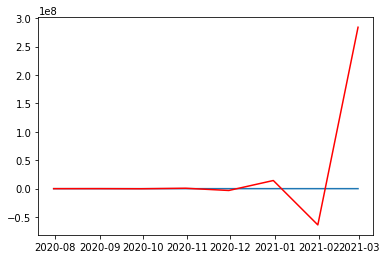

In [ ]:
from matplotlib import pyplot
pyplot.plot(test_y)
pyplot.plot(prediction, color='red')

Modelo de autoregresión con Walk Forward

In [ ]:
train, test = dataframe_list0.y[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.35)], \
              dataframe_list0.y[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.35):]
data = train
predict=[]
for t in test:
  model = AR(data)
  model_fit = model.fit()
  z = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
  print(z.values[0])
  predict.append(z.values[0])
  data = np.append(data,t)
  data = pd.Series(data) 


794.3879164561138
-101.0034718348067
-63.867158411644475
-46.31344055501631
1.4828729059639514
413.007279955104
-517.7962577360096
-455.2182397383952


In [ ]:
mse = mean_squared_error(test.values,predict)
mse

177053.81902154273

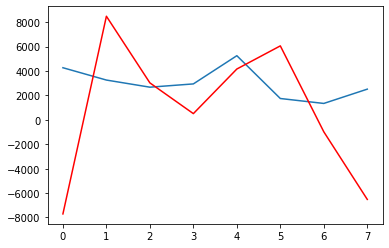

In [ ]:
from matplotlib import pyplot
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

Modelo de promedio movil

In [ ]:
dataframe_list0['t'] = dataframe_list0['y'].shift(1)
train, test = dataframe_list0[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31)], dataframe_list0[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31):]
train_x, train_y = train['t'], train['y']
test_x, test_y = test['t'],test['y']
#dataframe_list0['t'] = dataframe_list0['y'].shift(1)
dataframe_list0['Resid'] = dataframe_list0['y'] - dataframe_list0['t']
dataframe_list0
train, test = dataframe_list0.Resid[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31)], dataframe_list0.Resid[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31):]
modelAR = AR(train)
model_fit = modelAR.fit()
model_fit.k_ar
model_fit.params
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
predictions = dataframe_list0.t[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31):] +pred_resid
predictions

fecha_mes
2020-07-31    4.972402e+04
2020-08-31    1.430179e+06
2020-09-30    4.236606e+07
2020-10-31    1.257507e+09
2020-11-30    3.732903e+10
2020-12-31    1.108116e+12
2021-01-31    3.289453e+13
2021-02-28    9.764777e+14
Freq: M, dtype: float64

In [ ]:
mse = mean_squared_error(test_y,predictions)
mse

1.1932398566740685e+29

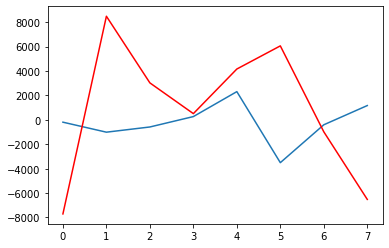

In [ ]:
from matplotlib import pyplot
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

Modelo de ARIMA

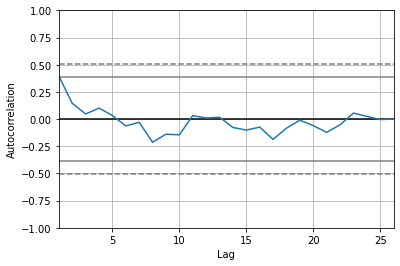

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dataframe_list0['y'])

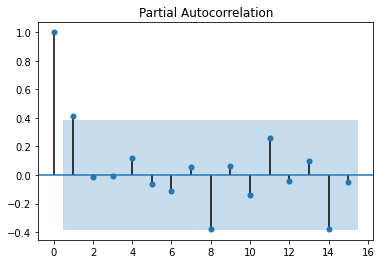

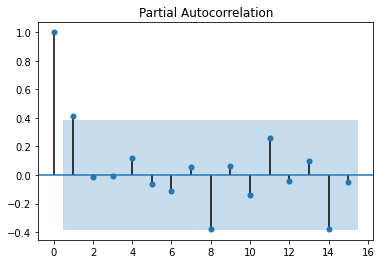

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dataframe_list0['y'],lags=15)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
modelARIMA = ARIMA(dataframe_list0['y'], order = [5,1,0])
model_fit = modelARIMA.fit()
print(model_fit.summary())
residuals = model_fit.resid

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   25
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -208.800
Method:                       css-mle   S.D. of innovations           1012.154
Date:                Mon, 21 Jun 2021   AIC                            431.599
Time:                        23:50:14   BIC                            440.132
Sample:                    02-28-2019   HQIC                           433.966
                         - 02-28-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6079     93.752      0.422      0.677    -144.142     223.358
ar.L1.D.y     -0.4256      0.201     -2.118      0.048      -0.819      -0.032
ar.L2.D.y     -0.3784      0.219     -1.731      0.1

In [ ]:
model_fit.forecast(5)[0]

array([3562.47072086, 3050.90987687, 2584.41140179, 2593.80438321,
       2986.93810702])

Modelo de SARIMA

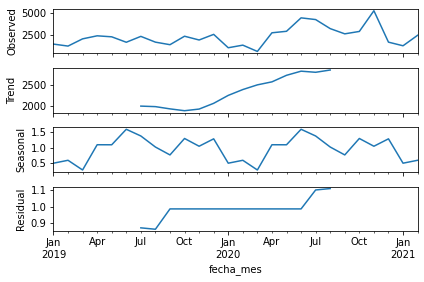

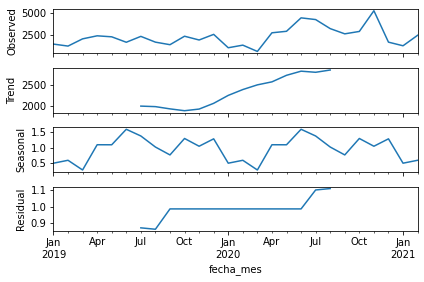

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
result_a = seasonal_decompose(dataframe_list0['y'], model = 'multiplicative')
result_a.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


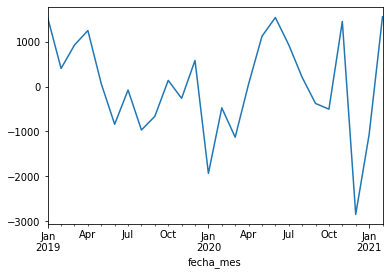

In [ ]:
model = SARIMAX(dataframe_list0['y'], order = (5,1,3), seasonal_order = (1,1,1,6))
model_fit = model.fit()
residuals = model_fit.resid
residuals.plot()

In [ ]:
output  = model_fit.forecast(6)

In [ ]:
yhat = model_fit.predict()

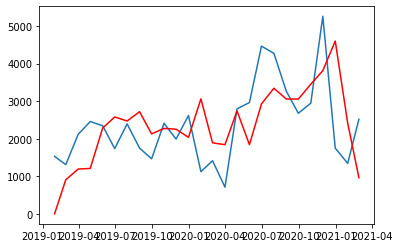

In [ ]:
pyplot.plot(dataframe_list0['y'])
pyplot.plot(yhat, color = 'red')

Modelo con hiperparametros

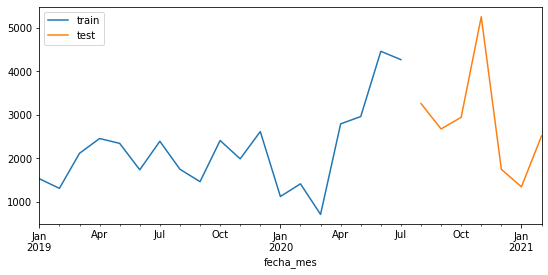

In [ ]:
# Preparación de los datos
# ==============================================================================
dataframe_list0 = dataframe_list1
#dataframe_list0
dataframe_list0['fecha_mes'] = pd.to_datetime(dataframe_list0['fecha_mes'], format='%Y/%m/%d')
dataframe_list0 = dataframe_list0.set_index('fecha_mes')
dataframe_list0 = dataframe_list0.rename(columns={'ventas_pares': 'y'})
dataframe_list0 = dataframe_list0.asfreq('M')
dataframe_list0 = dataframe_list0['y']
dataframe_list0 = dataframe_list0.sort_index()
#Verificar que un índice temporal está completo
# ==============================================================================

(dataframe_list0.index == pd.date_range(start=dataframe_list0.index.min(),
                             end=dataframe_list0.index.max(),
                              freq=dataframe_list0.index.freq)).all()
# Cambiar valorar Nan por 0
# ==============================================================================                             
dataframe_list0 = dataframe_list0.fillna(0)
# Separación datos train-test
# ==============================================================================

steps = int(len(dataframe_list0)*0.3)
datos_train = dataframe_list0[:-steps]
datos_test  = dataframe_list0[-steps:]

fig, ax=plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
ax.legend();

In [ ]:

# Crear y entrenar forecaster
# ==============================================================================
forecaster_rf = ForecasterAutoreg(
                    regressor=RandomForestRegressor(random_state=123),
                    lags=8
                )

forecaster_rf.fit(y=datos_train)

forecaster_rf

=======================ForecasterAutoreg=======================
Regressor: RandomForestRegressor(random_state=123)
Lags: [1 2 3 4 5 6 7 8]
Exogenous variable: False
Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}

In [ ]:
# Predicciones
# =================<<<=============================================================
steps = 7
predicciones = forecaster_rf.predict(steps=steps)
# Se añade el índice temporal a las predicciones
predicciones = pd.Series(data=predicciones, index=datos_test.index)
predicciones

fecha_mes
2020-08-31    2584.65
2020-09-30    1760.66
2020-10-31    1737.77
2020-11-30    2079.43
2020-12-31    2177.77
2021-01-31    2122.53
2021-02-28    1966.04
Freq: M, dtype: float64

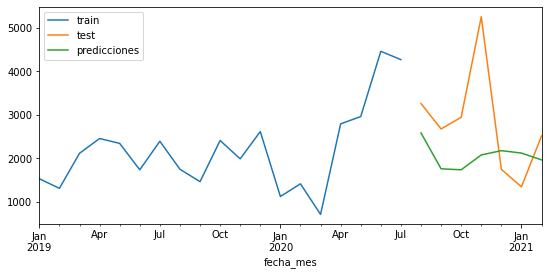

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [ ]:
# Error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = datos_test,
                y_pred = predicciones
            )
print(f"Error de test (mse): {error_mse}")

Error de test (mse): 1991762.3301857144


In [ ]:
# Grid search de hiperparámetros
# ==============================================================================
forecaster_rf = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=123),
                    lags      = 7 # Este valor será remplazado en el grid search
                 )

# Hiperparámetros del regresor
param_grid = {'n_estimators': [100,500],
              'max_depth': [3, 5, 9]}

# Lags utilizados como predictores
lags_grid = [1, 7]

resultados_grid = grid_search_forecaster(
                        forecaster  = forecaster_rf,
                        y           = datos_train,
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 10,
                        method      = 'cv',
                        metric      = 'neg_mean_squared_error',
                        initial_train_size    = int(len(datos_train)*0.5),
                        allow_incomplete_fold = False,
                        return_best = True,
                        verbose     = False
                   )

loop lags_grid:  50%|█████     | 1/2 [00:04<00:04,  4.33s/it]


IndexError: ignored

In [ ]:
# Resultados Grid Search
# ==============================================================================
resultados_grid


Pronostico Mensual por referencia
---


In [ ]:
# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# <COMENTARIO> ===> Instalación librería skforecast
# ==============================================================================
!pip install git+https://github.com/JoaquinAmatRodrigo/skforecast@v0.1.8.1
# ==============================================================================
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterCustom import ForecasterCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import time_series_spliter
from skforecast.model_selection import cv_forecaster
from skforecast.model_selection import backtesting_forecaster_intervals

  Cloning https://github.com/JoaquinAmatRodrigo/skforecast (to revision v0.1.8.1) to /tmp/pip-req-build-5gm2iwon
  Running command git clone -q https://github.com/JoaquinAmatRodrigo/skforecast /tmp/pip-req-build-5gm2iwon
  Running command git checkout -q e9f125fec47e13a6ba768bf9e5c362815e84d767
  Created wheel for skforecast: filename=skforecast-0.1.8.1-cp37-none-any.whl size=25669 sha256=baa5da437a6de50729dfa53c633d92a38f7cfa1d4afd95c43002191232b905ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-pr_vl1m6/wheels/6e/35/85/7ac8338095a8a31e1d870230c04f48fc9f0a2c76d5130ecaf9
Successfully built skforecast


In [ ]:
# Dataframe por referencia
filtred_mensual_fab2 = filtred_mensual_fab
reference_list=filtred_mensual_fab2['descricpcion_ref'].unique().tolist()
dataframe_list = []

##Preparación de datos
for i in reference_list:
  dataframe = filtred_mensual_fab2[filtred_mensual_fab2.descricpcion_ref==i]
  dataframe=dataframe.drop(['año','mes','submarca_AUR','descripcion_origen','descricpcion_ref'], axis = 1)
  dataframe['fecha_mes'] = pd.to_datetime(dataframe['fecha_mes'], format='%Y/%m/%d')
  dataframe = dataframe.set_index('fecha_mes')
  dataframe = dataframe.rename(columns={'ventas_pares': 'y'})
  dataframe = dataframe.asfreq('M')
  #dataframe_list0 = dataframe_list0['y']
  dataframe = dataframe.sort_index()                           
  dataframe = dataframe.fillna(0)
  dataframe_list.append(dataframe)


MODELO DE AUTOREGRESIÓN
--

In [ ]:
from statsmodels.tsa.ar_model import AR
list_predictions =[]
list_mses =[]
list_percent_data_train=[]
list_references=[]
list_percent = [0.04,0.08,0.12,0.16,0.2,0.24,0.27,0.31,0.35,0.39,0.43,0.47,0.50,0.54,0.58,0.62,0.66]
cont = 0
for dataframe in dataframe_list:
  if dataframe.shape[0]>25:
    min_mse=9999999999999999999999999999999999999999999999999999999999999999
    percent_train=0
    best_prediction = None
    for percent in list_percent:
      dataframe['t'] = dataframe['y'].shift(1)
      train, test = dataframe[1:dataframe.shape[0]-int(dataframe.shape[0]*percent)], \
                dataframe[dataframe.shape[0]-int(dataframe.shape[0]*percent):]
      train_x, train_y = train['t'], train['y']
      test_x, test_y = test['t'],test['y']
      train, test = dataframe.y[1:dataframe.shape[0]-int(dataframe.shape[0]*percent)], \
                dataframe.y[dataframe.shape[0]-int(dataframe.shape[0]*percent):]
      modelAR = AR(train)
      model_fit = modelAR.fit()
      model_fit.k_ar
      model_fit.params
      prediction =  model_fit.predict(start=len(train), end=len(train)+len(test)-1)
      mse = mean_squared_error(test_y,prediction)
      if mse<min_mse:
        min_mse=mse
        percent_train=percent
        best_prediction = prediction
      if mse <= 0.285202:
        print("porcentaje: {}".format(percent))
        print(reference_list[cont])
    list_mses.append(min_mse)
    list_percent_data_train.append(percent_train)
    list_predictions.append(best_prediction)
    list_references.append(reference_list[cont])
  cont+=1

resultadosModeloAR = list(zip(list_references, list_predictions, list_mses, list_percent_data_train))
resultadosModeloAR = pd.DataFrame(resultadosModeloAR)
resultadosModeloAR.columns = ['descricpcion_ref', 'prediccionAR', 'Error_cuadratico','Percent_data_train']

porcentaje: 0.04
JONICO NEGRO                    


In [ ]:
resultadosModeloAR

descricpcion_ref  ... Percent_data_train
0   ARGYLL NEGRO                      ...               0.62
1   ARGYLL SAFETY NEGRO               ...               0.58
2   ARGYLL SAFETY PAZ DEL RIO         ...               0.04
3   ARGYLL SUPER SAFETY NEGRO         ...               0.04
4   CROYDON FIRE FILTREX MEDIUM       ...               0.04
..                               ...  ...                ...
88  ROYAL LO CUT AZUL                 ...               0.04
89  ROYAL LO CUT BLANCO               ...               0.04
90  ROYAL LO CUT NEGRO                ...               0.04
91  ROYAL LO CUT ROJO                 ...               0.04
92  BOTA TITAN NEGRA                  ...               0.62

[93 rows x 4 columns]

In [ ]:
resultadosModeloAR.describe()

Error_cuadratico  Percent_data_train
count      9.300000e+01           93.000000
mean       1.083638e+07            0.178172
std        6.856950e+07            0.223689
min        2.852017e-01            0.040000
25%        1.690325e+03            0.040000
50%        3.287379e+04            0.040000
75%        2.481458e+05            0.200000
max        5.637844e+08            0.660000

In [ ]:
menor = resultadosModeloAR[resultadosModeloAR['Error_cuadratico']<=0.8]
menor

descricpcion_ref  ... Percent_data_train
43  WORKMAN TERMICA BLANCA            ...               0.20
80  JONICO NEGRO                      ...               0.04

[2 rows x 4 columns]

Modelo de autoregresión con Walk Forward
--

In [ ]:
list_predictions =[]
list_mses =[]
list_percent = [0.04,0.08,0.12,0.16,0.2,0.24,0.27,0.31,0.35,0.39,0.43,0.47,0.50,0.54,0.58,0.62,0.66]
for dataframe in dataframe_list:
   if dataframe.shape[0]>25:
    min_mse=999999999999999999999999999999999999999999999999999999999999999999999999
    percent_train=0
    for percent in list_percent:
      try:
        train, test = dataframe.y[1:dataframe.shape[0]-int(dataframe.shape[0]*percent)], \
                  dataframe.y[dataframe.shape[0]-int(dataframe.shape[0]*percent):]
        data = train
        predict=[]
        for t in test:
          model = AR(data)
          model_fit = model.fit()
          z = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
          predict.append(z.values[0])
          data = np.append(data,t)
          data = pd.Series(data) 
        list_predictions.append(prediction)
        mse = mean_squared_error(test.values,predict)
        if mse<min_mse:
          min_mse=mse
          percent_train=percent
      except:
        pass
    list_mses.append(min_mse)
    list_percent_data_train.append(percent_train)

resultadosModeloAR_WalkForward = list(zip(reference_list, list_predictions, list_mses,list_percent_data_train))
resultadosModeloAR_WalkForward = pd.DataFrame(resultadosModeloAR_WalkForward)
resultadosModeloAR_WalkForward.columns = ['descricpcion_ref', 'prediccionAR_WalkForward', 'Error_cuadratico','Percent_data_train']


In [ ]:
resultadosModeloAR_WalkForward

descricpcion_ref  ... Percent_data_train
0   ARGYLL NEGRO                      ...               0.62
1   ARGYLL SAFETY NEGRO               ...               0.58
2   ARGYLL SAFETY PAZ DEL RIO         ...               0.04
3   ARGYLL SUPER SAFETY NEGRO         ...               0.04
4   CROYDON FIRE A NOMEX MED          ...               0.04
..                               ...  ...                ...
88  COLEGIAL XXI BLANCO               ...               0.04
89  COLEGIAL XXI PC BLANCO            ...               0.04
90  COLEGIAL XXI PC NEGRO             ...               0.04
91  KIT COLEGIAL 1 MULTICOLOR         ...               0.04
92  COLEGIAL LEONARD AZUL             ...               0.62

[93 rows x 4 columns]

In [ ]:
resultadosModeloAR_WalkForward.min(axis=0)
menor = resultadosModeloAR_WalkForward[resultadosModeloAR_WalkForward['Error_cuadratico']<=0.5]
menor

descricpcion_ref  ... Percent_data_train
43  BOTA MACHITA AZUL                 ...               0.20
80  ZAPATON WORMAN SAFETY BLANCO      ...               0.04

[2 rows x 4 columns]

In [ ]:
resultadosModeloAR_WalkForward.describe()

Error_cuadratico
count      9.300000e+01
mean       1.816984e+07
std        1.164090e+08
min        2.852017e-01
25%        1.690325e+03
50%        3.438610e+04
75%        2.948060e+05
max        9.561893e+08

Modelo de promedio movil
--

In [ ]:
list_predictions =[]
list_mses =[]
list_percent = [0.04,0.08,0.12,0.16,0.2,0.24,0.27,0.31,0.35,0.39,0.43,0.47,0.50,0.54,0.58,0.62,0.66]
for dataframe in dataframe_list:
   if dataframe.shape[0]>25:
    min_mse=999999999999999999999999999999999999999999999999999999999999999999999999
    for percent in list_percent:
      dataframe['t'] = dataframe['y'].shift(1)
      try:
        train, test = dataframe[1:dataframe.shape[0]-int(dataframe.shape[0]*percent)], dataframe[dataframe.shape[0]-int(dataframe.shape[0]*percent):]
        train_x, train_y = train['t'], train['y']
        test_x, test_y = test['t'],test['y']
        #dataframe_list0['t'] = dataframe_list0['y'].shift(1)
        dataframe['Resid'] = dataframe['y'] - dataframe['t']
        dataframe
        train, test = dataframe.Resid[1:dataframe.shape[0]-int(dataframe.shape[0]*percent)], dataframe.Resid[dataframe.shape[0]-int(dataframe.shape[0]*percent):]
        modelAR = AR(train)
        model_fit = modelAR.fit()
        model_fit.k_ar
        model_fit.params
        pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
        predictions = dataframe.t[dataframe.shape[0]-int(dataframe.shape[0]*percent):] +pred_resid
        list_predictions.append(predictions)
        mse = mean_squared_error(test_y,predictions)
        if mse<min_mse:
          min_mse=mse
      except:
        pass
    list_mses.append(mse)

resultadosModeloPromedioMovil = list(zip(reference_list, list_predictions, list_mses))
resultadosModeloPromedioMovil = pd.DataFrame(resultadosModeloPromedioMovil)
resultadosModeloPromedioMovil.columns = ['descricpcion_ref', 'prediccionPromedioMovil', 'Error_cuadratico']

In [ ]:
resultadosModeloPromedioMovil

descricpcion_ref  ... Error_cuadratico
0   ARGYLL NEGRO                      ...     1.884686e+06
1   ARGYLL SAFETY NEGRO               ...     1.312956e+06
2   ARGYLL SAFETY PAZ DEL RIO         ...     9.286013e+03
3   ARGYLL SUPER SAFETY NEGRO         ...     5.983110e+04
4   CROYDON FIRE A NOMEX MED          ...     2.124445e+04
..                               ...  ...              ...
88  COLEGIAL XXI BLANCO               ...     2.525718e+04
89  COLEGIAL XXI PC BLANCO            ...     3.227689e+05
90  COLEGIAL XXI PC NEGRO             ...     8.951188e+05
91  KIT COLEGIAL 1 MULTICOLOR         ...     2.801777e+03
92  COLEGIAL LEONARD AZUL             ...     1.310891e+08

[93 rows x 3 columns]

In [ ]:
resultadosModeloPromedioMovil.describe()

Error_cuadratico
count      9.300000e+01
mean       2.276862e+20
std        2.195726e+21
min        2.167759e+01
25%        2.844701e+04
50%        2.803382e+05
75%        1.756874e+06
max        2.117482e+22

Modelo ARIMA
--

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
list_predictions =[]
list_mses =[]
for dataframe in dataframe_list:
  if dataframe.shape[0]>15:
    modelARIMA = ARIMA(dataframe['y'], order = [5,1,0])
    model_fit = modelARIMA.fit()
    model_fit.summary()
    residuals = model_fit.resid
  prediction=model_fit.forecast(5)[0]
  list_predictions.append(predictions)
  #mse = mean_squared_error(y,prediction)
  #list_mses.append(mse)

resultadosModeloARIMA = list(zip(reference_list, list_predictions, list_mses))
resultadosModeloARIMA = pd.DataFrame(resultadosModeloARIMA)
resultadosModeloARIMA.columns = ['descricpcion_ref', 'prediccionARIMA', 'Error_cuadratico']

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

LinAlgError: ignored

Pronostico diario
---


In [ ]:
# Dataframe por referencia
filtred_diario_fab2 = filtred_diario_fab
reference_list=filtred_diario_fab2['descricpcion_ref'].unique().tolist()
dataframe_list = []
for i in reference_list:
  dataframe = filtred_diario_fab2[filtred_diario_fab2.descricpcion_ref==i]
  dataframe_list.append(dataframe)
##Selección de una referencia para pruebas
dataframe_list1=dataframe_list[0].drop(['año','dia','submarca_AUR','descripcion_origen','descricpcion_ref'], axis = 1)
# Preparación de los datos
# ==============================================================================
dataframe_list0 = dataframe_list1
#dataframe_list0
dataframe_list0['fecha'] = pd.to_datetime(dataframe_list0['fecha'], format='%Y/%m/%d')
dataframe_list0 = dataframe_list0.set_index('fecha')
dataframe_list0 = dataframe_list0.rename(columns={'ventas_pares': 'y'})
dataframe_list0 = dataframe_list0.asfreq('M')
#dataframe_list0 = dataframe_list0['y']
dataframe_list0 = dataframe_list0.sort_index()
#Verificar que un índice temporal está completo
# ==============================================================================

(dataframe_list0.index == pd.date_range(start=dataframe_list0.index.min(),
                             end=dataframe_list0.index.max(),
                              freq=dataframe_list0.index.freq)).all()
# Cambiar valorar Nan por 0
# ==============================================================================                             
dataframe_list0 = dataframe_list0.fillna(0)
dataframe_list0

y
fecha            
2019-01-31  301.0
2019-02-28   10.0
2019-03-31    0.0
2019-04-30  182.0
2019-05-31  100.0
2019-06-30    0.0
2019-07-31    0.0
2019-08-31    4.0
2019-09-30    0.0
2019-10-31   28.0
2019-11-30    0.0
2019-12-31    0.0
2020-01-31    6.0
2020-02-29    0.0
2020-03-31    0.0
2020-04-30   69.0
2020-05-31    0.0
2020-06-30    0.0
2020-07-31    0.0
2020-08-31    0.0
2020-09-30   66.0
2020-10-31  337.0
2020-11-30    0.0
2020-12-31    0.0
2021-01-31    0.0

Modelo de Autoregresión

In [ ]:
dataframe_list0['t'] = dataframe_list0['y'].shift(1)
train, test = dataframe_list0[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.36)], \
              dataframe_list0[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.36):]
train_x, train_y = train['t'], train['y']
test_x, test_y = test['t'],test['y']
train, test = dataframe_list0.y[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.36)], \
              dataframe_list0.y[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.36):]
from statsmodels.tsa.ar_model import AR
modelAR = AR(train)
model_fit = modelAR.fit()
model_fit.k_ar
model_fit.params
prediction =  model_fit.predict(start=len(train), end=len(train)+len(test)-1)
prediction
mse = mean_squared_error(test_y,prediction)
mse

3.6977659417065553e+24

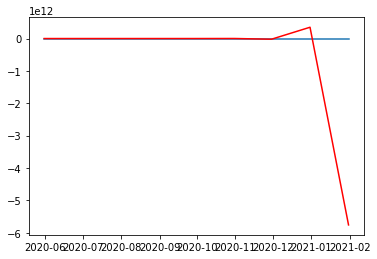

In [ ]:
from matplotlib import pyplot
pyplot.plot(test_y)
pyplot.plot(prediction, color='red')

Modelo de autoregresión con Walk Forward

In [ ]:
train, test = dataframe_list0.y[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.36)], \
              dataframe_list0.y[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.36):]
data = train
predict=[]
for t in test:
  model = AR(data)
  model_fit = model.fit()
  z = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
  print(z.values[0])
  predict.append(z.values[0])
  data = np.append(data,t)
  data = pd.Series(data) 

-1044.0879437047704
794.3879164561138
-101.0034718348067
-63.867158411644475
-46.31344055501631
1.4828729059639514
413.007279955104
-517.7962577360096
-455.2182397383952


In [ ]:
mse = mean_squared_error(test.values,predict)
mse

278505.57626244414

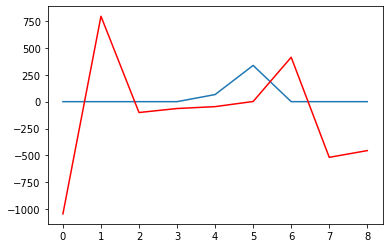

In [ ]:
from matplotlib import pyplot
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

Modelo de promedio movil

In [ ]:
dataframe_list0['t'] = dataframe_list0['y'].shift(1)
train, test = dataframe_list0[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31)], dataframe_list0[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31):]
train_x, train_y = train['t'], train['y']
test_x, test_y = test['t'],test['y']
#dataframe_list0['t'] = dataframe_list0['y'].shift(1)
dataframe_list0['Resid'] = dataframe_list0['y'] - dataframe_list0['t']
dataframe_list0
train, test = dataframe_list0.Resid[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31)], dataframe_list0.Resid[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31):]
modelAR = AR(train)
model_fit = modelAR.fit()
model_fit.k_ar
model_fit.params
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
predictions = dataframe_list0.t[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31):] +pred_resid
predictions

In [ ]:
mse = mean_squared_error(test_y,predictions)
mse

In [ ]:
from matplotlib import pyplot
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

Modelo de ARIMA

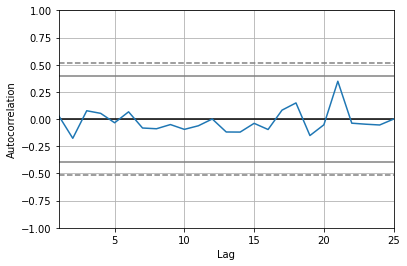

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dataframe_list0['y'])

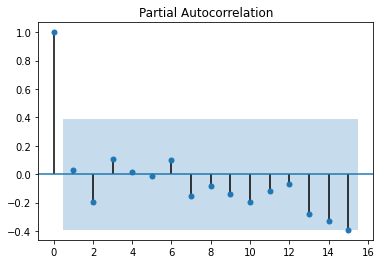

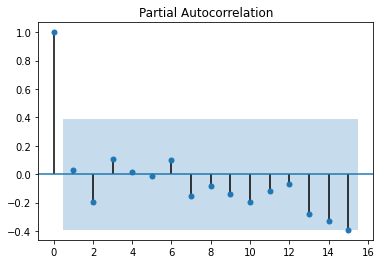

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dataframe_list0['y'],lags=15)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
modelARIMA = ARIMA(dataframe_list0['y'], order = [5,1,0])
model_fit = modelARIMA.fit()
print(model_fit.summary())
residuals = model_fit.resid

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   24
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -142.944
Method:                       css-mle   S.D. of innovations             89.870
Date:                Mon, 21 Jun 2021   AIC                            299.888
Time:                        22:16:16   BIC                            308.134
Sample:                    02-28-2019   HQIC                           302.076
                         - 01-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7125      5.147     -0.527      0.605     -12.801       7.376
ar.L1.D.y     -0.7461      0.228     -3.278      0.004      -1.192      -0.300
ar.L2.D.y     -0.8693      0.271     -3.202      0.0

In [ ]:
model_fit.forecast(5)[0]

Modelo SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
result_a = seasonal_decompose(dataframe_list0['y'], model = 'multiplicative')
result_a.plot()

ValueError: ignored

In [ ]:
model = SARIMAX(dataframe_list0['y'], order = (5,1,3), seasonal_order = (1,1,1,6))
model_fit = model.fit()
residuals = model_fit.resid
residuals.plot()

In [ ]:
output  = model_fit.forecast(6)

In [ ]:
yhat = model_fit.predict()

In [ ]:
pyplot.plot(dataframe_list0['y'])
pyplot.plot(yhat, color = 'red')

Modelo con hiperparametros

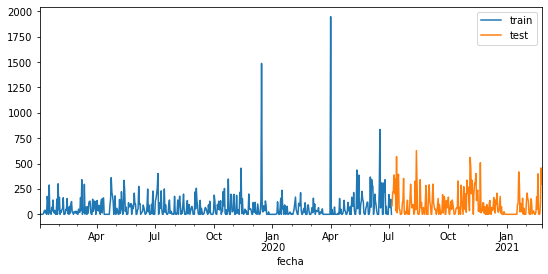

In [ ]:
# Preparación de los datos
# ==============================================================================
dataframe_list0 = dataframe_list1
#dataframe_list0
dataframe_list0['fecha'] = pd.to_datetime(dataframe_list0['fecha'], format='%Y/%m/%d')
dataframe_list0 = dataframe_list0.set_index('fecha')
dataframe_list0 = dataframe_list0.rename(columns={'ventas_pares': 'y'})
dataframe_list0 = dataframe_list0.asfreq('D')
dataframe_list0 = dataframe_list0['y']
dataframe_list0 = dataframe_list0.sort_index()
#Verificar que un índice temporal está completo
# ==============================================================================

(dataframe_list0.index == pd.date_range(start=dataframe_list0.index.min(),
                             end=dataframe_list0.index.max(),
                              freq=dataframe_list0.index.freq)).all()
# Cambiar valorar Nan por 0
# ==============================================================================                             
dataframe_list0 = dataframe_list0.fillna(0)
# Separación datos train-test
# ==============================================================================

steps = int(len(dataframe_list0)*0.3)
datos_train = dataframe_list0[:-steps]
datos_test  = dataframe_list0[-steps:]

fig, ax=plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
ax.legend();

In [ ]:
# Predicciones
# =================<<<=============================================================
steps = 50
predicciones = forecaster_rf.predict(steps=steps)
# Se añade el índice temporal a las predicciones
predicciones = pd.Series(data=predicciones, index=datos_test.index)
predicciones

IndexError: ignored

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();


In [ ]:
# Error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = datos_test,
                y_pred = predicciones
            )
print(f"Error de test (mse): {error_mse}")

In [ ]:
# Grid search de hiperparámetros
# ==============================================================================
forecaster_rf = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=123),
                    lags      = 7 # Este valor será remplazado en el grid search
                 )

# Hiperparámetros del regresor
param_grid = {'n_estimators': [100,500],
              'max_depth': [1, 2, 3]}

# Lags utilizados como predictores
lags_grid = [1, 9]

resultados_grid = grid_search_forecaster(
                        forecaster  = forecaster_rf,
                        y           = datos_train,
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 10,
                        method      = 'cv',
                        metric      = 'neg_mean_squared_error',
                        initial_train_size    = int(len(datos_train)*0.5),
                        allow_incomplete_fold = False,
                        return_best = True,
                        verbose     = False
                   )

In [ ]:
# Resultados Grid Search
# ==============================================================================
resultados_grid

Pronóstico Diario por referencia
---

In [ ]:
# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# <COMENTARIO> ===> Instalación librería skforecast
# ==============================================================================
!pip install git+https://github.com/JoaquinAmatRodrigo/skforecast@v0.1.8.1
# ==============================================================================
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterCustom import ForecasterCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import time_series_spliter
from skforecast.model_selection import cv_forecaster
from skforecast.model_selection import backtesting_forecaster_intervals

  Cloning https://github.com/JoaquinAmatRodrigo/skforecast (to revision v0.1.8.1) to /tmp/pip-req-build-fjjugh5l
  Running command git clone -q https://github.com/JoaquinAmatRodrigo/skforecast /tmp/pip-req-build-fjjugh5l
  Running command git checkout -q e9f125fec47e13a6ba768bf9e5c362815e84d767
  Created wheel for skforecast: filename=skforecast-0.1.8.1-cp37-none-any.whl size=25669 sha256=040bbf3228146dc2c797fa418c7ace5b7d5c2020b9ea3adb018e11429de76b07
  Stored in directory: /tmp/pip-ephem-wheel-cache-erksbqug/wheels/6e/35/85/7ac8338095a8a31e1d870230c04f48fc9f0a2c76d5130ecaf9
Successfully built skforecast


In [ ]:
# Dataframe por referencia
filtred_diario_fab2 = filtred_diario_fab
reference_list=filtred_diario_fab2['descricpcion_ref'].unique().tolist()
dataframe_list = []

##Preparación de datos
for i in reference_list:
  dataframe = filtred_diario_fab2[filtred_diario_fab2.descricpcion_ref==i]
  dataframe=dataframe.drop(['año','dia','submarca_AUR','descripcion_origen','descricpcion_ref'], axis = 1)
  dataframe['fecha'] = pd.to_datetime(dataframe['fecha'], format='%Y/%m/%d')
  dataframe = dataframe.set_index('fecha')
  dataframe = dataframe.rename(columns={'ventas_pares': 'y'})
  dataframe = dataframe.asfreq('W')
  #dataframe_list0 = dataframe_list0['y']
  dataframe = dataframe.sort_index()                           
  dataframe = dataframe.fillna(0)
  dataframe_list.append(dataframe)

Modelo de Autoregresión
--

In [ ]:
from statsmodels.tsa.ar_model import AR
list_predictions =[]
list_mses =[]
for dataframe in dataframe_list:
  if dataframe.shape[0]>15:
    dataframe['t'] = dataframe['y'].shift(1)
    train, test = dataframe[1:dataframe.shape[0]-int(dataframe.shape[0]*0.31)], \
              dataframe[dataframe.shape[0]-int(dataframe.shape[0]*0.31):]
    train_x, train_y = train['t'], train['y']
    test_x, test_y = test['t'],test['y']
    train, test = dataframe.y[1:dataframe.shape[0]-int(dataframe.shape[0]*0.31)], \
              dataframe.y[dataframe.shape[0]-int(dataframe.shape[0]*0.31):]
    modelAR = AR(train)
    model_fit = modelAR.fit()
    model_fit.k_ar
    model_fit.params
    prediction =  model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    list_predictions.append(prediction)
    mse = mean_squared_error(test_y,prediction)
    list_mses.append(mse)

resultadosModeloAR = list(zip(reference_list, list_predictions, list_mses))
resultadosModeloAR = pd.DataFrame(resultadosModeloAR)
resultadosModeloAR.columns = ['descricpcion_ref', 'prediccionAR', 'Error_cuadratico']

In [ ]:
resultadosModeloAR

descricpcion_ref  ... Error_cuadratico
0    ARGYLL NEGRO                      ...     5.045956e+03
1    ARGYLL SAFETY NEGRO               ...     1.037385e+04
2    ARGYLL SAFETY PAZ DEL RIO         ...     3.889706e+02
3    MACHA ALTA  NEGRO                 ...     1.854264e+06
4    MACHA BAJA NEGRO                  ...     4.373530e+03
..                                ...  ...              ...
173  ZEY NEGRO                         ...     2.063349e+02
174  POOLE NEGRA                       ...     3.090001e+02
175  RIYAD AZUL-ROJO                   ...     6.193127e+03
176  POOLE VINOTINTO                   ...     3.527821e+05
177  CARS DRAG  NEGRO-ROJO             ...     2.172202e+05

[178 rows x 3 columns]

In [ ]:
resultadosModeloAR.describe()

Error_cuadratico
count      1.780000e+02
mean       1.423825e+36
std        1.344427e+37
min        0.000000e+00
25%        3.558270e-02
50%        1.011552e+01
75%        4.179950e+02
max        1.376110e+38

Modelo de autoregresión con Walk Forward
--

In [ ]:
list_predictions =[]
list_mses =[]
for dataframe in dataframe_list:
  if dataframe.shape[0]>15:
    train, test = dataframe.y[1:dataframe.shape[0]-int(dataframe.shape[0]*0.31)], \
              dataframe.y[dataframe.shape[0]-int(dataframe.shape[0]*0.31):]
    data = train
    predict=[]
    for t in test:
      model = AR(data)
      model_fit = model.fit()
      z = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
      predict.append(z.values[0])
      data = np.append(data,t)
      data = pd.Series(data) 
    list_predictions.append(prediction)
    mse = mean_squared_error(test.values,predict)
    list_mses.append(mse)

resultadosModeloAR_WalkForward = list(zip(reference_list, list_predictions, list_mses))
resultadosModeloAR_WalkForward = pd.DataFrame(resultadosModeloAR_WalkForward)
resultadosModeloAR_WalkForward.columns = ['descricpcion_ref', 'prediccionAR_WalkForward', 'Error_cuadratico']

In [ ]:
resultadosModeloAR_WalkForward

descricpcion_ref  ... Error_cuadratico
0    ARGYLL NEGRO                      ...     4.768574e+03
1    ARGYLL SAFETY NEGRO               ...     9.926315e+04
2    ARGYLL SAFETY PAZ DEL RIO         ...     3.912950e+02
3    MACHA ALTA  NEGRO                 ...     2.221506e+06
4    MACHA BAJA NEGRO                  ...     4.667465e+03
..                                ...  ...              ...
173  ZEY NEGRO                         ...     4.136432e+02
174  POOLE NEGRA                       ...     4.963470e+02
175  RIYAD AZUL-ROJO                   ...     5.139330e+04
176  POOLE VINOTINTO                   ...     1.723742e+08
177  CARS DRAG  NEGRO-ROJO             ...     1.077026e+06

[178 rows x 3 columns]

In [ ]:
resultadosModeloAR_WalkForward.describe()

Error_cuadratico
count      1.780000e+02
mean       1.806865e+27
std        1.667651e+28
min        0.000000e+00
25%        3.135512e-02
50%        1.334186e+01
75%        2.037173e+03
max        1.612022e+29

Modelo de promedio móvil
--

In [ ]:
list_predictions =[]
list_mses =[]
for dataframe in dataframe_list:
  if dataframe.shape[0]>15:
    dataframe['t'] = dataframe['y'].shift(1)
    train, test = dataframe[1:dataframe.shape[0]-int(dataframe.shape[0]*0.31)], dataframe[dataframe.shape[0]-int(dataframe.shape[0]*0.31):]
    train_x, train_y = train['t'], train['y']
    test_x, test_y = test['t'],test['y']
    #dataframe_list0['t'] = dataframe_list0['y'].shift(1)
    dataframe['Resid'] = dataframe['y'] - dataframe['t']
    dataframe
    train, test = dataframe.Resid[1:dataframe.shape[0]-int(dataframe.shape[0]*0.31)], dataframe.Resid[dataframe.shape[0]-int(dataframe.shape[0]*0.31):]
    modelAR = AR(train)
    model_fit = modelAR.fit()
    model_fit.k_ar
    model_fit.params
    pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    predictions = dataframe.t[dataframe.shape[0]-int(dataframe.shape[0]*0.31):] +pred_resid
  list_predictions.append(predictions)
  mse = mean_squared_error(test_y,predictions)
  list_mses.append(mse)

resultadosModeloPromedioMovil = list(zip(reference_list, list_predictions, list_mses))
resultadosModeloPromedioMovil = pd.DataFrame(resultadosModeloPromedioMovil)
resultadosModeloPromedioMovil.columns = ['descricpcion_ref', 'prediccionPromedioMovil', 'Error_cuadratico']

In [ ]:
resultadosModeloPromedioMovil

descricpcion_ref  ... Error_cuadratico
0    ARGYLL NEGRO                      ...     4.427176e+03
1    ARGYLL SAFETY NEGRO               ...     1.972435e+04
2    ARGYLL SAFETY PAZ DEL RIO         ...     7.779412e+02
3    MACHA ALTA  NEGRO                 ...     3.339122e+06
4    MACHA BAJA NEGRO                  ...     8.766353e+03
..                                ...  ...              ...
173  ZEY NEGRO                         ...     8.165197e+04
174  POOLE NEGRA                       ...     1.335009e+04
175  RIYAD AZUL-ROJO                   ...     1.052608e+04
176  POOLE VINOTINTO                   ...     1.405798e+06
177  CARS DRAG  NEGRO-ROJO             ...     6.119218e+05

[178 rows x 3 columns]

In [ ]:
resultadosModeloPromedioMovil.describe()

Error_cuadratico
count      1.780000e+02
mean       4.094907e+37
std        4.755118e+38
min        0.000000e+00
25%        0.000000e+00
50%        2.564706e+01
75%        1.154368e+03
max        6.267054e+39

Modelo ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
list_predictions =[]
list_mses =[]
for dataframe in dataframe_list:
  if dataframe.shape[0]>15:
    modelARIMA = ARIMA(dataframe['y'], order = [5,1,0])
    model_fit = modelARIMA.fit()
    model_fit.summary()
    residuals = model_fit.resid
  prediction=model_fit.forecast(5)[0]
  list_predictions.append(predictions)
  #mse = mean_squared_error(y,prediction)
  #list_mses.append(mse)

resultadosModeloARIMA = list(zip(reference_list, list_predictions, list_mses))
resultadosModeloARIMA = pd.DataFrame(resultadosModeloARIMA)
resultadosModeloARIMA.columns = ['descricpcion_ref', 'prediccionARIMA', 'Error_cuadratico']

LinAlgError: ignored

Pronostico semana
---

In [ ]:
filtred_semanal_fab.head()

fecha_semana   año  ...                  descricpcion_ref ventas_pares
0   2019-01-06  2019  ...  ARGYLL NEGRO                                9
1   2019-01-06  2019  ...  ARGYLL SAFETY NEGRO                         6
2   2019-01-06  2019  ...  ARGYLL SAFETY PAZ DEL RIO                  13
3   2019-01-06  2019  ...  ARGYLL SUPER SAFETY NEGRO                   4
4   2019-01-06  2019  ...  CROYDON FIRE FILTREX MEDIUM                10

[5 rows x 8 columns]

In [ ]:
# Dataframe por referencia
filtred_semanal_fab2 = filtred_semanal_fab
reference_list=filtred_semanal_fab2['descricpcion_ref'].unique().tolist()
dataframe_list = []

for i in reference_list:
  dataframe = filtred_semanal_fab2[filtred_semanal_fab2.descricpcion_ref==i]
  dataframe_list.append(dataframe)

In [ ]:

dataframe_list1=dataframe_list[0].drop(['año','semana','mes','submarca_AUR','descripcion_origen','descricpcion_ref'], axis = 1)
dataframe_list0 = dataframe_list1
dataframe_list0['fecha_semana'].value_counts()

2019-11-03    2
2019-06-02    2
2020-10-04    2
2020-11-01    2
2019-02-03    2
             ..
2020-04-05    1
2019-01-13    1
2020-09-06    1
2020-04-12    1
2020-06-21    1
Name: fecha_semana, Length: 108, dtype: int64

In [ ]:

##Selección de una referencia para pruebas
dataframe_list1=dataframe_list[0].drop(['año','semana','mes','submarca_AUR','descripcion_origen','descricpcion_ref'], axis = 1)
# Preparación de los datos
# ==============================================================================
dataframe_list0 = dataframe_list1
#dataframe_list0
dataframe_list0['fecha_semana'] = pd.to_datetime(dataframe_list0['fecha_semana'], format='%Y/%m/%d')
dataframe_list0 = dataframe_list0.set_index('fecha_semana')
dataframe_list0 = dataframe_list0.rename(columns={'ventas_pares': 'y'})
dataframe_list0 = dataframe_list0.asfreq('W')
#dataframe_list0 = dataframe_list0['y']
dataframe_list0 = dataframe_list0.sort_index()
#Verificar que un índice temporal está completo
# ==============================================================================

(dataframe_list0.index == pd.date_range(start=dataframe_list0.index.min(),
                             end=dataframe_list0.index.max(),
                              freq=dataframe_list0.index.freq)).all()
# Cambiar valorar Nan por 0
# ==============================================================================                             
dataframe_list0 = dataframe_list0.fillna(0)
dataframe_list0

MODELO DE AUTOREGRESIÓN

In [ ]:
dataframe_list0['t'] = dataframe_list0['y'].shift(1)
train, test = dataframe_list0[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31)], \
              dataframe_list0[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31):]
train_x, train_y = train['t'], train['y']
test_x, test_y = test['t'],test['y']
train, test = dataframe_list0.y[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31)], \
              dataframe_list0.y[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31):]
from statsmodels.tsa.ar_model import AR
modelAR = AR(train)
model_fit = modelAR.fit()
model_fit.k_ar
model_fit.params
prediction =  model_fit.predict(start=len(train), end=len(train)+len(test)-1)
prediction
mse = mean_squared_error(test_y,prediction)
mse

In [ ]:
from matplotlib import pyplot
pyplot.plot(test_y)
pyplot.plot(prediction, color='red')

Modelo de autoregresión con Walk Forward

In [ ]:
train, test = dataframe_list0.y[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31)], \
              dataframe_list0.y[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31):]
data = train
predict=[]
for t in test:
  model = AR(data)
  model_fit = model.fit()
  z = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
  print(z.values[0])
  predict.append(z.values[0])
  data = np.append(data,t)
  data = pd.Series(data) 

In [ ]:
mse = mean_squared_error(test.values,predict)
mse

In [ ]:
from matplotlib import pyplot
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

Modelo de promedio movil

In [ ]:
dataframe_list0['t'] = dataframe_list0['y'].shift(1)
train, test = dataframe_list0[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31)], dataframe_list0[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31):]
train_x, train_y = train['t'], train['y']
test_x, test_y = test['t'],test['y']
#dataframe_list0['t'] = dataframe_list0['y'].shift(1)
dataframe_list0['Resid'] = dataframe_list0['y'] - dataframe_list0['t']
dataframe_list0
train, test = dataframe_list0.Resid[1:dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31)], dataframe_list0.Resid[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31):]
modelAR = AR(train)
model_fit = modelAR.fit()
model_fit.k_ar
model_fit.params
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
predictions = dataframe_list0.t[dataframe_list0.shape[0]-int(dataframe_list0.shape[0]*0.31):] +pred_resid
predictions

In [ ]:
mse = mean_squared_error(test_y,predictions)
mse

In [ ]:
from matplotlib import pyplot
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

Modelo de ARIMA

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dataframe_list0['y'])

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dataframe_list0['y'],lags=15)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
modelARIMA = ARIMA(dataframe_list0['y'], order = [5,1,0])
model_fit = modelARIMA.fit()
print(model_fit.summary())
residuals = model_fit.resid

In [ ]:
model_fit.forecast(5)[0]

Modelo de SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
result_a = seasonal_decompose(dataframe_list0['y'], model = 'multiplicative')
result_a.plot()

In [ ]:
model = SARIMAX(dataframe_list0['y'], order = (5,1,3), seasonal_order = (1,1,1,6))
model_fit = model.fit()
residuals = model_fit.resid
residuals.plot()

In [ ]:
output  = model_fit.forecast(6)

In [ ]:
yhat = model_fit.predict()

In [ ]:
pyplot.plot(dataframe_list0['y'])
pyplot.plot(yhat, color = 'red')

Modelo con hiperparametros

In [ ]:
# Preparación de los datos
# ==============================================================================
dataframe_list0 = dataframe_list1
#dataframe_list0
dataframe_list0['fecha_semana'] = pd.to_datetime(dataframe_list0['fecha_semana'], format='%Y/%m/%d')
dataframe_list0 = dataframe_list0.set_index('fecha_semana')
dataframe_list0 = dataframe_list0.rename(columns={'ventas_pares': 'y'})
dataframe_list0 = dataframe_list0.asfreq('W')
dataframe_list0 = dataframe_list0['y']
dataframe_list0 = dataframe_list0.sort_index()
#Verificar que un índice temporal está completo
# ==============================================================================

(dataframe_list0.index == pd.date_range(start=dataframe_list0.index.min(),
                             end=dataframe_list0.index.max(),
                              freq=dataframe_list0.index.freq)).all()
# Cambiar valorar Nan por 0
# ==============================================================================                             
dataframe_list0 = dataframe_list0.fillna(0)
# Separación datos train-test
# ==============================================================================

steps = int(len(dataframe_list0)*0.3)
datos_train = dataframe_list0[:-steps]
datos_test  = dataframe_list0[-steps:]

fig, ax=plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
ax.legend();

In [ ]:

# Crear y entrenar forecaster
# ==============================================================================
forecaster_rf = ForecasterAutoreg(
                    regressor=RandomForestRegressor(random_state=123),
                    lags=3
                )

forecaster_rf.fit(y=datos_train)

forecaster_rf

In [ ]:
# Predicciones
# =================<<<=============================================================
steps = 7
predicciones = forecaster_rf.predict(steps=steps)
# Se añade el índice temporal a las predicciones
predicciones = pd.Series(data=predicciones, index=datos_test.index)
predicciones

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [ ]:
# Error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = datos_test,
                y_pred = predicciones
            )
print(f"Error de test (mse): {error_mse}")

In [ ]:
# Grid search de hiperparámetros
# ==============================================================================
forecaster_rf = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=123),
                    lags      = 7 # Este valor será remplazado en el grid search
                 )

# Hiperparámetros del regresor
param_grid = {'n_estimators': [100,500],
              'max_depth': [1, 2, 3]}

# Lags utilizados como predictores
lags_grid = [1, 9]

resultados_grid = grid_search_forecaster(
                        forecaster  = forecaster_rf,
                        y           = datos_train,
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 10,
                        method      = 'cv',
                        metric      = 'neg_mean_squared_error',
                        initial_train_size    = int(len(datos_train)*0.5),
                        allow_incomplete_fold = False,
                        return_best = True,
                        verbose     = False
                   )

In [ ]:
# Resultados Grid Search
# ==============================================================================
resultados_grid

# Fase de Evaluacion